In [ ]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from Metrics import PointCloudMetrics
import torch

model_name = 'TAP3D'

model0_Log_folder_path = 'logs/m08/model0_m08_thermo_pt_0819092207/final_metric.pickle'
model1_Log_folder_path = 'logs/m08/model1_m08_thermo_pt_0819203603/final_metric.pickle'
model2_Log_folder_path = 'logs/m08/model2_m08_thermo_pt_0819203650/final_metric.pickle'
model3_Log_folder_path = 'logs/m08/model3_m08_thermo_pt_0819203728/final_metric.pickle'


file_names = [
'U0_E0_1_standing_1o3_none_1.pkl',
 'U0_E0_1_walking_0o7_OLBP-0_1.pkl',
 'U0_E0_1_walking_1o3_none_5.pkl',
 'U0_E11_1_walking_1o3_OLBP-0_2.pkl',
 'U0_E11_1_walking_1o3_OLBP-60_3.pkl',
 'U0_E11_1_walking_1o3_OLBP-60_4.pkl',
 'U0_E11_1_walking_1o3_OLBP-80_3.pkl',
 'U0_E11_1_walking_1o3_OLBP-80_4.pkl',
 'U0_E12_1_walking_1o3_none_0.pkl',
 'U0_E12_1_walking_1o3_none_5.pkl',
 'U0_E3_1_walking_0o3_DH_0.pkl',
 'U0_E3_1_walking_0o3_DH_1.pkl',
 'U0_E3_1_walking_0o7_DH_1.pkl',
 'U0_E3_1_walking_1o0_AI-PC_1.pkl',
 'U0_E3_1_walking_1o0_AI-PT_2.pkl',
 'U0_E3_1_walking_1o0_C-C_2.pkl',
 'U0_E3_1_walking_1o0_C-D_1.pkl',
 'U0_E3_1_walking_1o0_C-D_2.pkl',
 'U0_E3_1_walking_1o0_HMG-CH_1.pkl',
 'U0_E3_1_walking_1o0_HMG-M_1.pkl',
 'U0_E3_1_walking_1o0_HMG-M_2.pkl',
 'U0_E3_1_walking_1o0_UO150_2.pkl',
 'U0_E3_1_walking_1o0_WS-0_1.pkl',
 'U0_E3_1_walking_1o0_WS-0_2.pkl',
 'U0_E3_1_walking_1o0_WS-1_2.pkl',
 'U0_E3_1_walking_1o0_WS-2_2.pkl',
 'U0_E3_1_walking_1o0_WS-3_2.pkl',
 'U0_E3_1_walking_1o4_DH_2.pkl',
 'U0_E4_1_standing_1o2_AI-SC_0.pkl',
 'U0_E4_1_standing_1o2_AI-ST_0.pkl',
 'U0_E4_1_walking_1o2_AI-SC_0.pkl',
 'U0_E4_1_walking_1o2_AI-SC_1.pkl',
 'U0_E4_1_walking_1o2_AI-SC_2.pkl',
 'U0_E4_1_walking_1o2_AI-ST_0.pkl',
 'U0_E4_1_walking_1o2_AI-ST_1.pkl',
 'U0_E4_1_walking_1o2_AI-ST_2.pkl',
 'U0_E7_1_cooking_1o0_AI-CC_2.pkl',
 'U0_E7_1_cooking_1o0_AI-CC_3.pkl',
 'U0_E7_1_cooking_1o0_AI-CT_5.pkl',
 'U0_E7_1_cooking_1o0_AI-CT_7.pkl',
 'U0_E7_1_walking_1o0_C-S_3.pkl',
 'U0_E7_1_walking_1o0_IA-0_2.pkl',
 'U0_E7_1_walking_1o0_IA-15_2.pkl',
 'U0_E7_1_walking_1o0_IA-30_1.pkl',
 'U0_E7_1_walking_1o0_IA-45_2.pkl',
 'U0o1o2_E2_3_walking_1o3_none_1.pkl',
 'U0o2_E2_2_walking_1o3_none_0.pkl',
 'U10_E2_1_sitting_1o3_none_1.pkl',
 'U1_E0_1_standing_1o3_none_3.pkl',
 'U1_E0_1_walking_1o3_none_4.pkl',
 'U1_E0_1_walking_1o3_none_5.pkl',
 'U1_E0_1_walking_1o3_none_6.pkl',
 'U1_E11_1_standing_1o3_IA-15_2.pkl',
 'U1_E11_1_standing_1o3_IA-45_0.pkl',
 'U1_E11_1_standing_1o3_IA-45_1.pkl',
 'U1_E11_1_standing_1o3_UO30_2.pkl',
 'U1_E11_1_walking_1o3_none_0.pkl',
 'U1_E11_1_walking_1o3_none_1.pkl',
 'U1_E11_1_walking_1o3_none_2.pkl',
 'U1_E11_1_walking_1o3_none_4.pkl',
 'U1_E12_1_walking_1o3_none_1.pkl',
 'U1_E12_1_walking_1o3_none_2.pkl',
 'U1_E12_1_walking_1o3_none_4.pkl',
 'U1_E2_1_sitting_1o3_none_2.pkl',
 'U1_E2_1_standing_1o3_none_1.pkl',
 'U1_E2_1_walking_1o3_none_2.pkl',
 'U1o2_E2_2_walking_1o3_none_0.pkl',
 'U1o2o3_E11_3_walking_1o3_none_0.pkl',
 'U1o2o3o6o10_E2_5_walking_1o3_none_0.pkl',
 'U1o2o3o6o10_E2_5_walking_1o3_none_1.pkl',
 'U1o2o3o6o7o10_E11_6_walking_1o3_none_0.pkl',
 'U1o2o3o6o7o10_E11_6_walking_1o3_none_1.pkl',
 'U1o2o3o6o7o10_E11_6_walking_1o3_none_2.pkl',
 'U2_E0_1_sitting_1o3_none_2.pkl',
 'U2_E0_1_walking_1o3_none_2.pkl',
 'U2_E0_1_walking_1o3_none_3.pkl',
 'U2_E0_1_walking_1o3_none_4.pkl',
 'U2_E0_1_walking_1o3_none_5.pkl',
 'U2_E11_1_walking_0o8_none_4.pkl',
 'U2_E11_1_walking_1o3_none_0.pkl',
 'U2_E11_1_walking_1o3_none_1.pkl',
 'U2_E11_1_walking_1o3_none_2.pkl',
 'U2_E11_1_walking_1o3_none_3.pkl',
 'U2_E1_1_walking_1o3_none_1.pkl',
 'U2_E1_1_walking_1o3_none_2.pkl',
 'U2_E2_1_sitting_1o3_none_1.pkl',
 'U2_E2_1_walking_1o3_none_0.pkl',
 'U2o3_E2_2_walking_1o3_none_1.pkl',
 'U2o3o6o10_E2_4_walking_1o3_none_1.pkl',
 'U3_E0_1_standing_1o3_none_1.pkl',
 'U4_E0_1_sitting_1o3_none_0.pkl',
 'U4_E0_1_sitting_1o3_none_1.pkl',
 'U4_E0_1_sitting_1o3_none_2.pkl',
 'U4_E0_1_sitting_1o3_none_3.pkl',
 'U4_E0_1_standing_1o3_none_1.pkl',
 'U4_E0_1_walking_1o3_none_0.pkl',
 'U4_E0_1_walking_1o3_none_1.pkl',
 'U4_E0_1_walking_1o3_none_2.pkl',
 'U4_E0_1_walking_1o3_none_3.pkl',
 'U5_E0_1_sitting_1o3_none_0.pkl',
 'U5_E0_1_sitting_1o3_none_1.pkl',
 'U5_E0_1_standing_1o3_none_0.pkl',
 'U5_E0_1_standing_1o3_none_2.pkl',
 'U5_E0_1_walking_1o3_none_0.pkl',
 'U5_E0_1_walking_1o3_none_1.pkl',
 'U6_E0_1_standing_1o3_none_0.pkl',
 'U6_E0_1_standing_1o3_none_2.pkl',
 'U7_E2_1_sitting_1o3_none_1.pkl',
 'U7_E2_1_walking_1o3_none_2.pkl',
 'U7_E2_1_walking_1o3_none_3.pkl',
 'U8_E2_1_lying_1o3_none_2.pkl',
 'U8_E2_1_sitting_1o3_none_2.pkl',
 'U8_E2_1_walking_1o3_none_2.pkl',
 'U8_E2_1_walking_1o3_none_3.pkl',
 'U8_E2_1_walking_1o3_none_4.pkl',
 'U9_E2_1_lying_1o3_none_1.pkl',
 'U9_E2_1_lying_1o3_none_3.pkl',
 'U9_E2_1_sitting_1o3_none_3.pkl',
 'U9_E2_1_walking_1o3_none_0.pkl',
 'U9_E2_1_walking_1o3_none_3.pkl',
 
 
 'U0_E3_1_walking_1o0_AI-PC_2.pkl',
 'U0_E3_1_walking_1o0_AI-PT_2.pkl',
 'U0_E4_1_walking_1o2_AI-SC_0.pkl', 
 'U0_E4_1_standing_1o2_AI-ST_0.pkl',
 'U0_E4_1_walking_1o2_AI-ST_0.pkl', 
 'U0_E7_1_cooking_1o0_AI-CC_3.pkl', 
 'U0_E7_1_walking_1o0_AI-F_4.pkl',
 
 'U0_E0_1_walking_1o3_none_3.pkl',
'U0_E0_1_walking_1o3_none_1.pkl',
'U1_E0_1_standing_1o3_none_2.pkl',
'U1_E2_1_walking_1o3_none_0.pkl',
'U3_E0_1_standing_1o3_none_0.pkl',
'U3_E0_1_walking_1o3_none_4.pkl',


 'U0_E3_1_walking_1o0_HMG-DH_2.pkl',
'U0_E3_1_walking_1o0_C-T_2.pkl',

'U1_E11_1_standing_1o3_IA-0_2.pkl',
'U1_E11_1_standing_1o3_IA-30_2.pkl',


'U0_E3_1_walking_1o0_UO0_2.pkl',
'U1_E11_1_standing_1o3_UO0_2.pkl',
'U0_E3_1_walking_1o0_UO30_2.pkl',
'U0_E3_1_walking_1o0_UO60_2.pkl',
'U1_E11_1_standing_1o3_UO60_2.pkl',
'U0_E3_1_walking_1o0_UO90_2.pkl',
'U1_E11_1_standing_1o3_UO90_2.pkl',
'U0_E3_1_walking_1o0_UO120_2.pkl',
'U1_E11_1_standing_1o3_UO120_2.pkl',
'U1_E11_1_standing_1o3_UO150_2.pkl',
'U0_E3_1_walking_1o0_UO180_2.pkl',
'U1_E11_1_standing_1o3_UO180_2.pkl',


'U0_E11_1_walking_1o3_OLBP-20_2.pkl',
'U0_E11_1_walking_1o3_OLBP-20_3.pkl',
'U0_E11_1_walking_1o3_OLBP-40_2.pkl',
'U0_E11_1_walking_1o3_OLBP-40_3.pkl',

'U0_E3_1_walking_1o0_WS-1_1.pkl',
'U0_E3_1_walking_1o0_WS-2_1.pkl',
'U0_E3_1_walking_1o0_WS-3_1.pkl',

 ]



# Load the pickle file containing performance metrics
def load_metrics_df_0(log_path, file_names):
    with open(log_path, 'rb') as f:
        metrics_data = pickle.load(f)
    all_metrics = []
    for i, file_metrics in enumerate(metrics_data['metrics']):
        file_name = metrics_data['file_name'][i]
        if file_name in file_names:
            df = pd.DataFrame({
                'file_name': [file_name] * len(file_metrics['true_positives']),
                'true_positives': file_metrics['true_positives'],
                'false_positives': file_metrics['false_positives'],
                'false_negatives': file_metrics['false_negatives'],
                'chamfer_distance': file_metrics['chamfer_distance'],
                'hausdorff_distance': file_metrics['hausdorff_distance'],
                'point2point_distance': file_metrics['point2point_distance'],
                'user_id': file_metrics['user_id'],
                'env_id': file_metrics['env_id'],
                'num_people': file_metrics['num_people'],
                'activity_id': file_metrics['activity_id'],
                'device_height': file_metrics['device_height'],
                'x_average': file_metrics['x_average'],
                'y_average': file_metrics['y_average'],
                'z_average': file_metrics['z_average'], # this is the average depth from the camera to the person
            })
            all_metrics.append(df)

    metrics_df = pd.concat(all_metrics, ignore_index=True)
    metrics_df = metrics_df.fillna(0)
    metrics_df['distance_from_camera'] = np.sqrt(metrics_df['x_average']**2 + metrics_df['y_average']**2 + metrics_df['z_average']**2)
    return metrics_df



def load_metrics_df_1(log_path, file_names):
    with open(log_path, 'rb') as f:
        metrics_data = pickle.load(f)
    all_metrics = []
    for i, file_metrics in enumerate(metrics_data['metrics']):
        file_name = metrics_data['file_name'][i]
        if file_name in file_names:
            # Instead of storing the complete list, store only the mean and std for each metric
            df = pd.DataFrame({
                'file_name': [file_name],
                'true_positives_mean': [np.mean(file_metrics['true_positives'])],
                'true_positives_std': [np.std(file_metrics['true_positives'])],
                'false_positives_mean': [np.mean(file_metrics['false_positives'])],
                'false_positives_std': [np.std(file_metrics['false_positives'])],
                'false_negatives_mean': [np.mean(file_metrics['false_negatives'])],
                'false_negatives_std': [np.std(file_metrics['false_negatives'])],
                'chamfer_distance_mean': [np.mean(file_metrics['chamfer_distance'])],
                'chamfer_distance_std': [np.std(file_metrics['chamfer_distance'])],
                'hausdorff_distance_mean': [np.mean(file_metrics['hausdorff_distance'])],
                'hausdorff_distance_std': [np.std(file_metrics['hausdorff_distance'])],
                'point2point_distance_mean': [np.mean(file_metrics['point2point_distance'])],
                'point2point_distance_std': [np.std(file_metrics['point2point_distance'])],
                'user_id': [file_metrics['user_id'][0] if isinstance(file_metrics['user_id'], (list, np.ndarray)) else file_metrics['user_id']],
                'env_id': [file_metrics['env_id'][0] if isinstance(file_metrics['env_id'], (list, np.ndarray)) else file_metrics['env_id']],
                'num_people': [file_metrics['num_people'][0] if isinstance(file_metrics['num_people'], (list, np.ndarray)) else file_metrics['num_people']],
                'activity_id': [file_metrics['activity_id'][0] if isinstance(file_metrics['activity_id'], (list, np.ndarray)) else file_metrics['activity_id']],
                'device_height': [file_metrics['device_height'][0] if isinstance(file_metrics['device_height'], (list, np.ndarray)) else file_metrics['device_height']],
                'x_average_mean': [np.mean(file_metrics['x_average'])],
                'x_average_std': [np.std(file_metrics['x_average'])],
                'y_average_mean': [np.mean(file_metrics['y_average'])],
                'y_average_std': [np.std(file_metrics['y_average'])],
                'z_average_mean': [np.mean(file_metrics['z_average'])],
                'z_average_std': [np.std(file_metrics['z_average'])],
                'F1_score': [2 * np.mean(file_metrics['true_positives']) / (2 * np.mean(file_metrics['true_positives']) + np.mean(file_metrics['false_positives']) + np.mean(file_metrics['false_negatives']))],
                'Recall': [np.mean(file_metrics['true_positives']) / (np.mean(file_metrics['true_positives']) + np.mean(file_metrics['false_negatives']))],
                'Precision': [np.mean(file_metrics['true_positives']) / (np.mean(file_metrics['true_positives']) + np.mean(file_metrics['false_positives']))],
            })
            all_metrics.append(df)

    metrics_df = pd.concat(all_metrics, ignore_index=True)
    metrics_df = metrics_df.fillna(0)
    metrics_df['distance_from_camera'] = np.sqrt(metrics_df['x_average_mean']**2 + metrics_df['y_average_mean']**2 + metrics_df['z_average_mean']**2)
    # use filename as index
    metrics_df = metrics_df.set_index('file_name')
    return metrics_df



### Overall Detection and Directed Chamfer Distance Plot

/tmp/ipykernel_1352470/459063506.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distance_metrics = selected_metrics_df.groupby(distance_bins).apply(lambda x: pd.Series({
/tmp/ipykernel_1352470/459063506.py:83: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


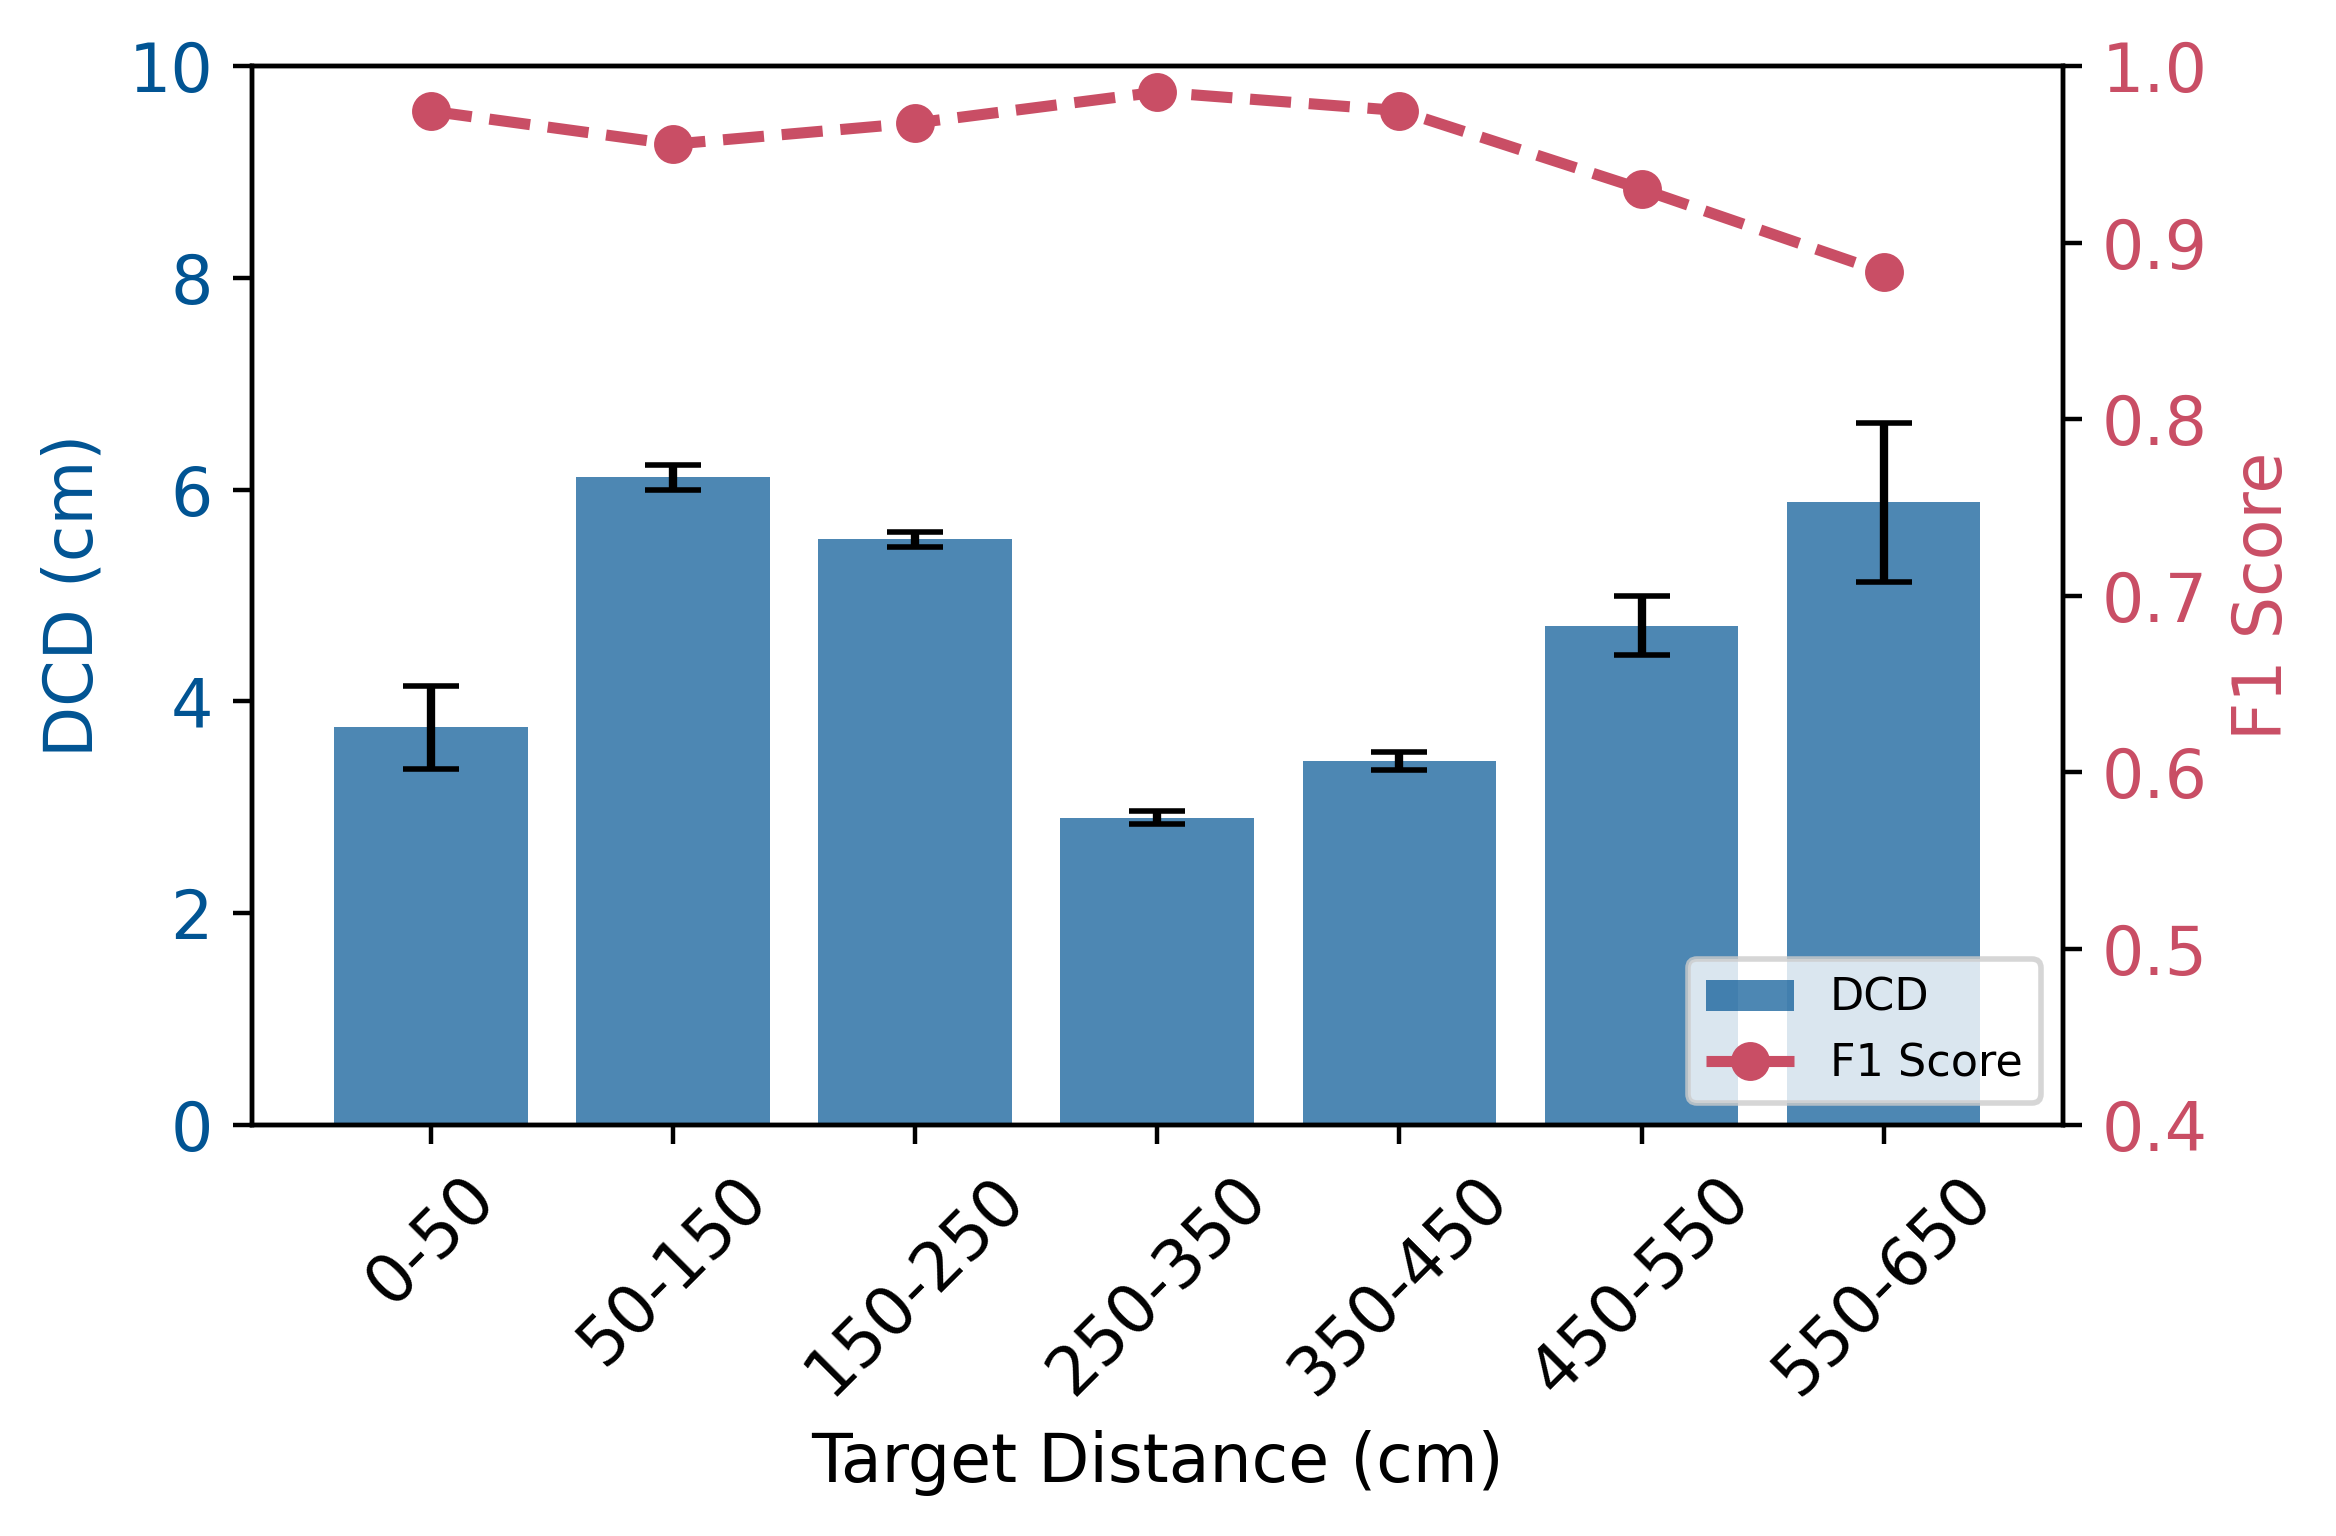

mean f1 score: 0.9530277851778701
mean of One_directional_Chamfer_Distance: 4.619812815826052


In [2]:
selected_metrics_df = load_metrics_df_0(model3_Log_folder_path, file_names)

min_distance = 0
max_distance = 6500 # mm
# only consider the targets that are within the sensing range
selected_metrics_df = selected_metrics_df[(selected_metrics_df['z_average'] >= min_distance) & (selected_metrics_df['z_average'] <= max_distance)]

# bins=np.linspace(min_distance, max_distance, num_bins+1)
bins = [0. , 500. , 1500. ,  2500. ,  3500. ,  4500. , 5500. , 6500.]
distance_bins = pd.cut(selected_metrics_df['z_average'], bins=bins, include_lowest=True)

distance_metrics = selected_metrics_df.groupby(distance_bins).apply(lambda x: pd.Series({
    'distance_range': f"{x['z_average'].min():.1f}-{x['z_average'].max():.1f}",
    'precision': x['true_positives'].sum() / (x['true_positives'].sum() + x['false_positives'].sum()) if (x['true_positives'].sum() + x['false_positives'].sum()) > 0 else 0,
    'recall': x['true_positives'].sum() / (x['true_positives'].sum() + x['false_negatives'].sum()) if (x['true_positives'].sum() + x['false_negatives'].sum()) > 0 else 0,
    'chamfer_distance': x['chamfer_distance'].mean(),
    'chamfer_distance_std': x['chamfer_distance'].std(),
    'chamfer_distance_sem': x['chamfer_distance'].std() / np.sqrt(len(x)) if len(x) > 0 else 0,
    'hausdorff_distance': x['hausdorff_distance'].mean(),
    'hausdorff_distance_std': x['hausdorff_distance'].std(),
    'hausdorff_distance_sem': x['hausdorff_distance'].std() / np.sqrt(len(x)) if len(x) > 0 else 0,
    'point2point_distance': (x['point2point_distance'] / 10).mean(), # unit is cm
    'point2point_distance_std': (x['point2point_distance'] / 10).std(),
    'point2point_distance_sem': (x['point2point_distance'] / 10).std() / np.sqrt(len(x)) if len(x) > 0 else 0,
    'sample_count': len(x),
    'One_directional_Chamfer_Distance': (np.sqrt(x['chamfer_distance']/2)/10).mean(), # unit is cm
    'One_directional_Chamfer_Distance_std': (np.sqrt(x['chamfer_distance']/2)/10).std(),
    'One_directional_Chamfer_Distance_sem': (np.sqrt(x['chamfer_distance']/2)/10).std() / np.sqrt(len(x)) if len(x) > 0 else 0,
}))

# Calculate F1 score
distance_metrics['f1_score'] = 2 * (distance_metrics['precision'] * distance_metrics['recall']) / (distance_metrics['precision'] + distance_metrics['recall']) if (distance_metrics['precision'] + distance_metrics['recall']).all() > 0 else 0

x_labels = (distance_metrics.index.categories.left / 10).astype(int).astype(str) + '-' + (distance_metrics.index.categories.right / 10).astype(int).astype(str)

plt.rcParams.update({'font.size': 12})
fig, ax1 = plt.subplots(figsize = (6,4),dpi=400, layout='constrained')

x = range(len(x_labels))

# Bar plot for Chamfer Distance Error (left y-axis)
bars = ax1.bar(
    x,
    distance_metrics['One_directional_Chamfer_Distance'],
    yerr=distance_metrics['One_directional_Chamfer_Distance_sem'],
    capsize=5,
    color='#015493',
    alpha=0.7,
    label="DCD"
)
ax1.set_ylim(0, 10)
ax1.set_xlabel('Target Distance (cm)')
ax1.set_ylabel('DCD (cm)', color='#015493')
ax1.tick_params(axis='y', labelcolor='#015493')

# Second y-axis for F1 score
ax2 = ax1.twinx()
ax2.plot(
    x,
    distance_metrics['f1_score'],
    color='#C94E65',
    marker='o',
    linestyle='--',
    linewidth=2,
    label="F1 Score"
)
ax2.set_ylim(0.4, 1)
ax2.set_ylabel('F1 Score', color='#C94E65')
ax2.tick_params(axis='y', labelcolor='#C94E65')

# x-axis labels
ax1.set_xticks(x)
ax1.set_xticklabels(x_labels, rotation=45)

# Optional legend combining both plots
lines, labels = [], []
for ax in [ax1, ax2]:
    line, label = ax.get_legend_handles_labels()
    lines += line
    labels += label
# plt.legend(lines, labels, loc=(0.05, 0.65), fontsize=12)  # manually adjust legend location
plt.legend(lines, labels, loc='lower right', fontsize=8) 
plt.tight_layout()

fig_name = 'Figures/exp_overall'
plt.savefig(fig_name + ".png",dpi=200,bbox_inches = 'tight')
plt.savefig(fig_name +'.pdf')

# plt.close()
plt.show()


# print('F1 Score:',distance_metrics['f1_score'])
# print('Chamfer Distance:',distance_metrics['chamfer_distance'])
# print('One_directional_Chamfer_Distance:',distance_metrics['One_directional_Chamfer_Distance'])
# print('Point2Point Distance:',distance_metrics['point2point_distance'])

print('mean f1 score:',distance_metrics['f1_score'].mean())
print('mean of One_directional_Chamfer_Distance:',distance_metrics['One_directional_Chamfer_Distance'].mean())


### The range/depth estimation Gain

In [ ]:

def return_metrics_df(selected_metrics_df):
    min_distance = 0
    max_distance = 6000 # mm
    # only consider the targets that are within the sensing range
    selected_metrics_df = selected_metrics_df[(selected_metrics_df['z_average'] >= min_distance) & (selected_metrics_df['z_average'] <= max_distance)]
    # Create distance bins for analysis
    num_bins = 4
    distance_bins = pd.cut(selected_metrics_df['z_average'], bins=np.linspace(min_distance, max_distance, num_bins+1), include_lowest=True)

    distance_metrics = selected_metrics_df.groupby(distance_bins).apply(lambda x: pd.Series({
        'distance_range': f"{x['z_average'].min():.1f}-{x['z_average'].max():.1f}",
        'precision': x['true_positives'].sum() / (x['true_positives'].sum() + x['false_positives'].sum()) if (x['true_positives'].sum() + x['false_positives'].sum()) > 0 else 0,
        'recall': x['true_positives'].sum() / (x['true_positives'].sum() + x['false_negatives'].sum()) if (x['true_positives'].sum() + x['false_negatives'].sum()) > 0 else 0,
        'chamfer_distance': x['chamfer_distance'].mean(),
        'chamfer_distance_std': x['chamfer_distance'].std(),
        'chamfer_distance_sem': x['chamfer_distance'].std() / np.sqrt(len(x)) if len(x) > 0 else 0,
        'hausdorff_distance': x['hausdorff_distance'].mean(),
        'hausdorff_distance_std': x['hausdorff_distance'].std(),
        'hausdorff_distance_sem': x['hausdorff_distance'].std() / np.sqrt(len(x)) if len(x) > 0 else 0,
        'point2point_distance': (x['point2point_distance'] / 10).mean(), # unit is cm
        'point2point_distance_std': (x['point2point_distance'] / 10).std(),
        'point2point_distance_sem': (x['point2point_distance'] / 10).std() / np.sqrt(len(x)) if len(x) > 0 else 0,
        'sample_count': len(x),
        'One_directional_Chamfer_Distance': (np.sqrt(x['chamfer_distance']/2)/10).mean(), # unit is cm
        'One_directional_Chamfer_Distance_std': (np.sqrt(x['chamfer_distance']/2)/10).std(),
        'One_directional_Chamfer_Distance_sem': (np.sqrt(x['chamfer_distance']/2)/10).std() / np.sqrt(len(x)) if len(x) > 0 else 0,
    }))
    # Calculate F1 score
    distance_metrics['f1_score'] = 2 * (distance_metrics['precision'] * distance_metrics['recall']) / (distance_metrics['precision'] + distance_metrics['recall']) if (distance_metrics['precision'] + distance_metrics['recall']).all() > 0 else 0
    return distance_metrics['f1_score'], distance_metrics['One_directional_Chamfer_Distance'], distance_metrics['point2point_distance']

selected_metrics_df = load_metrics_df_0(model1_Log_folder_path, file_names)
_, model1_One_directional_Chamfer_Distance, model1_point2point_distance = return_metrics_df(selected_metrics_df)

selected_metrics_df = load_metrics_df_0(model0_Log_folder_path, file_names)
_, model0_One_directional_Chamfer_Distance, model0_point2point_distance = return_metrics_df(selected_metrics_df)

difference_One_directional_Chamfer_Distance =  model0_One_directional_Chamfer_Distance - model1_One_directional_Chamfer_Distance
gain_One_directional_Chamfer_Distance = difference_One_directional_Chamfer_Distance / model0_One_directional_Chamfer_Distance

print("the difference of One_directional_Chamfer_Distance between model0 and model1:", difference_One_directional_Chamfer_Distance)
print("the gain of One_directional_Chamfer_Distance of model0 over model1:", gain_One_directional_Chamfer_Distance)
print("the everage gain of One_directional_Chamfer_Distance of model0 over model1:", gain_One_directional_Chamfer_Distance.mean())
# comput the gain on the point2point distance
difference_point2point_distance = model0_point2point_distance - model1_point2point_distance
gain_point2point_distance = difference_point2point_distance / model0_point2point_distance
print("the difference of point2point_distance between model0 and model1:", difference_point2point_distance)
print("the gain of point2point_distance of model0 over model1:", gain_point2point_distance)
print("the everage gain of point2point_distance of model0 over model1:", gain_point2point_distance.mean())

/tmp/ipykernel_4089330/3550307923.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distance_metrics = selected_metrics_df.groupby(distance_bins).apply(lambda x: pd.Series({


the difference of One_directional_Chamfer_Distance between model0 and model1: z_average
(-0.001, 1500.0]   -0.163775
(1500.0, 3000.0]    0.008030
(3000.0, 4500.0]   -0.185864
(4500.0, 6000.0]    0.903591
Name: One_directional_Chamfer_Distance, dtype: float64
the gain of One_directional_Chamfer_Distance of model0 over model1: z_average
(-0.001, 1500.0]   -0.027470
(1500.0, 3000.0]    0.001562
(3000.0, 4500.0]   -0.050553
(4500.0, 6000.0]    0.134356
Name: One_directional_Chamfer_Distance, dtype: float64
the everage gain of One_directional_Chamfer_Distance of model0 over model1: 0.0144738901454033
the difference of point2point_distance between model0 and model1: z_average
(-0.001, 1500.0]   -0.150820
(1500.0, 3000.0]    0.319466
(3000.0, 4500.0]   -0.101664
(4500.0, 6000.0]    2.426740
Name: point2point_distance, dtype: float64
the gain of point2point_distance of model0 over model1: z_average
(-0.001, 1500.0]   -0.006835
(1500.0, 3000.0]    0.014166
(3000.0, 4500.0]   -0.005172
(4500.0, 

/tmp/ipykernel_4089330/3550307923.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distance_metrics = selected_metrics_df.groupby(distance_bins).apply(lambda x: pd.Series({


### The Detection Gain with OAV


Average F1 scores by 'num_people':


/tmp/ipykernel_4089330/1637771723.py:64: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


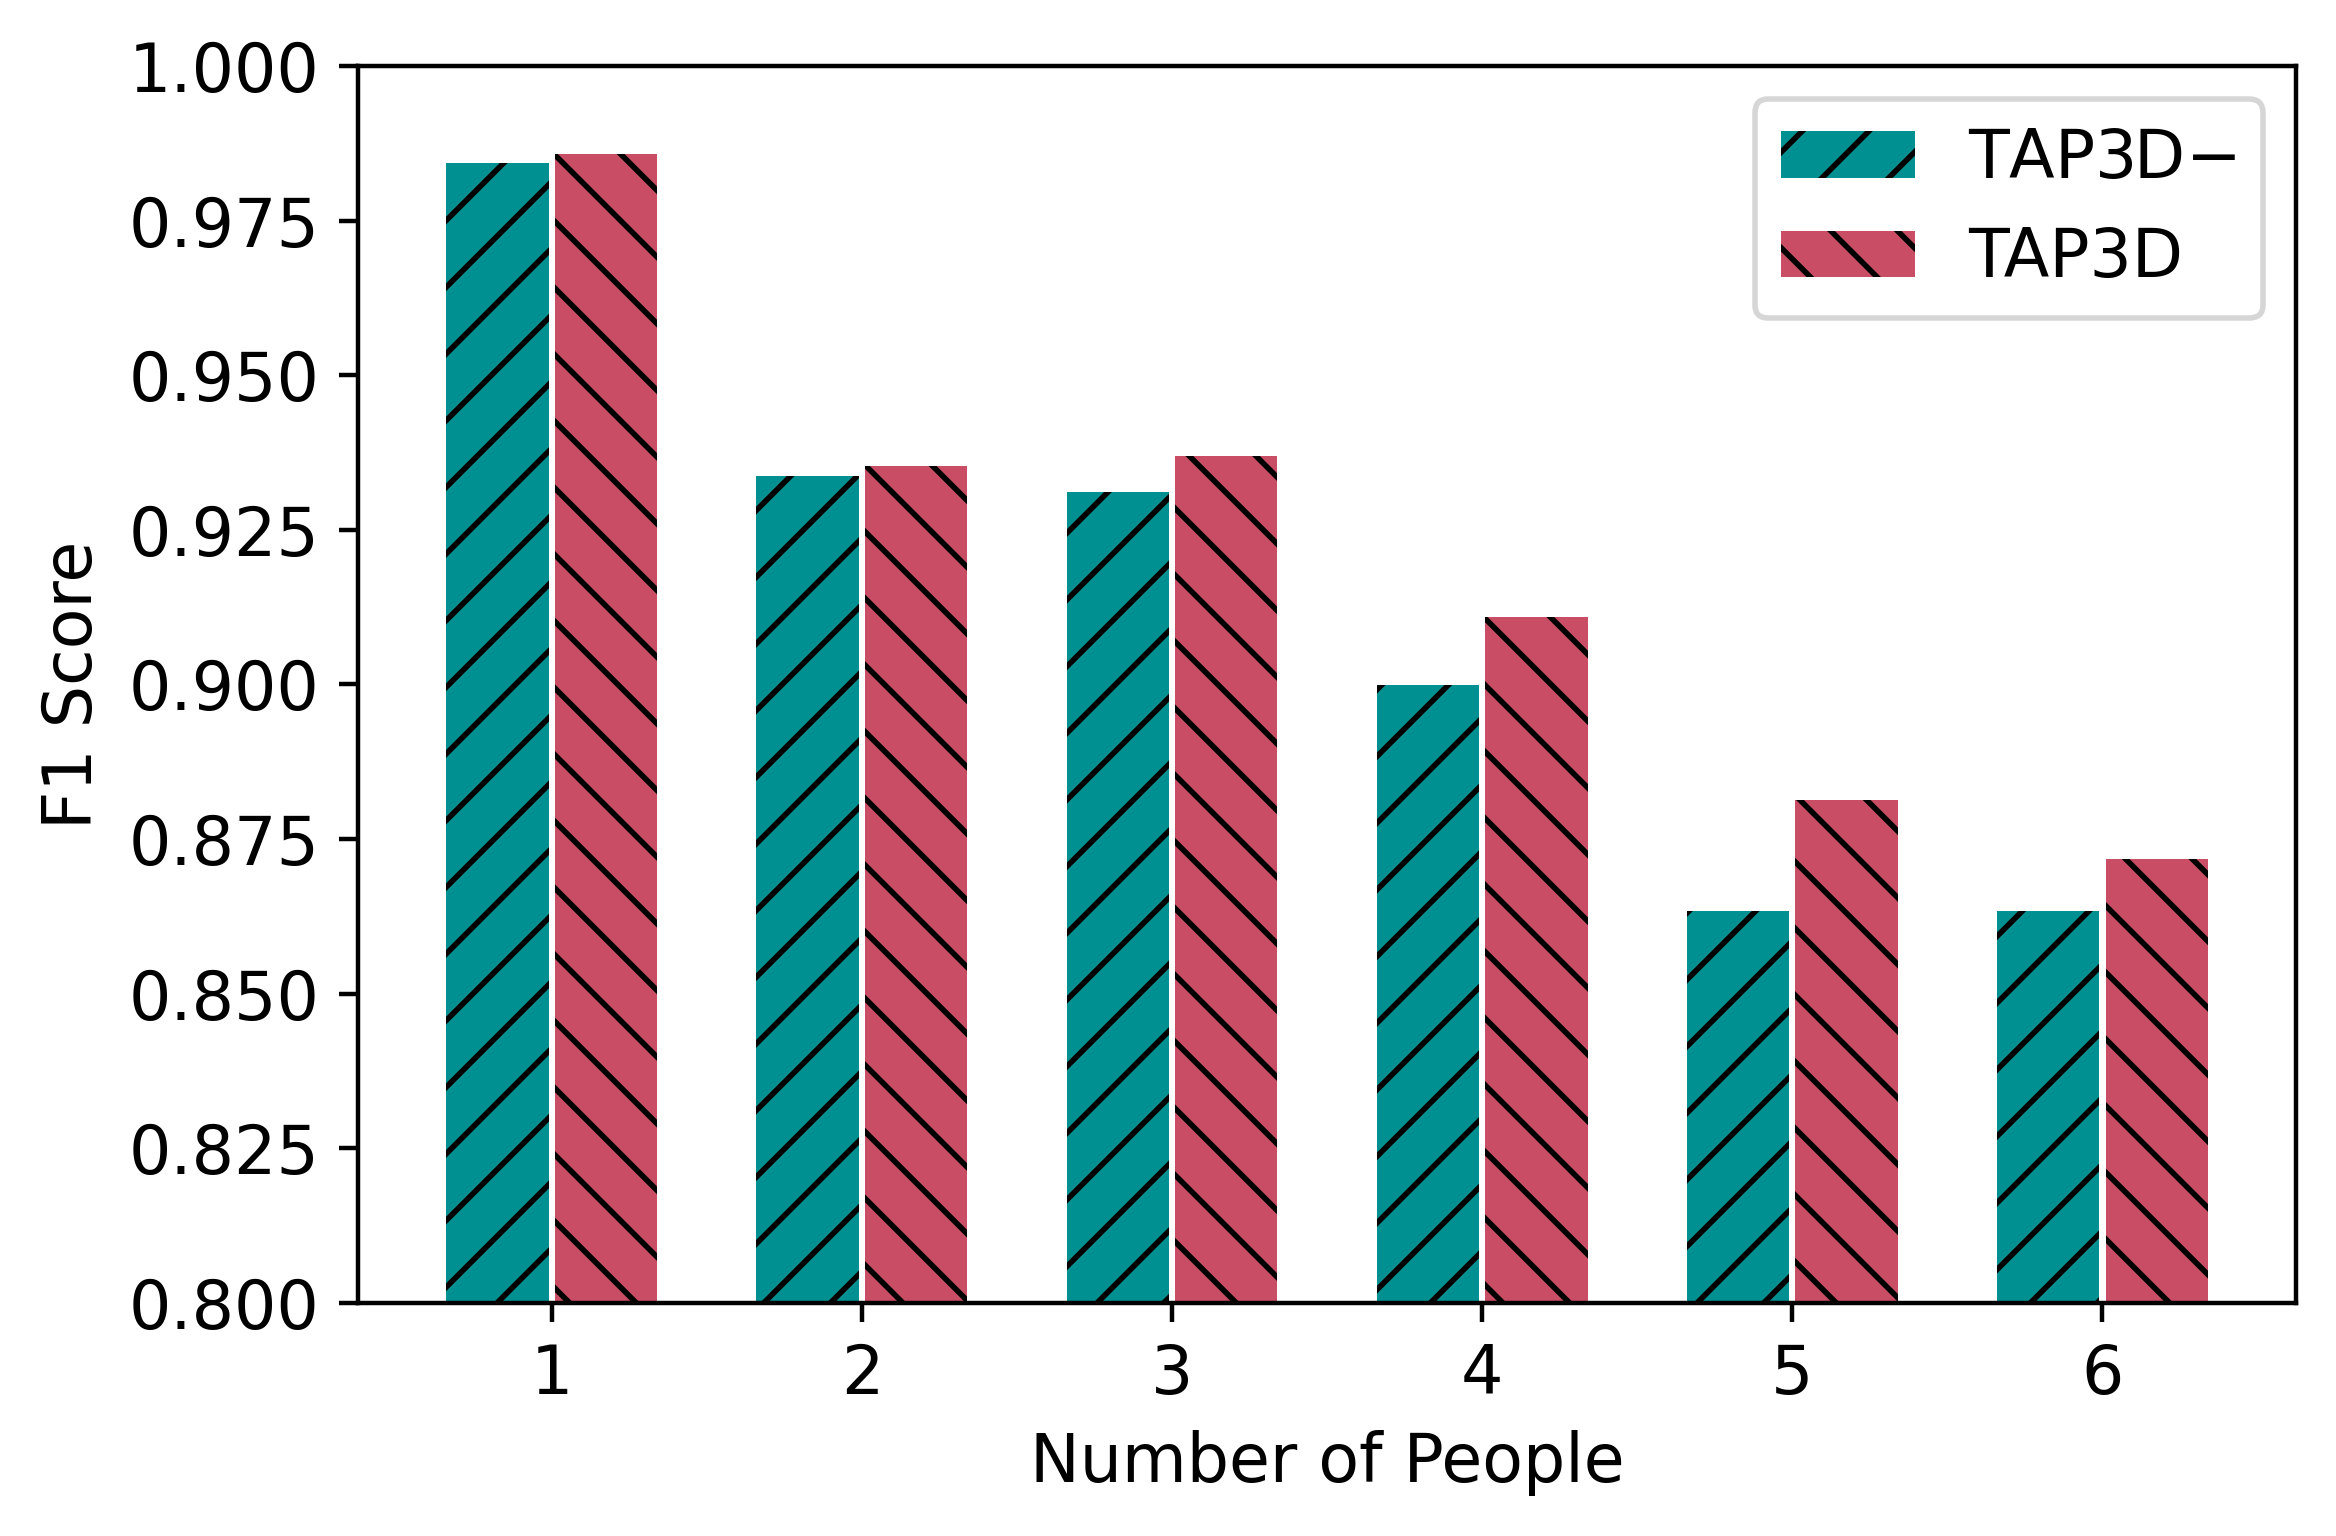

0.008985905061099198
0.03720482524179558


In [6]:
model1_metric_df = load_metrics_df_1(model1_Log_folder_path, file_names)
model3_metric_df = load_metrics_df_1(model3_Log_folder_path, file_names)

results = []

if 'num_people' in model3_metric_df.columns and 'num_people' in model1_metric_df.columns:
    num_people_selected = model3_metric_df['num_people']
    # Optionally, compare F1 scores by 'num_people' group
    print("\nAverage F1 scores by 'num_people':")
    for n in sorted(num_people_selected.unique()):  
        idx = (model3_metric_df['num_people'] == n)
        m3_f1 = model3_metric_df.loc[idx, 'F1_score'].mean()
        m1_f1 = model1_metric_df.loc[idx, 'F1_score'].mean()
        count = idx.sum()
        results.append([n, m3_f1, m1_f1, count, m3_f1 - m1_f1])
else:
    print("'num_people' column not found in both DataFrames.")


results_df = pd.DataFrame(results, columns=['num_people', 'M3_F1', 'M1_F1', 'count', 'diff'])


# print(results_df)
# filter out num_people == 0
df_plot = results_df[results_df['num_people'] != 0].reset_index(drop=True)

x = np.arange(len(df_plot['num_people']))  # label locations
width = 0.35  # width of each bar

plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(figsize = (6,4),dpi=400, layout='constrained')

# Model1 on the left
ax.bar(
    x - width/2,
    df_plot['M1_F1'],
    capsize=5,
    width=width -0.02,
    label= model_name + '$-$',
    color='#019092',
    hatch='//'
)

# Model3 on the right
ax.bar(
    x + width/2,
    df_plot['M3_F1'],
    capsize=5,
    width=width -0.02,
    label= model_name,
    color='#C94E65',
    hatch='\\\\'
)

# Axis labels and ticks
ax.set_xlabel('Number of People')
ax.set_ylabel('F1 Score')
# ax.set_title('Comparison of F1 Score by Number of People')
ax.set_xticks(x)
ax.set_xticklabels(df_plot['num_people'])
ax.set_ylim(0.8, 1)
ax.legend()

fig.tight_layout()

fig_name = 'Figures/detection_comparison'
plt.savefig(fig_name + ".png",dpi=200,bbox_inches = 'tight')
plt.savefig(fig_name +'.pdf')

plt.show()
# plt.close()

# sum the diff of the rows where the 'num_people' is 1 - 3
results_df_1_3_diff = results_df[(results_df['num_people'] <= 3) & (results_df['num_people'] >= 1)]['diff'].sum()
print(results_df_1_3_diff)

# sum the diff of the rows where the 'num_people' is 4-6
results_df_4_6_diff = results_df[results_df['num_people'] >= 4]['diff'].sum()
print(results_df_4_6_diff)

### Ambient Interference

['U0_E3_1_walking_1o0_AI-PC_2.pkl', 'U0_E3_1_walking_1o0_AI-PT_2.pkl', 'U0_E4_1_walking_1o2_AI-SC_0.pkl', 'U0_E4_1_standing_1o2_AI-ST_0.pkl', 'U0_E4_1_walking_1o2_AI-ST_0.pkl', 'U0_E7_1_cooking_1o0_AI-CC_3.pkl', 'U0_E7_1_walking_1o0_AI-F_4.pkl']
{'Phone': np.float64(0.9990029910269193), 'Screen': np.float64(0.9854972548549483), 'cooking': np.float64(0.986), 'Fridge': np.float64(0.9219562955254943)}
{'Phone': np.float64(0.9975054875294277), 'Screen': np.float64(0.9741786320605893), 'cooking': np.float64(0.935361216730038), 'Fridge': np.float64(0.9033570701932858)}


/tmp/ipykernel_4089330/442957740.py:91: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


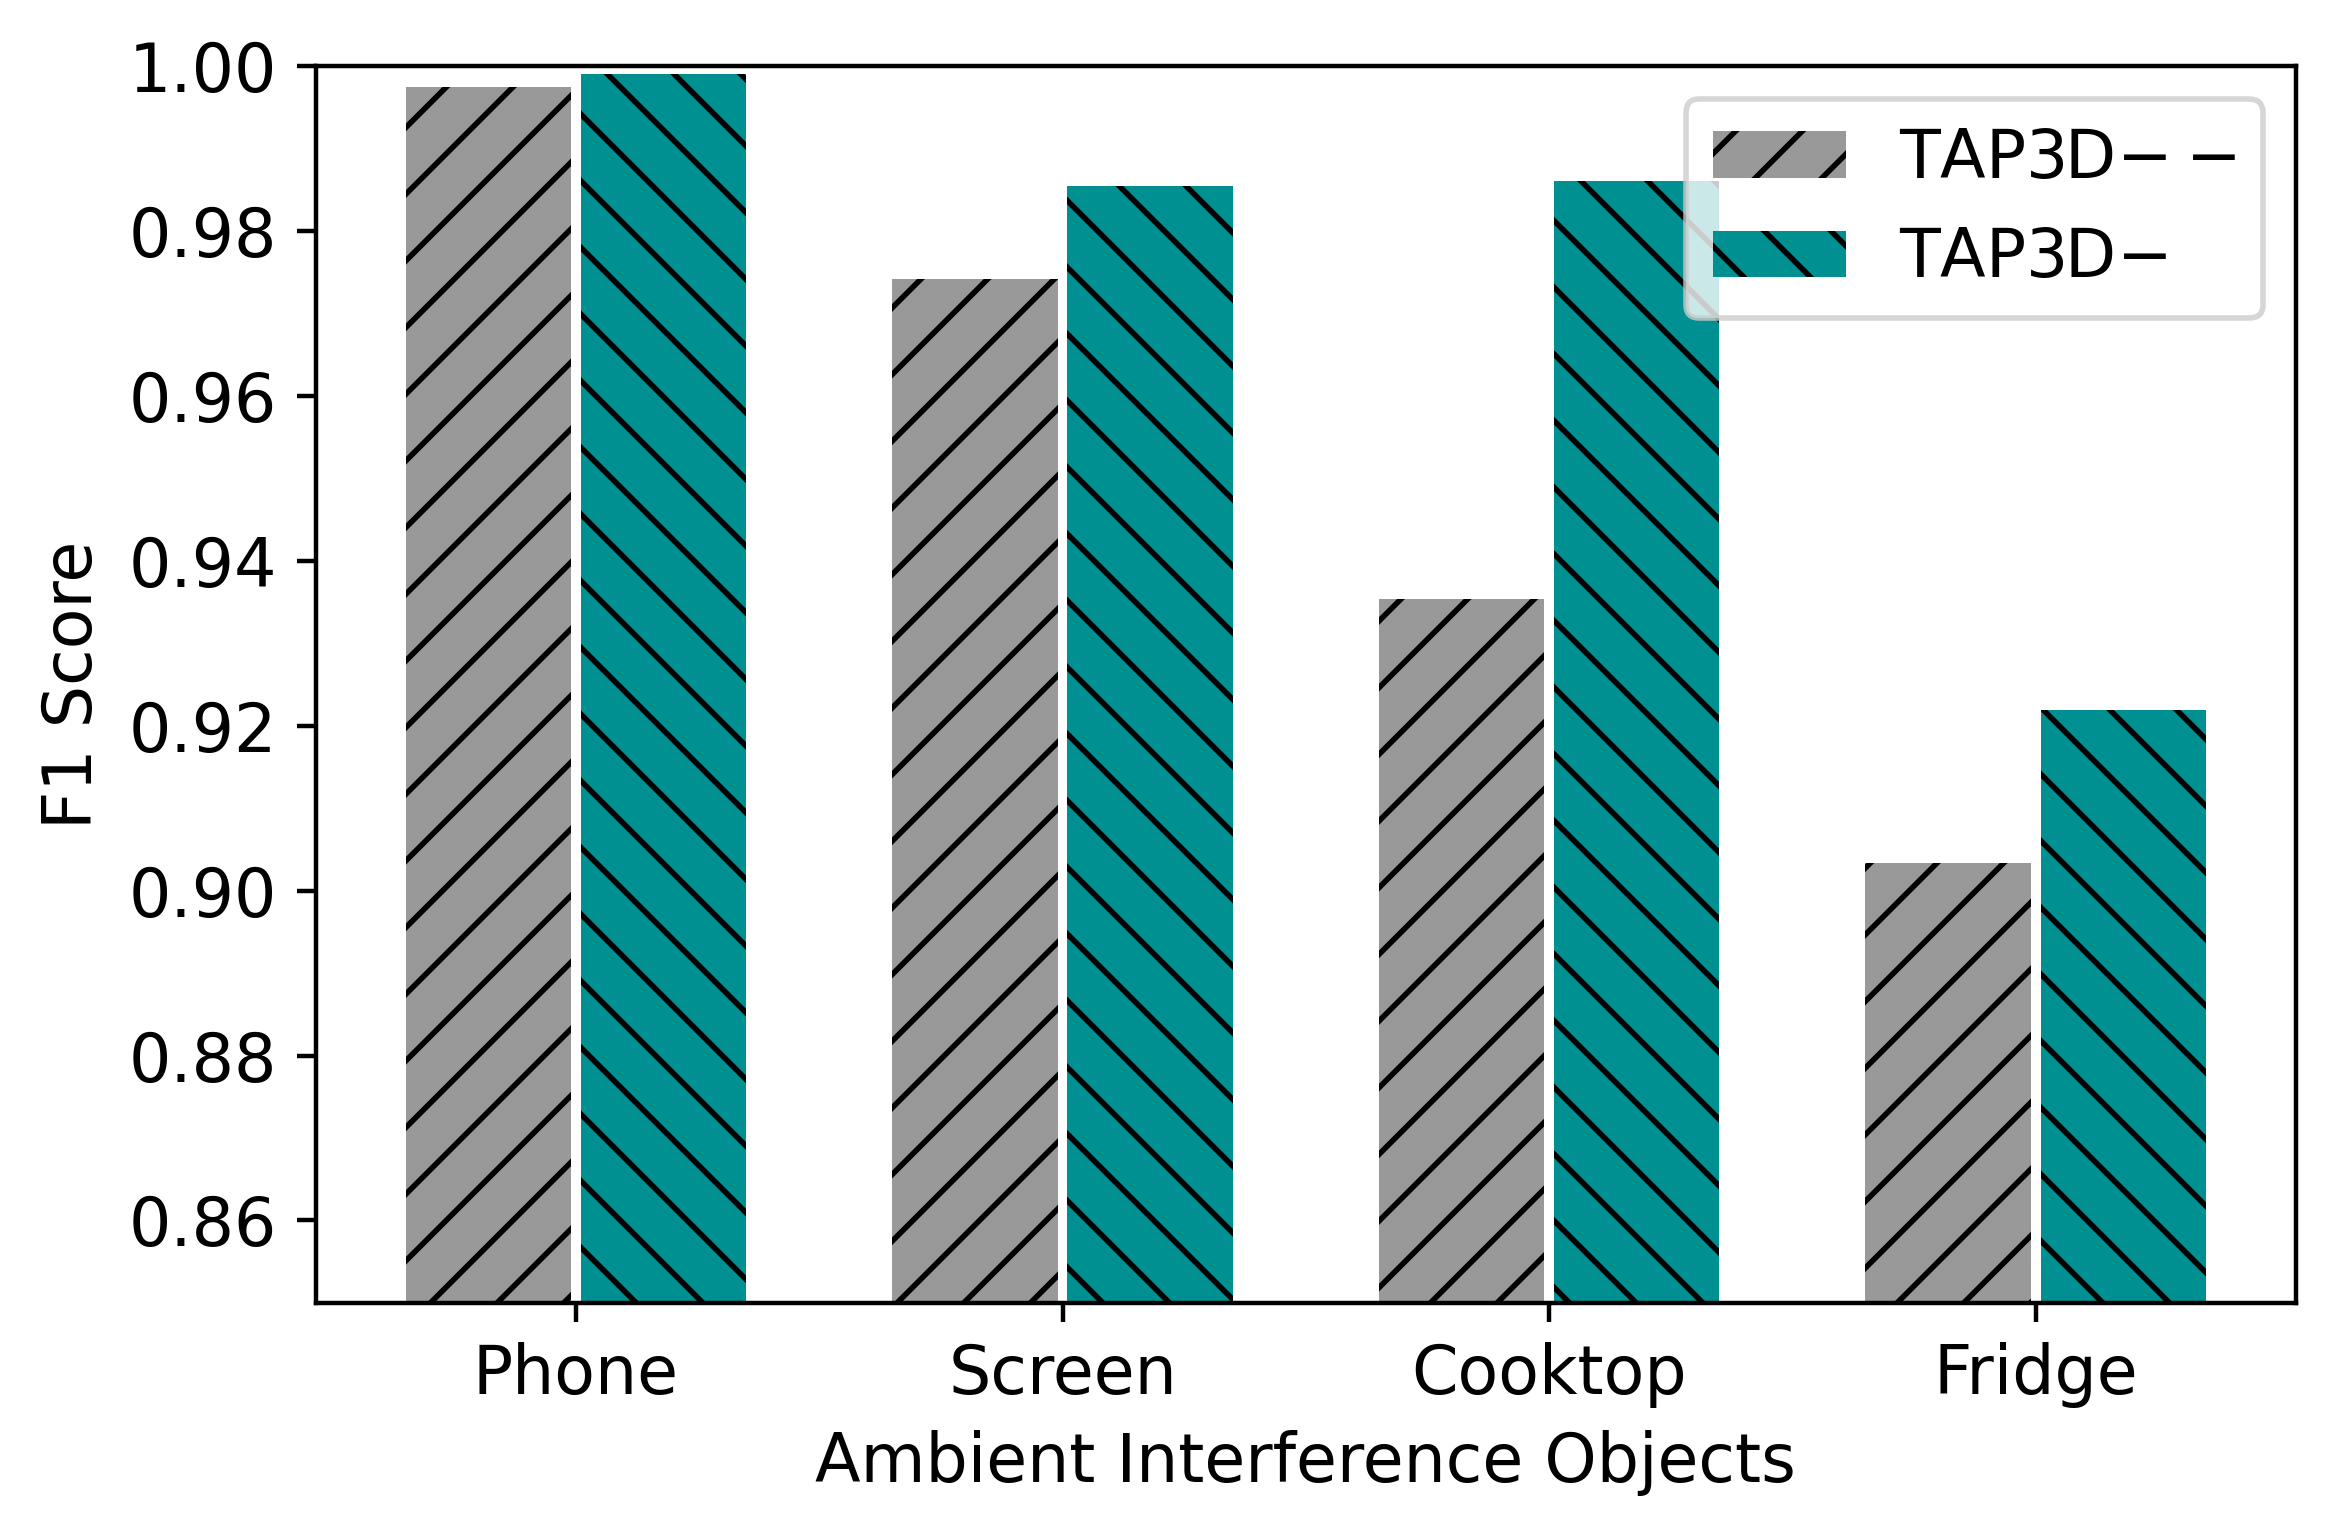

In [7]:
Phone = [
    'U0_E3_1_walking_1o0_AI-PC_2.pkl',
  'U0_E3_1_walking_1o0_AI-PT_2.pkl',
 ]
Screen = [
  'U0_E4_1_walking_1o2_AI-SC_0.pkl',
  'U0_E4_1_standing_1o2_AI-ST_0.pkl',
    'U0_E4_1_walking_1o2_AI-ST_0.pkl',

 ]
cooking = [
  'U0_E7_1_cooking_1o0_AI-CC_3.pkl',
 ]
Fridge = [
  'U0_E7_1_walking_1o0_AI-F_4.pkl',
 ]

complete_file_list = Phone + Screen + cooking + Fridge
print(complete_file_list)

AI_files = {
    'Phone': Phone,
    'Screen': Screen,
    'cooking': cooking,
    'Fridge': Fridge,
}

model2_results = {}
for key, value in AI_files.items():
    temp = load_metrics_df_1(model2_Log_folder_path, value)
    f1_score = temp['F1_score'].mean()
    model2_results[key] = f1_score
    
model1_results = {}
for key, value in AI_files.items():
    temp = load_metrics_df_1(model1_Log_folder_path, value)
    f1_score = temp['F1_score'].mean()
    model1_results[key] = f1_score

print(model2_results)
print(model1_results)


# Rename 'cooking' → 'Cooktop' just for visualization
rename_map = {'cooking': 'Cooktop'}
cats = ['Phone', 'Screen', 'Cooktop', 'Fridge']

df_plot = pd.DataFrame({
    'Model1': pd.Series(model1_results).rename(index=rename_map),
    'Model2': pd.Series(model2_results).rename(index=rename_map),
}).loc[cats].reset_index().rename(columns={'index': 'Object'})

# ---- plot ----
plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(figsize=(6, 4), dpi=400, layout='constrained')

x = np.arange(len(df_plot['Object']))
width = 0.36

# Model1 on the left (baseline)
ax.bar(
    x - width/2,
    df_plot['Model1'],
    capsize=5,
    width=width - 0.02,
    label=model_name + '$--$',
    color='#999999',
    hatch='//'
)

# Model2 on the right
ax.bar(
    x + width/2,
    df_plot['Model2'],
    capsize=5,
    width=width - 0.02,
    label=model_name + '$-$',
    color='#019092',
    hatch='\\\\'
)

# Axes & ticks
ax.set_xlabel('Ambient Interference Objects')
ax.set_ylabel('F1 Score')
ax.set_xticks(x)
ax.set_xticklabels(df_plot['Object'])
ax.set_ylim(0.85, 1.)
ax.legend()

# save
fig.tight_layout()

fig_name = 'Figures/model2_vs_model1_ambient_interference'
plt.savefig(fig_name + ".png", dpi=200, bbox_inches='tight')
plt.savefig(fig_name + ".pdf", bbox_inches='tight')

plt.show()
# plt.close()

### Cross-user

Selected metrics shape: (24943, 16)

Seen Users (n=8):
Average F1 Score: 0.991 ± 0.010
Average one-directional Chamfer Distance: 1.881 ± 0.417

Unseen Users (n=3):
Average F1 Score: 0.996 ± 0.004
Average one-directional Chamfer Distance: 1.895 ± 0.538


/tmp/ipykernel_1352470/2225092783.py:85: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  user_metrics = selected_metrics_df.groupby('user_id').apply(


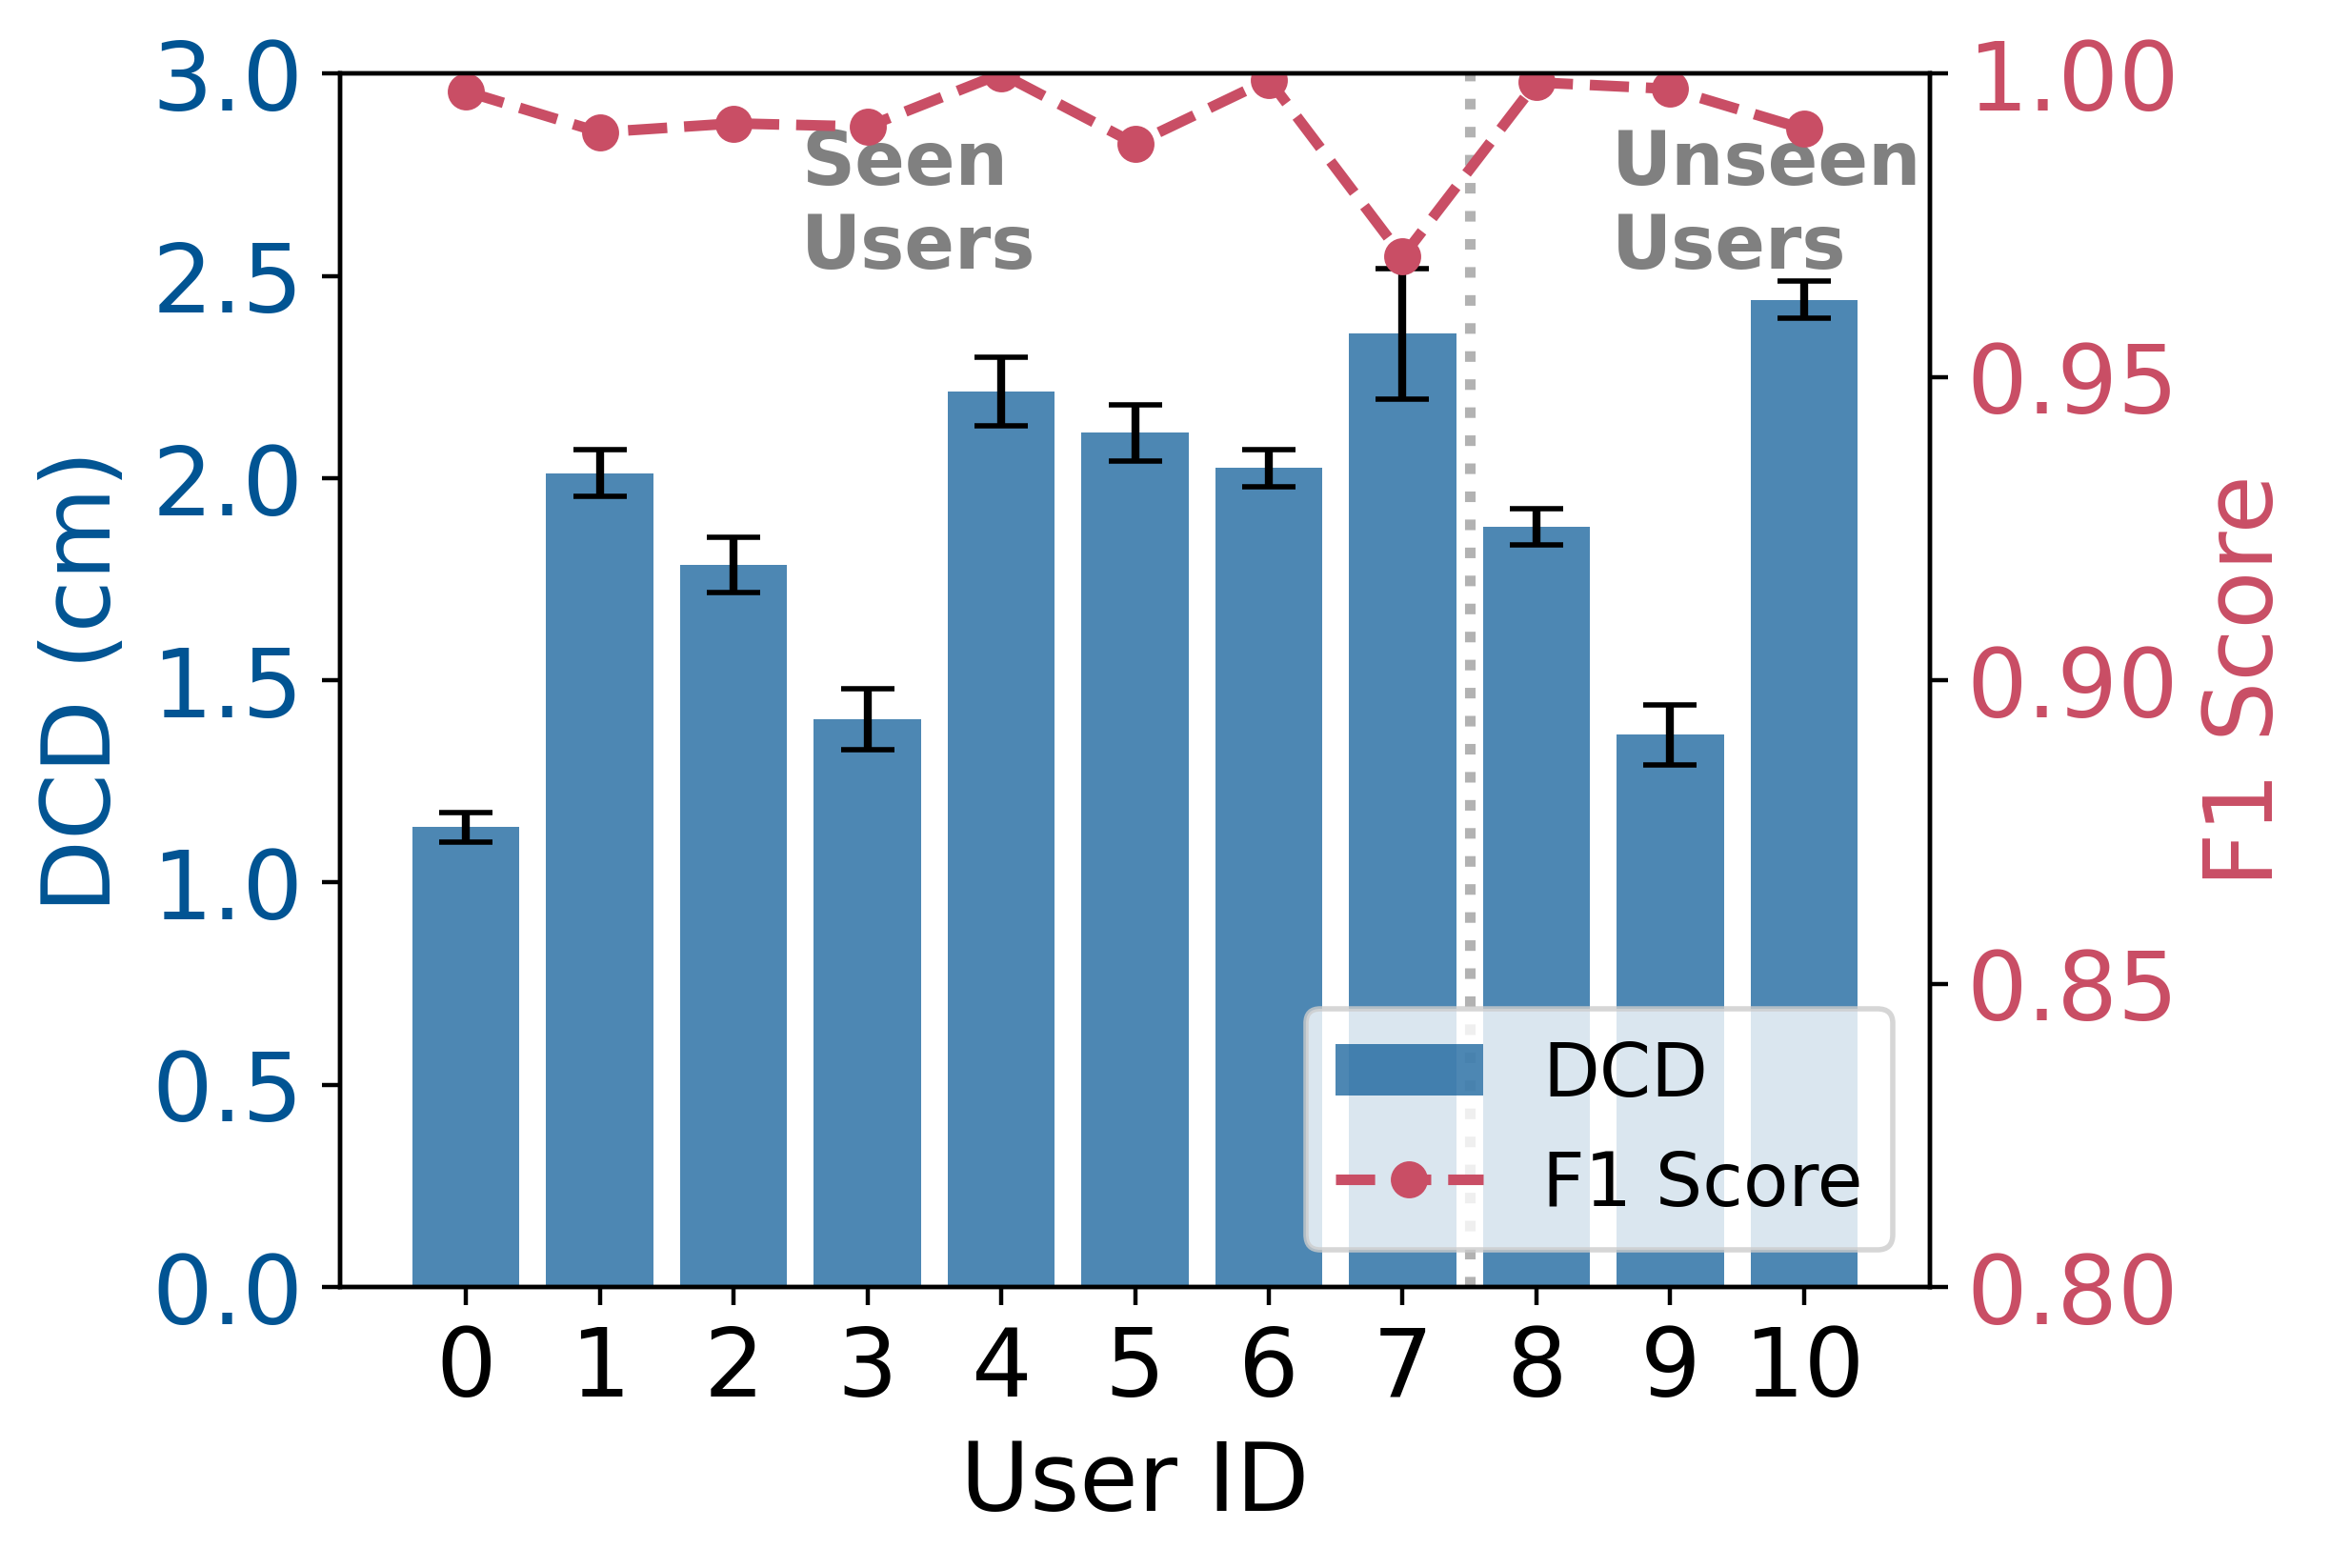

    user_id  One_directional_Chamfer_Distance  f1_score
0       0.0                          1.136868  0.997071
1       1.0                          2.012115  0.990343
2       2.0                          1.784662  0.991802
3       3.0                          1.403531  0.991271
4       4.0                          1.879820  0.998567
5       5.0                          1.365043  0.997491
6       6.0                          2.213956  1.000000
7       7.0                          2.111816  0.988453
8       8.0                          2.440416  0.990868
9       9.0                          2.025510  0.999019
10     10.0                          2.356696  0.969828


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Select recordings from multiple users in similar environments (E0 and E1) for cross-user analysis.
selected_recordings = [
    'U0_E0_1_standing_1o3_none_1.pkl',  
    'U0_E0_1_walking_1o3_none_3.pkl',
    'U0_E0_1_walking_1o3_none_5.pkl',
    'U0_E0_1_walking_1o3_none_1.pkl',

    'U1_E0_1_standing_1o3_none_2.pkl',
    'U1_E0_1_standing_1o3_none_3.pkl',
    'U1_E0_1_walking_1o3_none_4.pkl',
    'U1_E0_1_walking_1o3_none_5.pkl',
    'U1_E0_1_walking_1o3_none_6.pkl',
    'U1_E2_1_sitting_1o3_none_2.pkl',
    'U1_E2_1_standing_1o3_none_1.pkl',
    'U1_E2_1_walking_1o3_none_0.pkl',
    'U1_E2_1_walking_1o3_none_2.pkl',

    'U2_E0_1_sitting_1o3_none_2.pkl',
    'U2_E0_1_walking_1o3_none_2.pkl',
    'U2_E0_1_walking_1o3_none_3.pkl',
    'U2_E0_1_walking_1o3_none_4.pkl',
    'U2_E0_1_walking_1o3_none_5.pkl',
    'U2_E2_1_sitting_1o3_none_1.pkl',
    'U2_E2_1_walking_1o3_none_0.pkl',

    'U3_E0_1_standing_1o3_none_0.pkl',
    'U3_E0_1_standing_1o3_none_1.pkl',
    'U3_E0_1_walking_1o3_none_4.pkl',

    'U4_E0_1_sitting_1o3_none_0.pkl',
    'U4_E0_1_sitting_1o3_none_1.pkl',
    'U4_E0_1_standing_1o3_none_1.pkl',
    'U4_E0_1_walking_1o3_none_0.pkl',
    'U4_E0_1_walking_1o3_none_2.pkl',
    'U4_E0_1_sitting_1o3_none_2.pkl',
    'U4_E0_1_sitting_1o3_none_3.pkl',
    'U4_E0_1_walking_1o3_none_1.pkl',
    'U4_E0_1_walking_1o3_none_3.pkl',

    'U5_E0_1_sitting_1o3_none_1.pkl',
    'U5_E0_1_walking_1o3_none_1.pkl',

    'U6_E0_1_standing_1o3_none_0.pkl',
    'U6_E0_1_standing_1o3_none_2.pkl',

    'U7_E2_1_sitting_1o3_none_1.pkl',
    'U7_E2_1_walking_1o3_none_2.pkl',
    'U7_E2_1_walking_1o3_none_3.pkl',

    'U8_E2_1_walking_1o3_none_2.pkl',
    'U8_E2_1_lying_1o3_none_2.pkl', 
    'U8_E2_1_sitting_1o3_none_2.pkl',
    'U8_E2_1_walking_1o3_none_3.pkl',
    'U8_E2_1_walking_1o3_none_4.pkl',

    'U9_E2_1_lying_1o3_none_1.pkl',
    'U9_E2_1_lying_1o3_none_3.pkl',
    'U9_E2_1_sitting_1o3_none_3.pkl',
    'U9_E2_1_walking_1o3_none_0.pkl',
    'U9_E2_1_walking_1o3_none_3.pkl',
    'U10_E2_1_sitting_1o3_none_1.pkl',
 ]


for ele in selected_recordings:
    if ele not in file_names:
        print('not found', ele)

metrics_df = load_metrics_df_0(model3_Log_folder_path, selected_recordings)

# Define seen and unseen users
Seen = [0, 1, 2, 3, 6, 7, 9, 10]
Unseen = [4, 5, 8]

def create_performance_visualization(selected_metrics_df):
    """
    Create performance visualization with different colors for seen and unseen users
    """
    print(f"Selected metrics shape: {selected_metrics_df.shape}")
    # Group by user_id and calculate metrics for each user
    user_metrics = selected_metrics_df.groupby('user_id').apply(
        lambda x: pd.Series({
            'user_id': x['user_id'].iloc[0],
            'true_positives': x['true_positives'].sum(),
            'false_positives': x['false_positives'].sum(),
            'false_negatives': x['false_negatives'].sum(),
            'chamfer_distance': x['chamfer_distance'].mean(),
            'One_directional_Chamfer_Distance': (np.sqrt(x['chamfer_distance'] / 2) / 10).mean(),
            'One_directional_Chamfer_Distance_sem': (np.sqrt(x['chamfer_distance'] / 2) / 10).std() / np.sqrt(len(x)) if len(x) > 0 else 0,
        })
    ).reset_index(drop=True)
    user_metrics['f1_score'] = 2 * user_metrics['true_positives'] / (2 * user_metrics['true_positives'] + user_metrics['false_positives'] + user_metrics['false_negatives'])

    # Print summary statistics for seen vs unseen
    seen_metrics = user_metrics[user_metrics['user_id'].isin(Seen)]
    unseen_metrics = user_metrics[user_metrics['user_id'].isin(Unseen)]
    
    print(f"\nSeen Users (n={len(seen_metrics)}):")
    print(f"Average F1 Score: {seen_metrics['f1_score'].mean():.3f} ± {seen_metrics['f1_score'].std():.3f}")
    print(f"Average one-directional Chamfer Distance: {seen_metrics['One_directional_Chamfer_Distance'].mean():.3f} ± {seen_metrics['One_directional_Chamfer_Distance'].std():.3f}")
    
    print(f"\nUnseen Users (n={len(unseen_metrics)}):")
    print(f"Average F1 Score: {unseen_metrics['f1_score'].mean():.3f} ± {unseen_metrics['f1_score'].std():.3f}")
    print(f"Average one-directional Chamfer Distance: {unseen_metrics['One_directional_Chamfer_Distance'].mean():.3f} ± {unseen_metrics['One_directional_Chamfer_Distance'].std():.3f}")

    
    from matplotlib.lines import Line2D
    df = user_metrics.copy()

    # Split & order: Seen first (sorted), then Unseen (sorted)
    df_seen   = df[df['user_id'].isin(Seen)].sort_values('user_id')
    df_unseen = df[df['user_id'].isin(Unseen)].sort_values('user_id')
    df_plot   = pd.concat([df_seen, df_unseen], ignore_index=True)

    # To make the indication clear, we use 0 - 10 for the user label, not follow the user_id !!!!!!!!
    x_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10']
    x = np.arange(len(x_labels))

    # Optional error bars if present
    cd_err = df_plot['One_directional_Chamfer_Distance_sem'] if 'One_directional_Chamfer_Distance_sem' in df_plot.columns else None
    f1_err = df_plot['f1_sem'] if 'f1_sem' in df_plot.columns else None

    plt.rcParams.update({'font.size': 18})
    fig, ax1 = plt.subplots(figsize=(6, 4), dpi=400, layout='constrained')

    # --- Bars: Directed Chamfer Distance (left y-axis) ---
    bars = ax1.bar(
        x,
        df_plot['One_directional_Chamfer_Distance'],
        yerr=cd_err,
        capsize=5 if cd_err is not None else 0,
        color='#015493',
        alpha=0.7,
        label='DCD'
    )
    ax1.set_ylabel('DCD (cm)', color='#015493')
    ax1.tick_params(axis='y', labelcolor='#015493')

    # Set a sensible y-limit
    if df_plot['One_directional_Chamfer_Distance'].notna().any():
        ymax = float(np.nanmax(df_plot['One_directional_Chamfer_Distance'])) * 1.15
        ax1.set_ylim(0, 3)

    # --- Line: F1 Score (right y-axis) ---
    ax2 = ax1.twinx()
    ax2.plot(
        x,
        df_plot['f1_score'],
        marker='o',
        linestyle='--',
        linewidth=2,
        color='#C94E65',
        label='F1 Score'
    )
    if f1_err is not None:
        ax2.fill_between(x, df_plot['f1_score'] - f1_err, df_plot['f1_score'] + f1_err, alpha=0.15)
    ax2.set_ylabel('F1 Score', color='#C94E65')
    ax2.tick_params(axis='y', labelcolor='#C94E65')
    ax2.set_ylim(0.8, 1.0)

    # --- X ticks & label coloring ---
    ax1.set_xlabel('User ID')
    ax1.set_xticks(x)
    ax1.set_xticklabels(x_labels, rotation=0, ha='center')

    seen_color   = '#2E86AB'  # blue for Seen
    unseen_color = '#A23B72'  # purple for Unseen
    seen_count = len(df_seen)

    # for tick, uid in zip(ax1.get_xticklabels(), df_plot['user_id']):
    #     tick.set_color(unseen_color if uid in Unseen else seen_color)

    # Optional separator between Seen and Unseen groups
    if seen_count > 0 and seen_count < len(df_plot):
        ax1.axvline(seen_count - 0.5, color='gray', linestyle=':', linewidth=2, alpha=0.6)
        
    # add to text boxs, left is 'Seen' and right is 'Unseen'
    ax1.text(0.29, 0.84, 'Seen\nUsers', transform=ax1.transAxes, color='gray', fontsize=14, fontweight='bold')
    ax1.text(0.8, 0.84, 'Unseen\nUsers', transform=ax1.transAxes, color='gray', fontsize=14, fontweight='bold')

    ax1.legend(lines, labels, loc='lower right', fontsize=14)
    fig_name = 'Figures/cross_user_metrics'
    plt.savefig(fig_name + ".png", dpi=200, bbox_inches='tight')
    plt.savefig(fig_name + ".pdf", bbox_inches='tight')

    plt.show()
    # plt.close()

    return user_metrics

user_metrics = create_performance_visualization(metrics_df)

# print the One_directional_Chamfer_Distance and f1_score of each user
print(user_metrics[['user_id', 'One_directional_Chamfer_Distance', 'f1_score']])

### Cross-Env

Selected metrics shape: (36225, 16)
Seen Environments: 0-4
Mean Directed Chamfer Distance:  2.302363102505028
Mean F1 Score:  0.985217347168429
Unseen Environments: 5-7
Mean Directed Chamfer Distance:  3.340294520231616
Mean F1 Score:  0.9668115601134849


/tmp/ipykernel_1352470/2051965711.py:120: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  metrics = selected_metrics_df.groupby('env_id').apply(


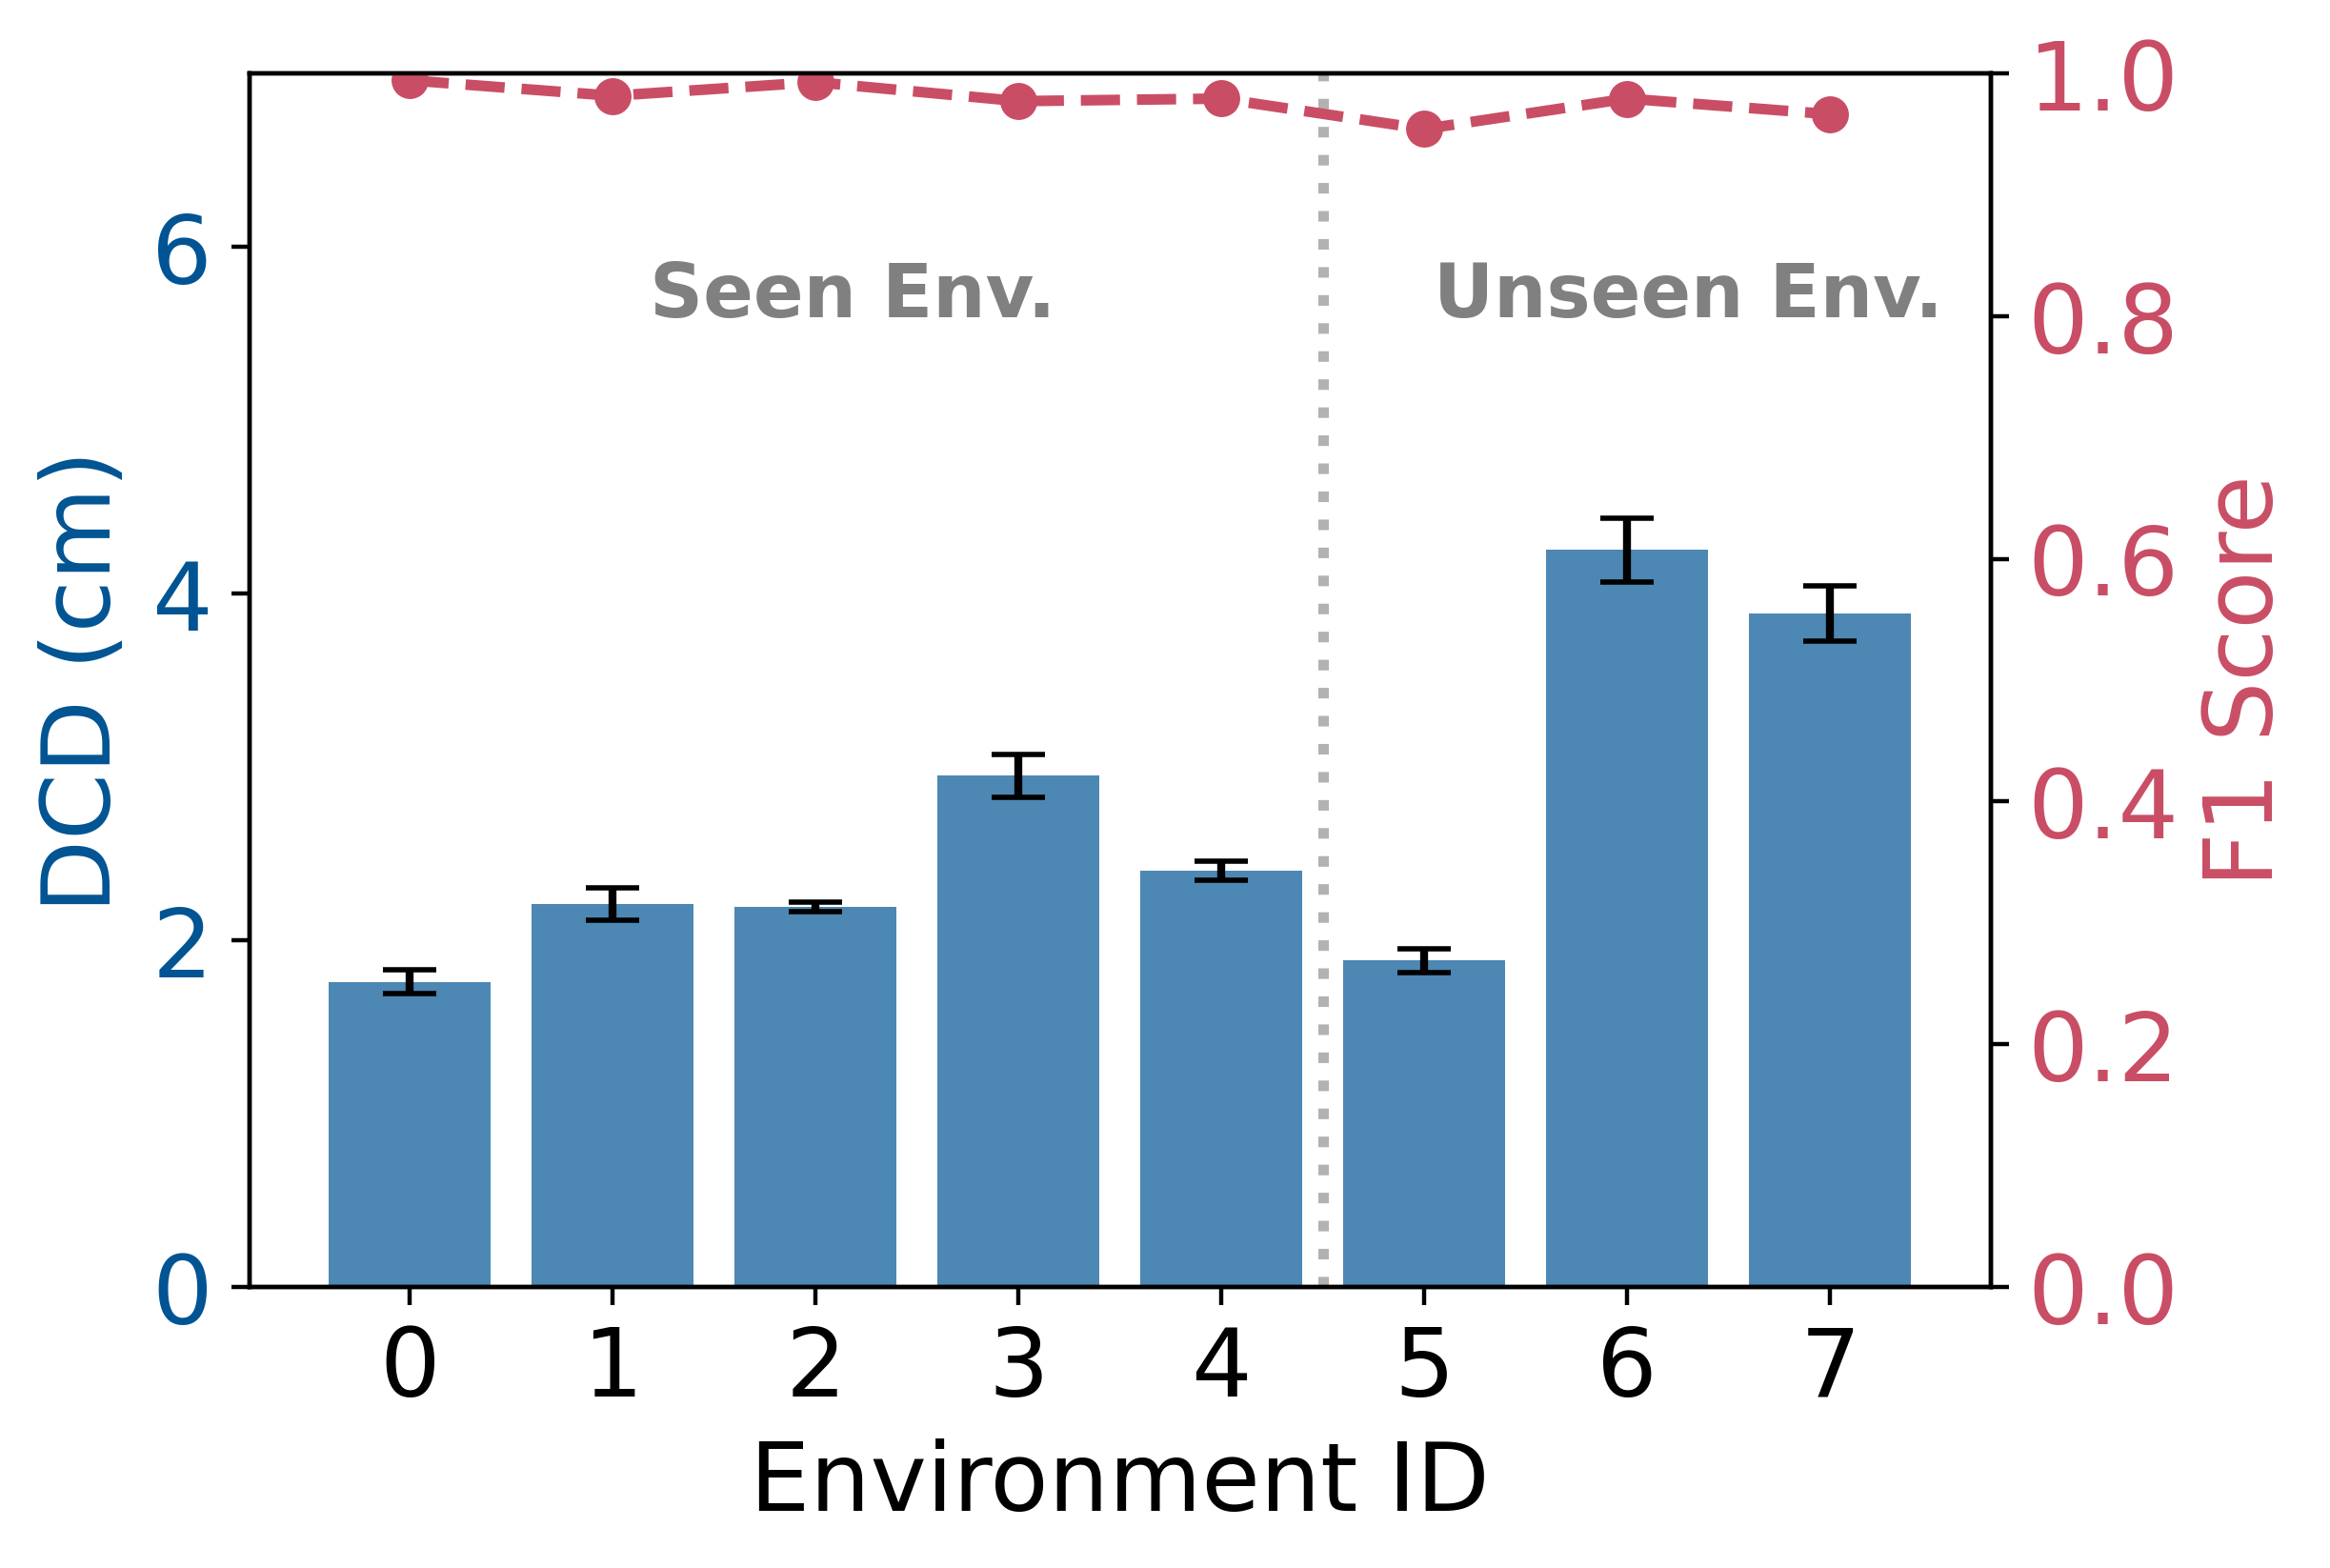

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Select recordings from multiple users in similar environments (E0 and E1) for cross-user analysis.
selected_recordings = [
'U0_E0_1_standing_1o3_none_1.pkl',
 'U0_E0_1_walking_0o7_OLBP-0_1.pkl',
 'U0_E0_1_walking_1o3_none_5.pkl',
 'U1_E0_1_standing_1o3_none_3.pkl',
 'U1_E0_1_walking_1o3_none_4.pkl',
 'U1_E0_1_walking_1o3_none_5.pkl',
 'U1_E0_1_walking_1o3_none_6.pkl',
  'U2_E0_1_sitting_1o3_none_2.pkl',
 'U2_E0_1_walking_1o3_none_2.pkl',
 'U2_E0_1_walking_1o3_none_3.pkl',
 'U2_E0_1_walking_1o3_none_4.pkl',
 'U2_E0_1_walking_1o3_none_5.pkl',

'U2_E1_1_walking_1o3_none_1.pkl',
 'U2_E1_1_walking_1o3_none_2.pkl',

 'U1_E2_1_sitting_1o3_none_2.pkl',
 'U1_E2_1_standing_1o3_none_1.pkl',
 'U1_E2_1_walking_1o3_none_2.pkl',
 'U2_E2_1_sitting_1o3_none_1.pkl',
 'U2_E2_1_walking_1o3_none_0.pkl',

 'U0_E3_1_walking_0o3_DH_0.pkl',
 'U0_E3_1_walking_0o3_DH_1.pkl',
 'U0_E3_1_walking_0o7_DH_1.pkl',
 'U0_E3_1_walking_1o0_AI-PC_1.pkl',
 'U0_E3_1_walking_1o0_AI-PT_2.pkl',
 'U0_E3_1_walking_1o0_C-C_2.pkl',
 'U0_E3_1_walking_1o0_C-D_1.pkl',
 'U0_E3_1_walking_1o0_C-D_2.pkl',
 'U0_E3_1_walking_1o0_HMG-CH_1.pkl',
 'U0_E3_1_walking_1o0_HMG-M_1.pkl',
 'U0_E3_1_walking_1o0_HMG-M_2.pkl',
 'U0_E3_1_walking_1o0_UO150_2.pkl',
 'U0_E3_1_walking_1o0_WS-0_1.pkl',
 'U0_E3_1_walking_1o0_WS-0_2.pkl',
 'U0_E3_1_walking_1o0_WS-1_2.pkl',
 'U0_E3_1_walking_1o0_WS-2_2.pkl',
 'U0_E3_1_walking_1o0_WS-3_2.pkl',
 'U0_E3_1_walking_1o4_DH_2.pkl',
    
 'U0_E4_1_standing_1o2_AI-SC_0.pkl',
 'U0_E4_1_standing_1o2_AI-ST_0.pkl',
 'U0_E4_1_walking_1o2_AI-SC_0.pkl',
 'U0_E4_1_walking_1o2_AI-SC_1.pkl',
 'U0_E4_1_walking_1o2_AI-SC_2.pkl',
 'U0_E4_1_walking_1o2_AI-ST_0.pkl',
 'U0_E4_1_walking_1o2_AI-ST_1.pkl',
 'U0_E4_1_walking_1o2_AI-ST_2.pkl',
    
 'U0_E7_1_cooking_1o0_AI-CC_2.pkl',
 'U0_E7_1_cooking_1o0_AI-CC_3.pkl',
 'U0_E7_1_cooking_1o0_AI-CT_5.pkl',
 'U0_E7_1_cooking_1o0_AI-CT_7.pkl',
 'U0_E7_1_walking_1o0_C-S_3.pkl',
 'U0_E7_1_walking_1o0_IA-0_2.pkl',
 'U0_E7_1_walking_1o0_IA-15_2.pkl',
 'U0_E7_1_walking_1o0_IA-30_1.pkl',
 'U0_E7_1_walking_1o0_IA-45_2.pkl',

 'U2_E11_1_walking_0o8_none_4.pkl',
 'U2_E11_1_walking_1o3_none_0.pkl',
 'U2_E11_1_walking_1o3_none_1.pkl',
 'U2_E11_1_walking_1o3_none_2.pkl',
 'U2_E11_1_walking_1o3_none_3.pkl',
 'U1_E11_1_standing_1o3_IA-15_2.pkl',
 'U1_E11_1_standing_1o3_IA-45_0.pkl',
 'U1_E11_1_standing_1o3_IA-45_1.pkl',
 'U1_E11_1_standing_1o3_UO30_2.pkl',
 'U1_E11_1_walking_1o3_none_0.pkl',
 'U1_E11_1_walking_1o3_none_1.pkl',
 'U1_E11_1_walking_1o3_none_2.pkl',
 'U1_E11_1_walking_1o3_none_4.pkl',

 'U0_E12_1_walking_1o3_none_0.pkl',
 'U0_E12_1_walking_1o3_none_5.pkl',
 'U1_E12_1_walking_1o3_none_1.pkl',
 'U1_E12_1_walking_1o3_none_2.pkl',
 'U1_E12_1_walking_1o3_none_4.pkl',
]

for ele in selected_recordings:
    if ele not in file_names:
        print('not found', ele)

metrics_df = load_metrics_df_0(model3_Log_folder_path, selected_recordings)

# Define seen and unseen environments
Seen = [0, 2, 3, 7,  11]  # Seen environment IDs
Unseen = [1, 4, 12, ]  # Unseen environment IDs
# Define in-the-wild environments
# in_the_wild_envs = [8, 9, 10]

def create_performance_visualization(selected_metrics_df):
    """
    Create performance visualization with different colors for seen and unseen users
    """
    print(f"Selected metrics shape: {selected_metrics_df.shape}")
    
    # Extract environment ID from file names
    def extract_env_id(filename):
        # Remove .pkl extension
        filename = filename.replace('.pkl', '')
        # Extract environment ID (E followed by number)
        import re
        match = re.search(r'E(\d+)', filename)
        if match:
            return int(match.group(1))
        return None
    
    selected_metrics_df['env_id'] = selected_metrics_df['file_name'].apply(extract_env_id)
    
    # Group by user_id and calculate metrics for each user
    metrics = selected_metrics_df.groupby('env_id').apply(
        lambda x: pd.Series({
            'env_id': x['env_id'].iloc[0],
            'true_positives': x['true_positives'].sum(),
            'false_positives': x['false_positives'].sum(),
            'false_negatives': x['false_negatives'].sum(),
            'chamfer_distance': x['chamfer_distance'].mean(),
            'One_directional_Chamfer_Distance': (np.sqrt(x['chamfer_distance'] / 2) / 10).mean(),
            'One_directional_Chamfer_Distance_sem': (np.sqrt(x['chamfer_distance'] / 2) / 10).std() / np.sqrt(len(x)) if len(x) > 0 else 0,
        })
    ).reset_index(drop=True)
    metrics['f1_score'] = 2 * metrics['true_positives'] / (2 * metrics['true_positives'] + metrics['false_positives'] + metrics['false_negatives'])

    # Print summary statistics for seen vs unseen
    seen_metrics = metrics[metrics['env_id'].isin(Seen)]
    unseen_metrics = metrics[metrics['env_id'].isin(Unseen)]
    
    
    from matplotlib.lines import Line2D
    df = metrics.copy()

    # Split & order: Seen first (sorted), then Unseen (sorted)
    df_seen   = df[df['env_id'].isin(Seen)].sort_values('env_id')
    df_unseen = df[df['env_id'].isin(Unseen)].sort_values('env_id')
    # print(df_seen)
    # print the mean of the seen environments
    print('Seen Environments: 0-4')
    print('Mean Directed Chamfer Distance: ', df_seen['One_directional_Chamfer_Distance'].mean())
    print('Mean F1 Score: ', df_seen['f1_score'].mean())
    print('Unseen Environments: 5-7')
    # print(df_unseen)
    # print the mean of the unseen environments
    print('Mean Directed Chamfer Distance: ', df_unseen['One_directional_Chamfer_Distance'].mean())
    print('Mean F1 Score: ', df_unseen['f1_score'].mean())
    df_plot   = pd.concat([df_seen, df_unseen], ignore_index=True)
    # print(df_plot)

    # To make the indication clear, we use 0 - 10 for the user label, not follow the env_id !!!!!!!!
    x_labels = ['0', '1', '2', '3', '4', '5', '6', '7',]
    x = np.arange(len(x_labels))

    # Optional error bars if present
    cd_err = df_plot['One_directional_Chamfer_Distance_sem'] if 'One_directional_Chamfer_Distance_sem' in df_plot.columns else None
    f1_err = df_plot['f1_sem'] if 'f1_sem' in df_plot.columns else None

    plt.rcParams.update({'font.size': 18})
    fig, ax1 = plt.subplots(figsize=(6, 4), dpi=400, layout='constrained')

    # --- Bars: Directed Chamfer Distance (left y-axis) ---
    bars = ax1.bar(
        x,
        df_plot['One_directional_Chamfer_Distance'],
        yerr=cd_err,
        capsize=5 if cd_err is not None else 0,
        color='#015493',
        alpha=0.7,
        label='DCD'
    )
    ax1.set_ylabel('DCD (cm)', color='#015493')
    ax1.tick_params(axis='y', labelcolor='#015493')

    # Set a sensible y-limit
    if df_plot['One_directional_Chamfer_Distance'].notna().any():
        ymax = float(np.nanmax(df_plot['One_directional_Chamfer_Distance'])) * 1.15
        ax1.set_ylim(0, 7)

    # --- Line: F1 Score (right y-axis) ---
    ax2 = ax1.twinx()
    ax2.plot(
        x,
        df_plot['f1_score'],
        marker='o',
        linestyle='--',
        linewidth=2,
        color='#C94E65',
        label='F1 Score'
    )
    if f1_err is not None:
        ax2.fill_between(x, df_plot['f1_score'] - f1_err, df_plot['f1_score'] + f1_err, alpha=0.15)
    ax2.set_ylabel('F1 Score', color='#C94E65')
    ax2.tick_params(axis='y', labelcolor='#C94E65')
    ax2.set_ylim(0, 1.0)

    # --- X ticks & label coloring ---
    ax1.set_xlabel('Environment ID')
    ax1.set_xticks(x)
    ax1.set_xticklabels(x_labels, rotation=0, ha='center')

    seen_color   = '#2E86AB'  # blue for Seen
    unseen_color = '#A23B72'  # purple for Unseen
    seen_count = len(df_seen)
    # Optional separator between Seen and Unseen groups
    if seen_count > 0 and seen_count < len(df_plot):
        ax1.axvline(seen_count - 0.5, color='gray', linestyle=':', linewidth=2, alpha=0.6)

    # add to text boxs, left is 'Seen' and right is 'Unseen'
    ax1.text(0.23, 0.8, 'Seen Env.', transform=ax1.transAxes, color='gray', fontsize=14, fontweight='bold')
    ax1.text(0.68, 0.8, 'Unseen Env.', transform=ax1.transAxes, color='gray', fontsize=14, fontweight='bold')

    fig_name = 'Figures/cross_env_metrics'
    plt.savefig(fig_name + ".png", dpi=200, bbox_inches='tight')
    plt.savefig(fig_name + ".pdf", bbox_inches='tight')

    plt.show()
    # plt.close()

    return metrics

metrics = create_performance_visualization(metrics_df)



### User Activity

/tmp/ipykernel_1352470/3124078416.py:62: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  metrics = selected_metrics_df.groupby('activity_id').apply(


One_directional_Chamfer_Distance:  0    6.274648
1    2.445219
2    1.375247
3    3.002063
4    1.984270
Name: One_directional_Chamfer_Distance, dtype: float64
f1_score:  0    0.959964
1    0.982808
2    0.997807
3    1.000000
4    0.991615
Name: f1_score, dtype: float64
x_labels:  ['Walking', 'Standing', 'Sitting', 'Lying', 'Cooking']


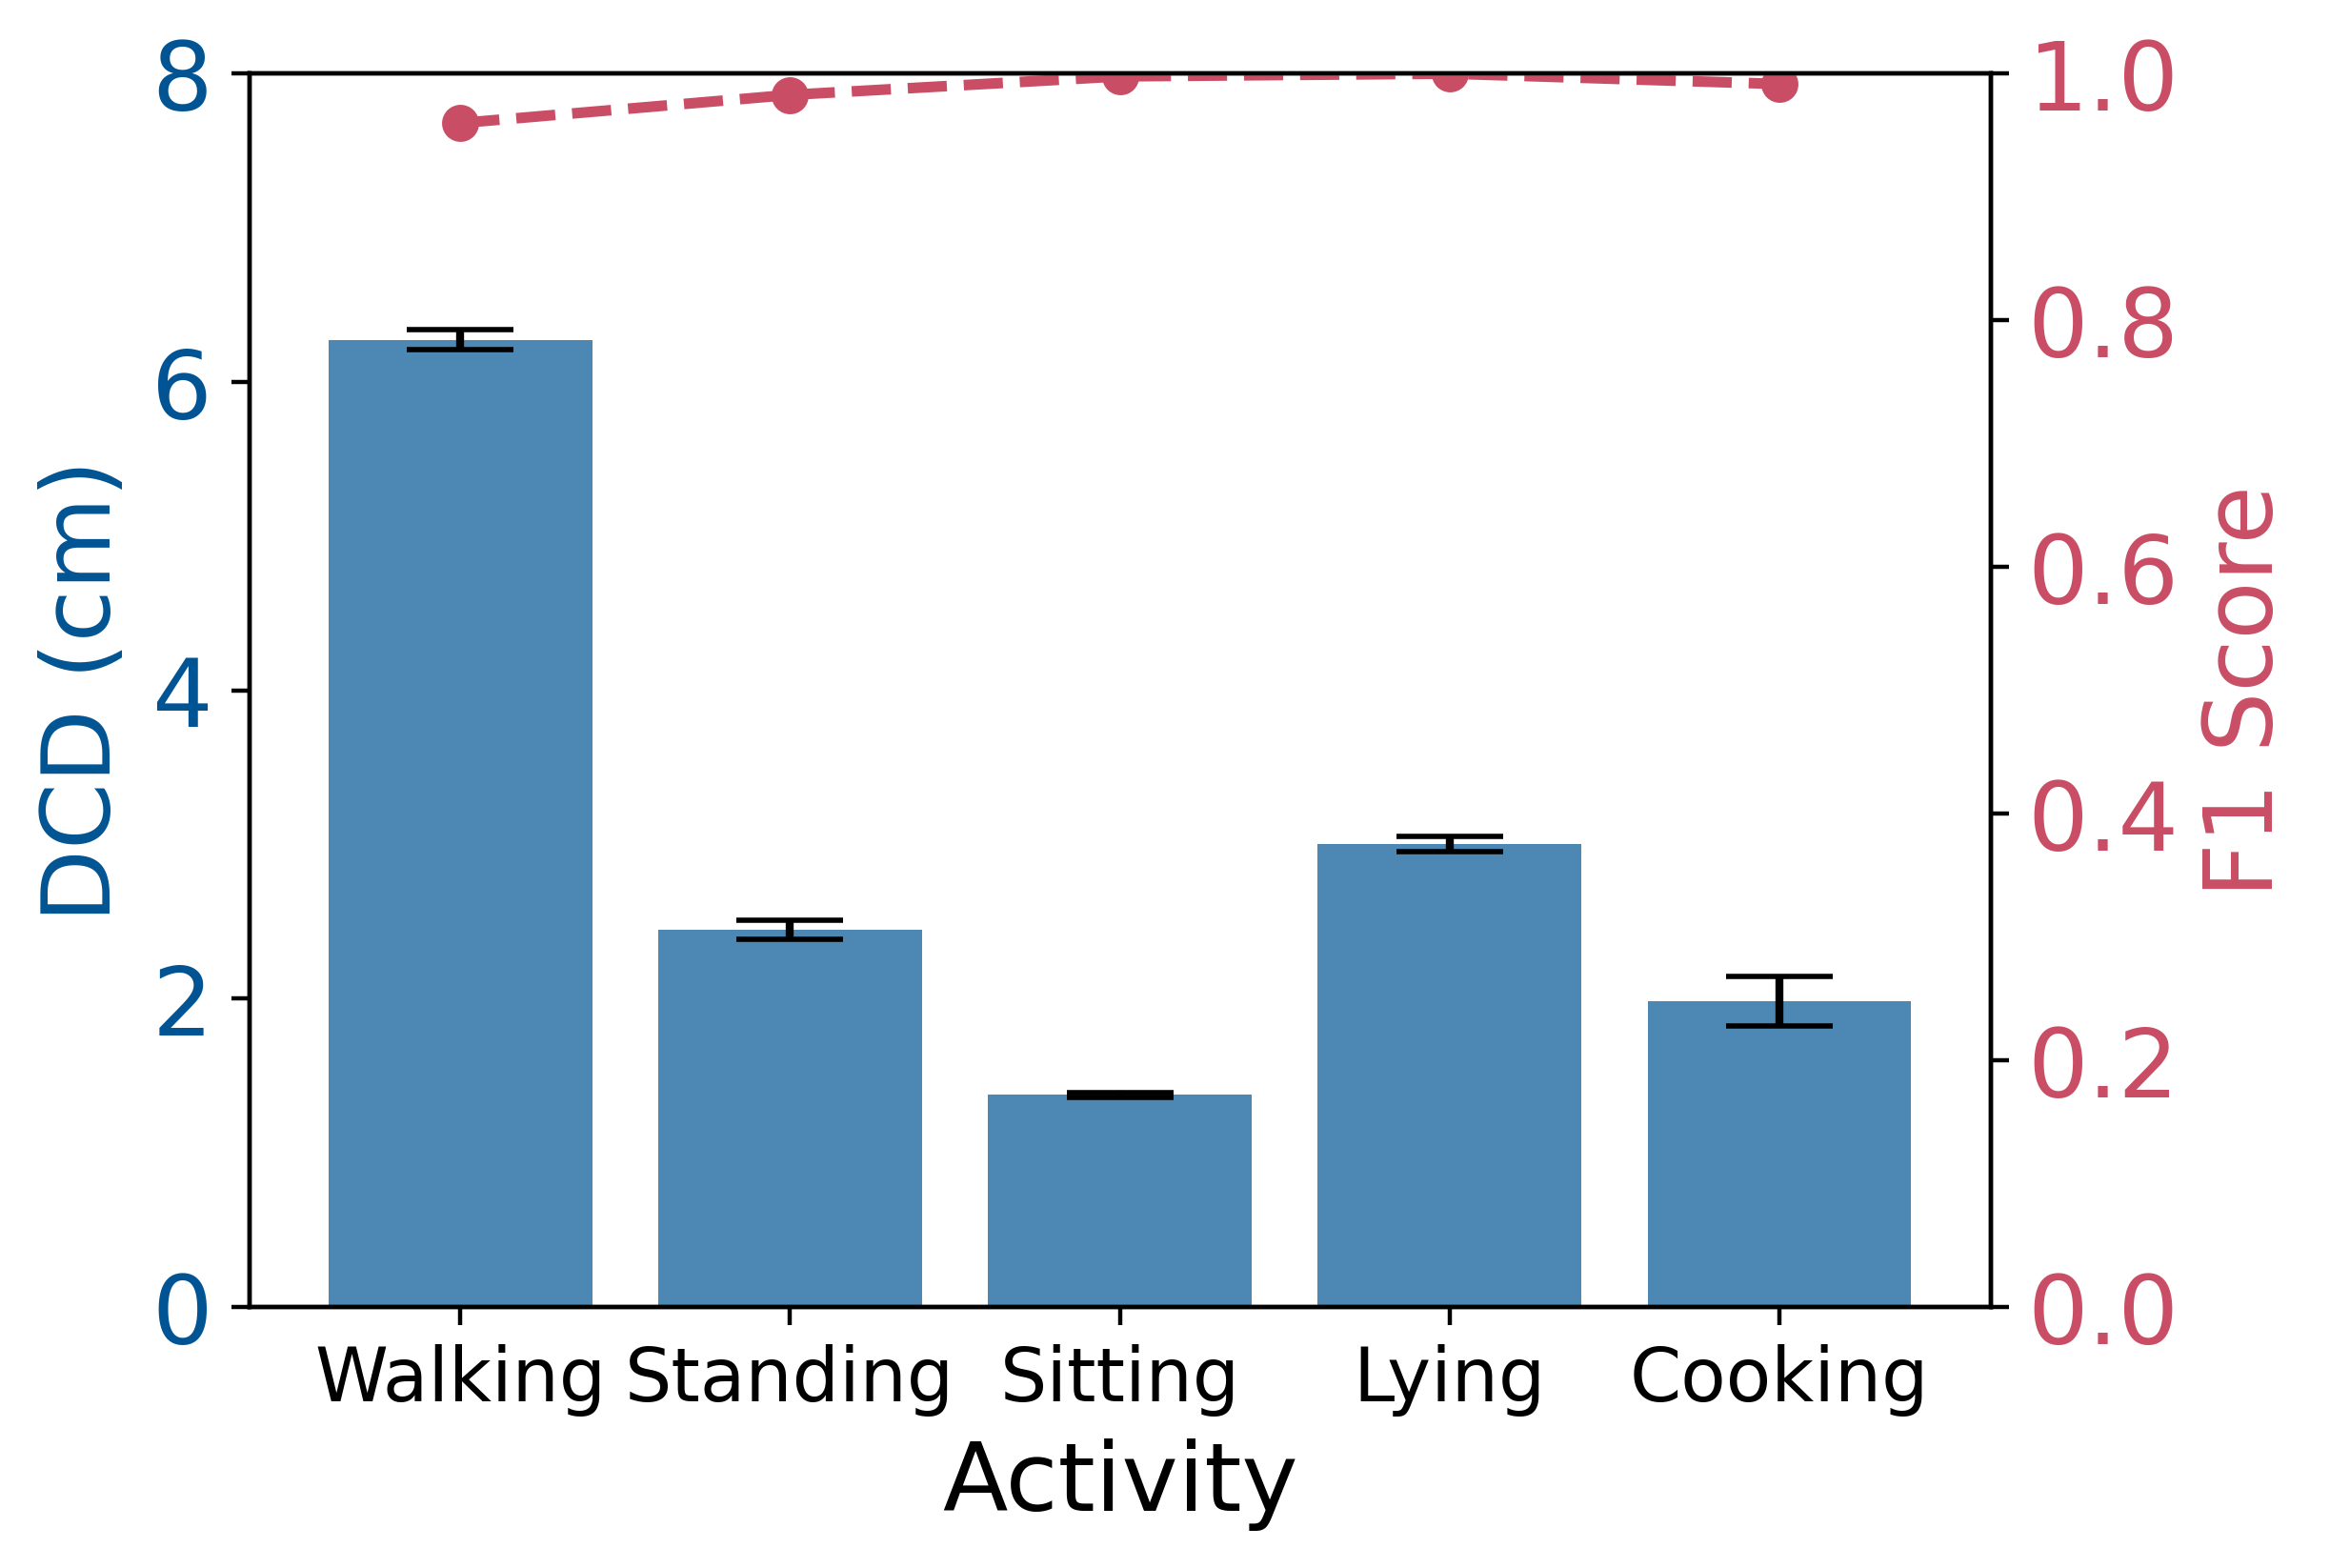

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



# Select recordings from multiple users in similar environments (E0 and E1) for cross-user analysis.
selected_recordings = [
    'U0_E0_1_walking_1o3_none_3',
    'U0_E0_1_walking_1o3_none_5',
    'U0_E0_1_walking_0o7_OLBP-0_1',
    'U0_E0_1_walking_1o3_none_5',

    'U2_E0_1_sitting_1o3_none_2',
    'U2_E2_1_sitting_1o3_none_1',
    'U4_E0_1_sitting_1o3_none_0',
    'U7_E2_1_sitting_1o3_none_1',

    'U0_E0_1_standing_1o3_none_1',
    'U0_E4_1_standing_1o2_AI-ST_0',
    'U0_E4_1_standing_1o2_AI-SC_0',
    'U1_E0_1_standing_1o3_none_2',
    'U1_E0_1_standing_1o3_none_3',
    'U3_E0_1_standing_1o3_none_0',
    'U3_E0_1_standing_1o3_none_1',

    'U9_E2_1_lying_1o3_none_1',
    'U9_E2_1_lying_1o3_none_3',
    # 'U9_E2_1_lying_1o3_none_2',
    'U8_E2_1_lying_1o3_none_2',

    'U0_E7_1_cooking_1o0_AI-CC_2',
    'U0_E7_1_cooking_1o0_AI-CC_3',
    'U0_E7_1_cooking_1o0_AI-CT_5',
    'U0_E7_1_cooking_1o0_AI-CT_7',
  
]

for i in range(len(selected_recordings)):
    selected_recordings[i] = selected_recordings[i] + '.pkl'

for ele in selected_recordings:
    if ele not in file_names:
        print('not found', ele)

metrics_df = load_metrics_df_0(model3_Log_folder_path, selected_recordings)

# Get activity distribution
activity_counts = selected_metrics_df['activity_id'].value_counts().sort_index()
activity_names = {
    0: 'Walking',
    1: 'Standing',
    2: 'Sitting',
    3: 'Lying',
    4: 'Cooking'
}

# Map activity IDs to names for better readability
activity_labels = [activity_names.get(act_id, f'Activity {act_id}') for act_id in activity_counts.index]

# Group by activity_id and calculate metrics for each activity
metrics = selected_metrics_df.groupby('activity_id').apply(
    lambda x: pd.Series({
        'activity_id': x['activity_id'].iloc[0],
        'true_positives': x['true_positives'].sum(),
        'false_positives': x['false_positives'].sum(),
        'false_negatives': x['false_negatives'].sum(),
        'chamfer_distance': x['chamfer_distance'].mean(),
        'One_directional_Chamfer_Distance': (np.sqrt(x['chamfer_distance'] / 2) / 10).mean(),
        'One_directional_Chamfer_Distance_sem': (np.sqrt(x['chamfer_distance'] / 2) / 10).std() / np.sqrt(len(x)) if len(x) > 0 else 0,
    })
).reset_index(drop=True)
metrics['f1_score'] = 2 * metrics['true_positives'] / (2 * metrics['true_positives'] + metrics['false_positives'] + metrics['false_negatives'])


from matplotlib.lines import Line2D
df = metrics.copy()

# print(df)

df_plot   = df
# print(df_plot)

x_labels = [activity_names.get(act_id, f'Activity {act_id}') for act_id in activity_counts.index]
x = np.arange(len(x_labels))

# Optional error bars if present
cd_err = df_plot['One_directional_Chamfer_Distance_sem'] if 'One_directional_Chamfer_Distance_sem' in df_plot.columns else None
f1_err = df_plot['f1_sem'] if 'f1_sem' in df_plot.columns else None

plt.rcParams.update({'font.size': 18})
fig, ax1 = plt.subplots(figsize=(6, 4), dpi=400, layout='constrained')

# --- Bars: Directed Chamfer Distance (left y-axis) ---
bars = ax1.bar(
    x,
    df_plot['One_directional_Chamfer_Distance'],
    yerr=cd_err,
    # error_kw=dict(lw=9),  # Set error bar line width
    capsize=10 if cd_err is not None else 0,
    color='#015493',
    alpha=0.7,
    label='DCD'
)
ax1.set_ylabel('DCD (cm)', color='#015493')
ax1.tick_params(axis='y', labelcolor='#015493')

print('One_directional_Chamfer_Distance: ', df_plot['One_directional_Chamfer_Distance'])
# Set a sensible y-limit
if df_plot['One_directional_Chamfer_Distance'].notna().any():
    ymax = float(np.nanmax(df_plot['One_directional_Chamfer_Distance'])) * 1.15
    ax1.set_ylim(0, 8)

# --- Line: F1 Score (right y-axis) ---
ax2 = ax1.twinx()
ax2.plot(
    x,
    df_plot['f1_score'],
    marker='o',
    linestyle='--',
    linewidth=2,
    color='#C94E65',
    label='F1 Score'
)
if f1_err is not None:
    ax2.fill_between(x, df_plot['f1_score'] - f1_err, df_plot['f1_score'] + f1_err, alpha=0.15)
ax2.set_ylabel('F1 Score', color='#C94E65')
ax2.tick_params(axis='y', labelcolor='#C94E65')
ax2.set_ylim(0, 1.0)

print('f1_score: ', df_plot['f1_score'])

# --- X ticks & label coloring ---
ax1.set_xlabel('Activity')
ax1.set_xticks(x)
ax1.set_xticklabels(x_labels, rotation=0, ha='center', fontsize=14)
print('x_labels: ', x_labels)

fig_name = 'Figures/cross_activity_metrics'
plt.savefig(fig_name + ".png", dpi=200, bbox_inches='tight')
plt.savefig(fig_name + ".pdf", bbox_inches='tight')


plt.show()
# plt.close()



### Clothes

/tmp/ipykernel_1352470/3440158606.py:58: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  metrics = value.groupby('file_name').apply(
/tmp/ipykernel_1352470/3440158606.py:58: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  metrics = value.groupby('file_name').apply(
/tmp/ipykernel_1352470/3440158606.py:58: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future 

Coat+Hat
One_directional_Chamfer_Distance 2.276832734160687
One_directional_Chamfer_Distance_sem 0.17282698382946005
f1_score 0.9795081967213115
--------------------------------
Jacket+Hat
One_directional_Chamfer_Distance 2.3015514215271096
One_directional_Chamfer_Distance_sem 0.16362919059190542
f1_score 0.9711934156378601
--------------------------------
Coat+Mask
One_directional_Chamfer_Distance 1.8653957835814057
One_directional_Chamfer_Distance_sem 0.07641671351530793
f1_score 0.9970845481049563
--------------------------------
Shirt
One_directional_Chamfer_Distance 2.5425703917931632
One_directional_Chamfer_Distance_sem 0.1210765054873055
f1_score 0.9940828402366864
--------------------------------
Coat
One_directional_Chamfer_Distance 2.430981908872765
One_directional_Chamfer_Distance_sem 0.1407605283975423
f1_score 0.999000999000999
--------------------------------
Jacket
One_directional_Chamfer_Distance 1.9838949931514103
One_directional_Chamfer_Distance_sem 0.0841619569773950

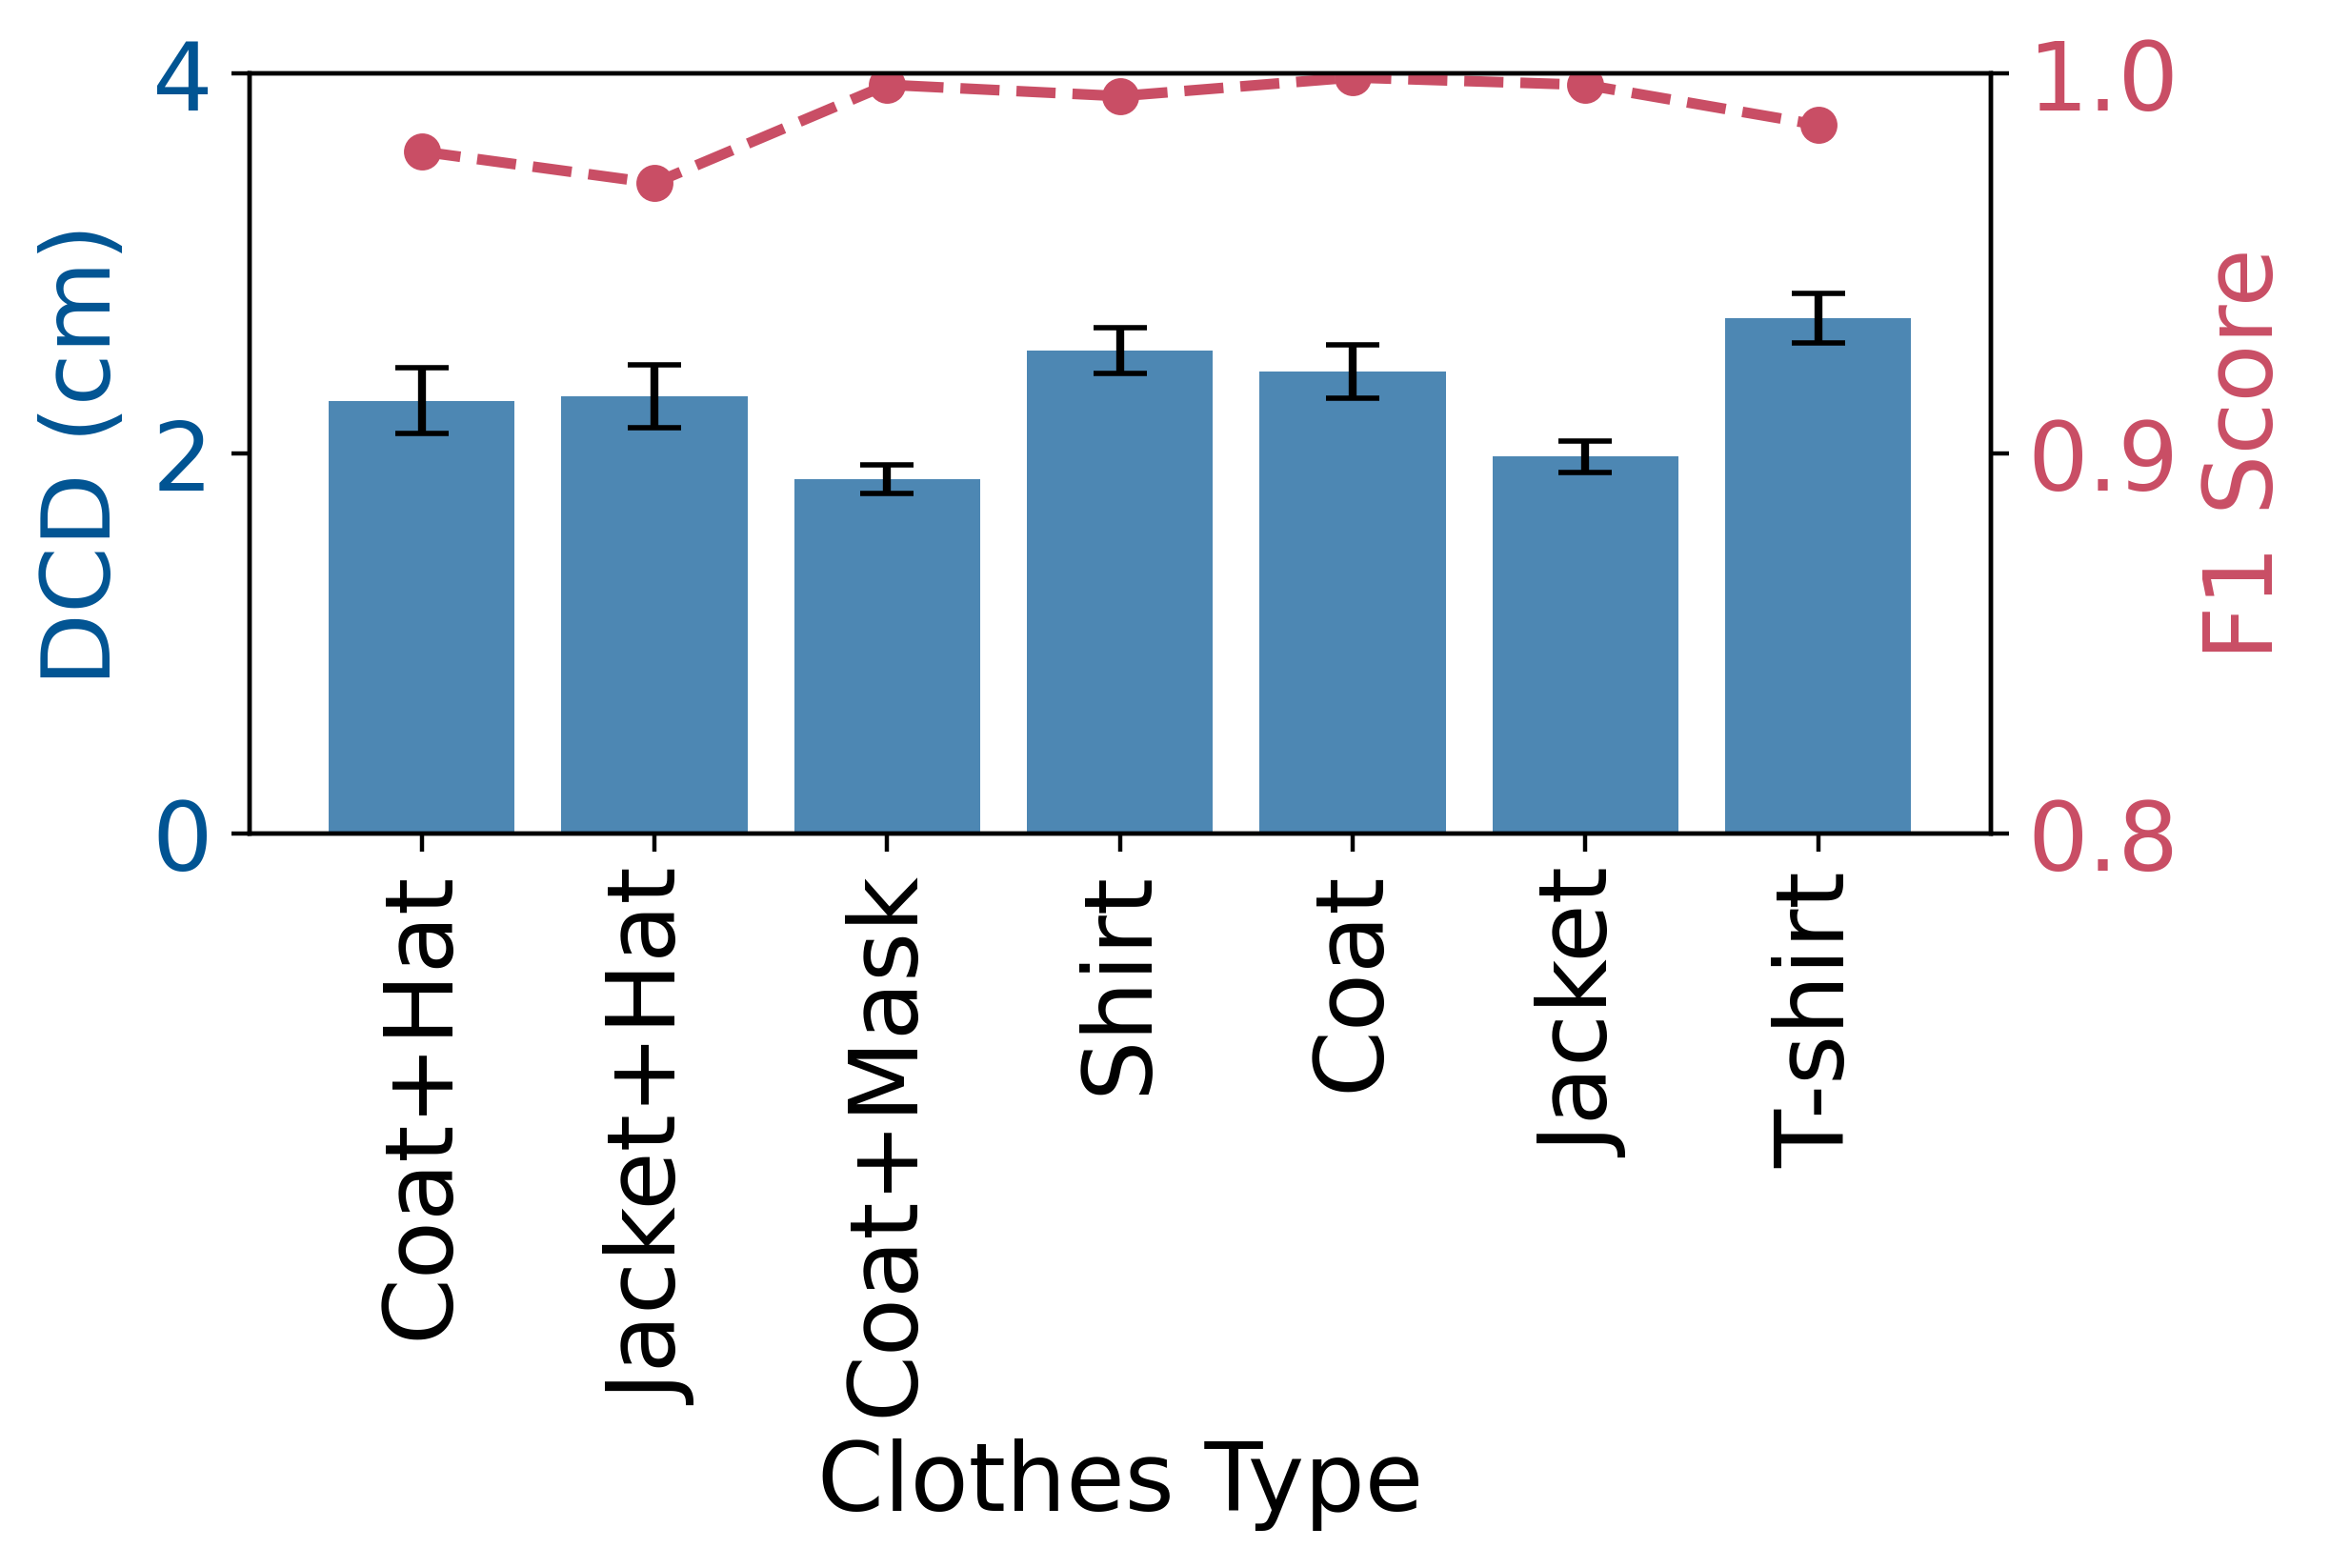

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np




clothes_CH_file_list = [
  'U0_E3_1_walking_1o0_HMG-CH_1.pkl', #coat-hat
]
clothes_DH_file_list = [
  'U0_E3_1_walking_1o0_HMG-DH_2.pkl', #down jacket-hat
]
clothes_M_file_list = [
  'U0_E3_1_walking_1o0_HMG-M_1.pkl', #coat-mask
]
clothes_S_file_list = [
  'U0_E7_1_walking_1o0_C-S_3.pkl', #shirt
]
clothes_C_file_list = [
  'U0_E3_1_walking_1o0_C-C_2.pkl', #coat
]
clothes_D_file_list = [
  'U0_E3_1_walking_1o0_C-D_1.pkl', #down jacket
]
clothes_T_file_list = [
  'U0_E3_1_walking_1o0_C-T_2.pkl', #T-shirt 
]


# Select recordings from multiple users in similar environments (E0 and E1) for cross-user analysis.
selected_recordings = clothes_CH_file_list + clothes_DH_file_list + clothes_M_file_list + clothes_S_file_list + clothes_C_file_list + clothes_D_file_list + clothes_T_file_list

    
for ele in selected_recordings:
    if ele not in file_names:
        print('not found', ele)
        


# metrics_df = load_metrics_df_0(model3_Log_folder_path, selected_recordings)

clothes_dict = {
    'Coat+Hat': load_metrics_df_0(model3_Log_folder_path, clothes_CH_file_list),
    'Jacket+Hat': load_metrics_df_0(model3_Log_folder_path, clothes_DH_file_list),
    'Coat+Mask': load_metrics_df_0(model3_Log_folder_path, clothes_M_file_list),
    'Shirt': load_metrics_df_0(model3_Log_folder_path, clothes_S_file_list),
    'Coat': load_metrics_df_0(model3_Log_folder_path, clothes_C_file_list),
    'Jacket': load_metrics_df_0(model3_Log_folder_path, clothes_D_file_list),
    'T-shirt': load_metrics_df_0(model3_Log_folder_path, clothes_T_file_list)
}

direct_chamfer_distance_list = []
direct_chamfer_distance_sem_list = []
f1_score_list = []

for key, value in clothes_dict.items():
  metrics = value.groupby('file_name').apply(
      lambda x: pd.Series({
          'file_name': x['file_name'].iloc[0],
          'true_positives': x['true_positives'].sum(),
          'false_positives': x['false_positives'].sum(),
          'false_negatives': x['false_negatives'].sum(),
          'chamfer_distance': x['chamfer_distance'].mean(),
          'One_directional_Chamfer_Distance': (np.sqrt(x['chamfer_distance'] / 2) / 10).mean(),
          'One_directional_Chamfer_Distance_sem': (np.sqrt(x['chamfer_distance'] / 2) / 10).std() / np.sqrt(len(x)) if len(x) > 0 else 0,
      })
  ).reset_index(drop=True)
  metrics['f1_score'] = 2 * metrics['true_positives'] / (2 * metrics['true_positives'] + metrics['false_positives'] + metrics['false_negatives'])
  direct_chamfer_distance_list.append(metrics['One_directional_Chamfer_Distance'].mean())
  direct_chamfer_distance_sem_list.append(metrics['One_directional_Chamfer_Distance_sem'].mean())
  f1_score_list.append(metrics['f1_score'].mean())
  print(key)
  print('One_directional_Chamfer_Distance', metrics['One_directional_Chamfer_Distance'].mean())
  print('One_directional_Chamfer_Distance_sem', metrics['One_directional_Chamfer_Distance_sem'].mean())
  print('f1_score', metrics['f1_score'].mean())
  print('--------------------------------')


x_labels = [key for key in clothes_dict.keys()]
x = np.arange(len(x_labels))


from matplotlib.lines import Line2D


# Optional error bars if present
cd_err = direct_chamfer_distance_sem_list
f1_err = f1_score_list

plt.rcParams.update({'font.size': 18})
fig, ax1 = plt.subplots(figsize=(6, 4), dpi=400, layout='constrained')

# --- Bars: Directed Chamfer Distance (left y-axis) ---
bars = ax1.bar(
    x,
    direct_chamfer_distance_list,
    yerr=cd_err,
    capsize=5 if cd_err is not None else 0,
    color='#015493',
    alpha=0.7,
    label='DCD'
)
ax1.set_ylabel('DCD (cm)', color='#015493', ha='center')
# ax1.yaxis.set_label_coords(-0.08, 0.3)  # Move y-label a little to the right (x=0 is far left, x=1 is far right)
ax1.tick_params(axis='y', labelcolor='#015493')
ax1.set_ylim(0, 4)

print('direct_chamfer_distance_list: ', direct_chamfer_distance_list)
print('f1_score_list: ', f1_score_list)
print('x_labels: ', x_labels)

# --- Line: F1 Score (right y-axis) ---
ax2 = ax1.twinx()
ax2.plot(
    x,
    f1_score_list,
    marker='o',
    linestyle='--',
    linewidth=2,
    color='#C94E65',
    label='F1 Score'
)

ax2.set_ylabel('F1 Score', color='#C94E65')
ax2.tick_params(axis='y', labelcolor='#C94E65')
ax2.set_ylim(0.8, 1.0)

# --- X ticks & label coloring ---
ax1.set_xlabel('Clothes Type')
ax1.set_xticks(x)
ax1.set_xticklabels(x_labels, rotation=90, ha='center')

fig_name = 'Figures/clothes_metrics'
plt.savefig(fig_name + ".png", dpi=200, bbox_inches='tight')
plt.savefig(fig_name + ".pdf", bbox_inches='tight')

plt.show()




### Incident angle

/tmp/ipykernel_1352470/3338720798.py:48: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  metrics = value.groupby('file_name').apply(
/tmp/ipykernel_1352470/3338720798.py:48: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  metrics = value.groupby('file_name').apply(
/tmp/ipykernel_1352470/3338720798.py:48: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future 

0°
One_directional_Chamfer_Distance 1.3437326621675953
One_directional_Chamfer_Distance_sem 0.036785296390964894
f1_score 1.0
--------------------------------
15°
One_directional_Chamfer_Distance 1.3197951486591444
One_directional_Chamfer_Distance_sem 0.04693147046604486
f1_score 0.9970472440944882
--------------------------------
30°
One_directional_Chamfer_Distance 1.996508754597971
One_directional_Chamfer_Distance_sem 0.13226671803535853
f1_score 0.99800796812749
--------------------------------
45°
One_directional_Chamfer_Distance 4.6831254039258665
One_directional_Chamfer_Distance_sem 0.4197998597493749
f1_score 0.9258799810856745
--------------------------------
direct_chamfer_distance_list:  [np.float64(1.3437326621675953), np.float64(1.3197951486591444), np.float64(1.996508754597971), np.float64(4.6831254039258665)]
f1_score_list:  [np.float64(1.0), np.float64(0.9970472440944882), np.float64(0.99800796812749), np.float64(0.9258799810856745)]
x_labels:  ['0°', '15°', '30°', '45°

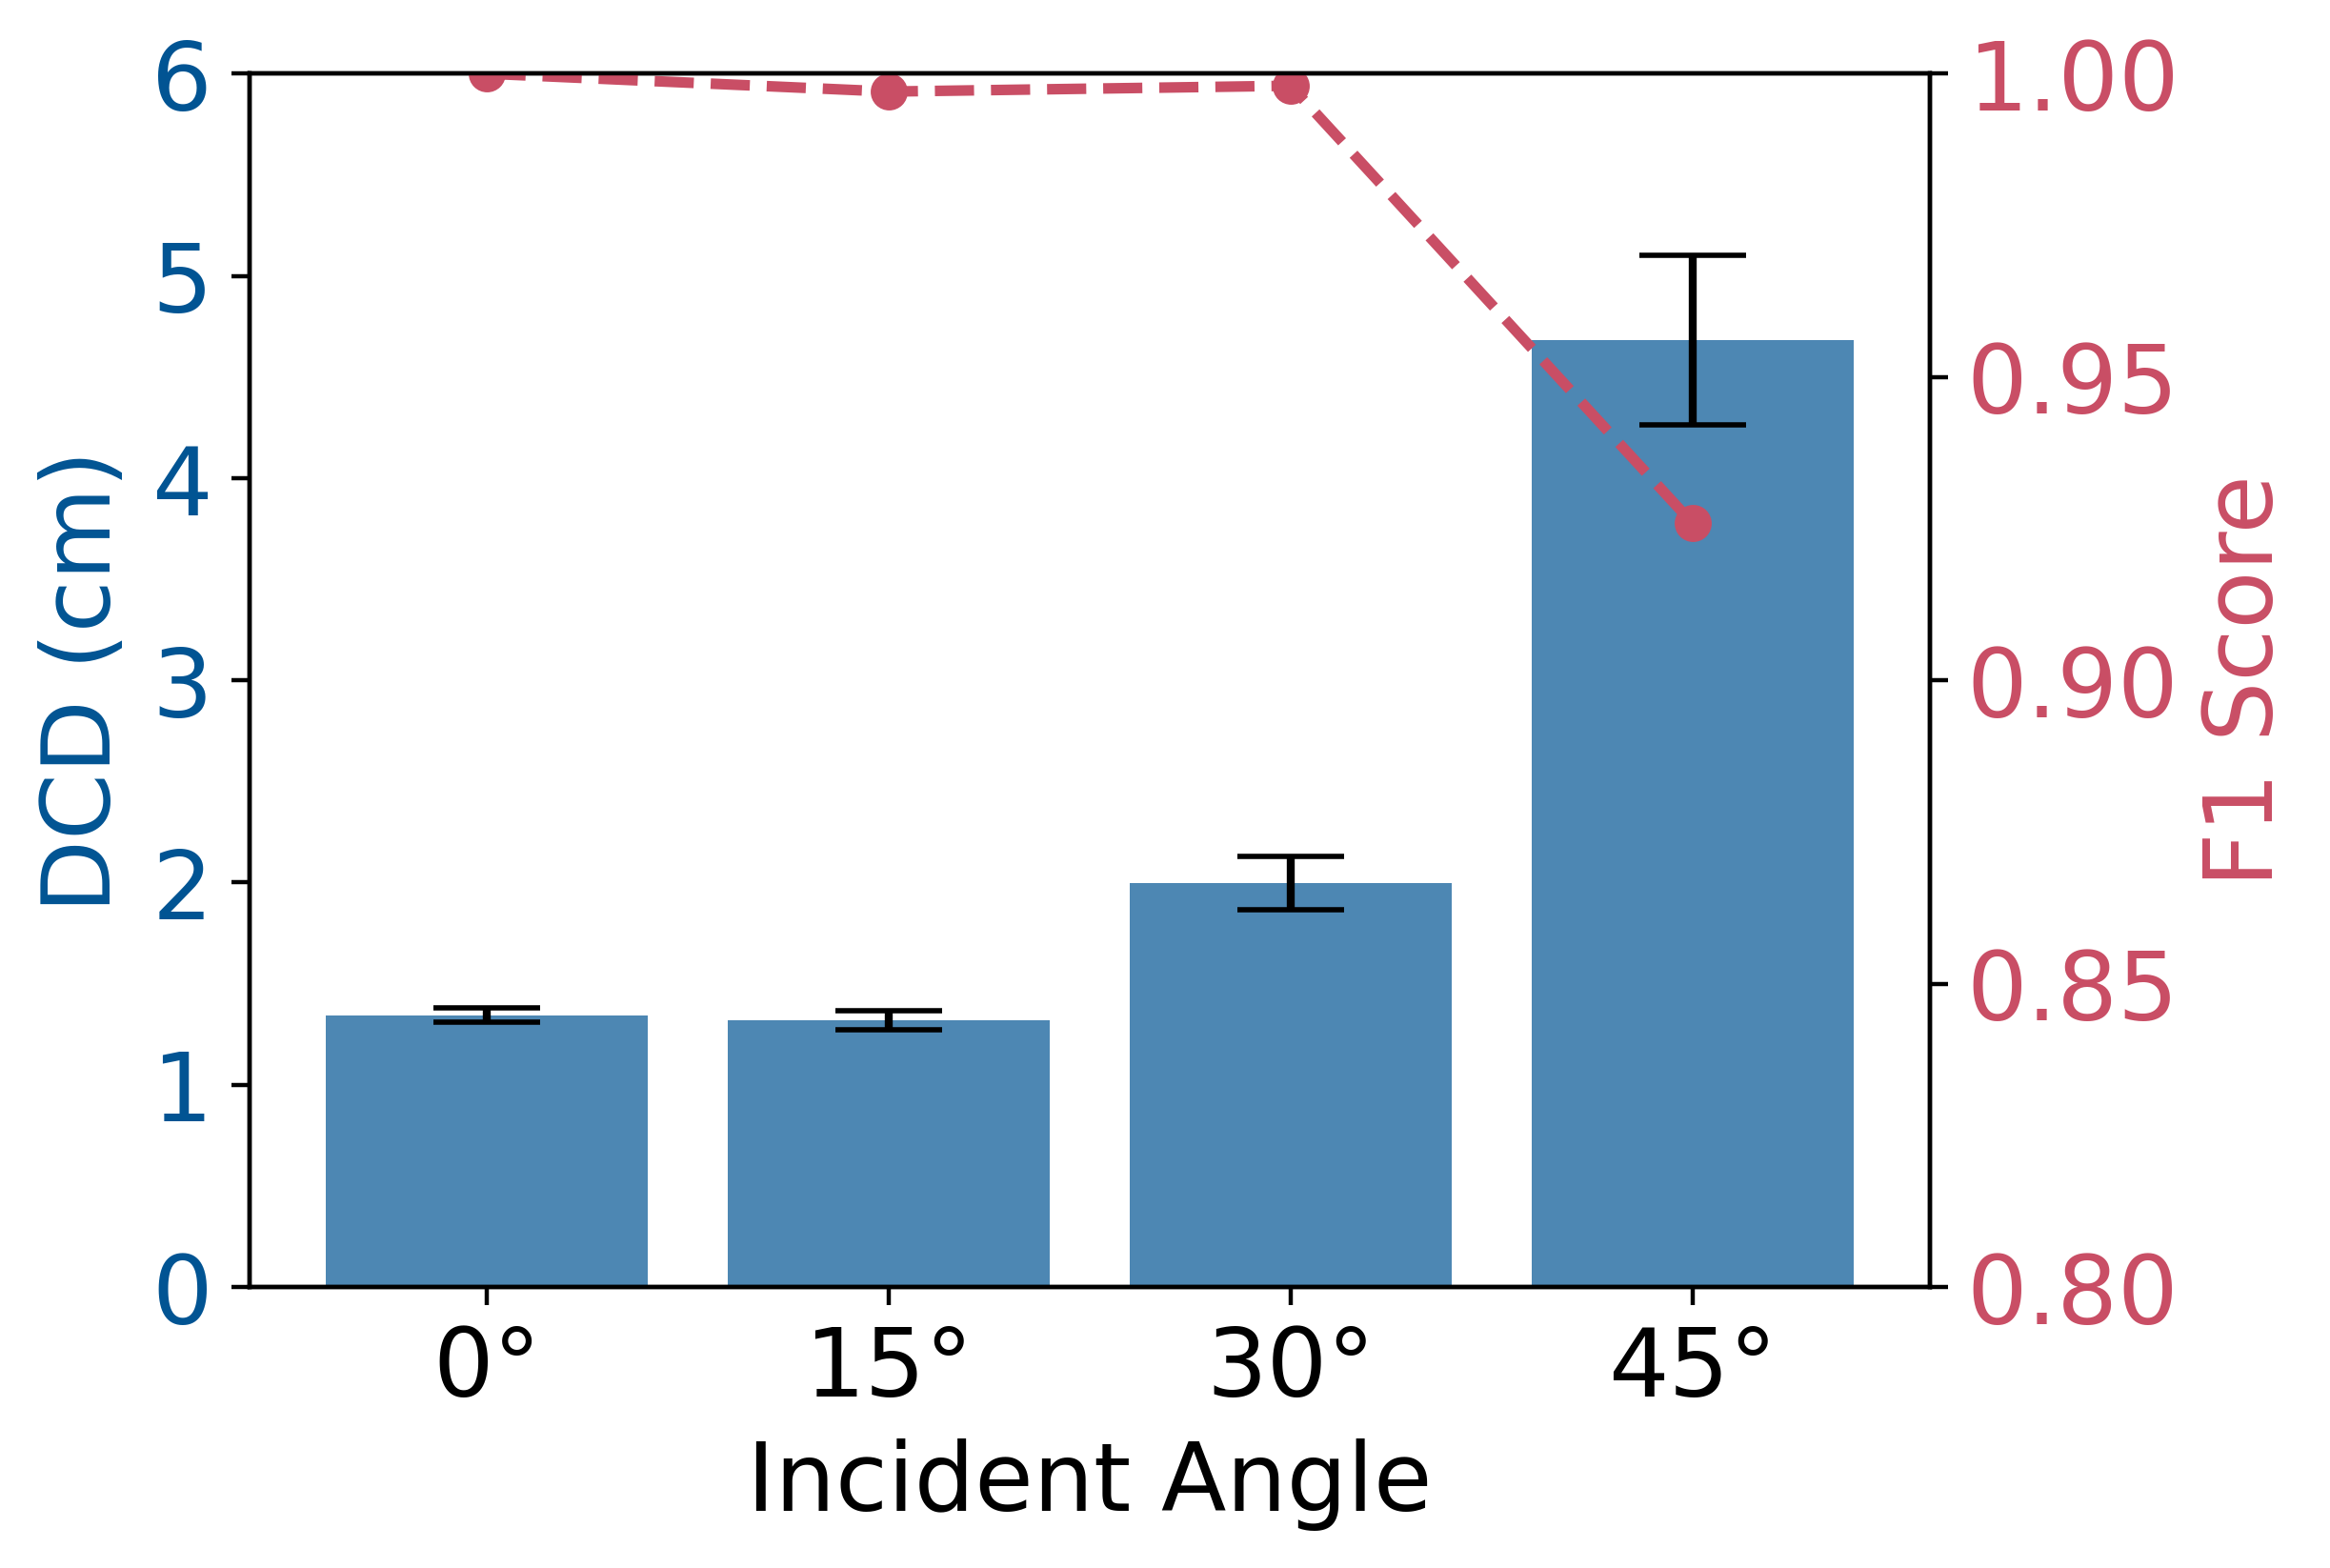

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


incident_angle_0_deg_file_list = [
  'U0_E7_1_walking_1o0_IA-0_2.pkl',
  'U1_E11_1_standing_1o3_IA-0_2.pkl',
 ]
incident_angle_15_deg_file_list = [
  'U0_E7_1_walking_1o0_IA-15_2.pkl',
    'U1_E11_1_standing_1o3_IA-15_2.pkl',
    ]
incident_angle_30_deg_file_list = [
  'U0_E7_1_walking_1o0_IA-30_1.pkl',
  'U1_E11_1_standing_1o3_IA-30_2.pkl',
    ]
incident_angle_45_deg_file_list = [

  'U0_E7_1_walking_1o0_IA-45_2.pkl',
  'U1_E11_1_standing_1o3_IA-45_0.pkl',
  'U1_E11_1_standing_1o3_IA-45_1.pkl',
    ]


# Select recordings from multiple users in similar environments (E0 and E1) for cross-user analysis.
selected_recordings = incident_angle_0_deg_file_list + incident_angle_15_deg_file_list + incident_angle_30_deg_file_list + incident_angle_45_deg_file_list

    
for ele in selected_recordings:
    if ele not in file_names:
        print('not found', ele)
        


incident_angle_dict = {
    '0°': load_metrics_df_0(model3_Log_folder_path, incident_angle_0_deg_file_list),
    '15°': load_metrics_df_0(model3_Log_folder_path, incident_angle_15_deg_file_list),
    '30°': load_metrics_df_0(model3_Log_folder_path, incident_angle_30_deg_file_list),
    '45°': load_metrics_df_0(model3_Log_folder_path, incident_angle_45_deg_file_list)
}

direct_chamfer_distance_list = []
direct_chamfer_distance_sem_list = []
f1_score_list = []

for key, value in incident_angle_dict.items():
  metrics = value.groupby('file_name').apply(
      lambda x: pd.Series({
          'file_name': x['file_name'].iloc[0],
          'true_positives': x['true_positives'].sum(),
          'false_positives': x['false_positives'].sum(),
          'false_negatives': x['false_negatives'].sum(),
          'chamfer_distance': x['chamfer_distance'].mean(),
          'One_directional_Chamfer_Distance': (np.sqrt(x['chamfer_distance'] / 2) / 10).mean(),
          'One_directional_Chamfer_Distance_sem': (np.sqrt(x['chamfer_distance'] / 2) / 10).std() / np.sqrt(len(x)) if len(x) > 0 else 0,
      })
  ).reset_index(drop=True)
  metrics['f1_score'] = 2 * metrics['true_positives'] / (2 * metrics['true_positives'] + metrics['false_positives'] + metrics['false_negatives'])
  direct_chamfer_distance_list.append(metrics['One_directional_Chamfer_Distance'].mean())
  direct_chamfer_distance_sem_list.append(metrics['One_directional_Chamfer_Distance_sem'].mean())
  f1_score_list.append(metrics['f1_score'].mean())
  print(key)
  print('One_directional_Chamfer_Distance', metrics['One_directional_Chamfer_Distance'].mean())
  print('One_directional_Chamfer_Distance_sem', metrics['One_directional_Chamfer_Distance_sem'].mean())
  print('f1_score', metrics['f1_score'].mean())
  print('--------------------------------')


x_labels = [key for key in incident_angle_dict.keys()]
x = np.arange(len(x_labels))


from matplotlib.lines import Line2D


# Optional error bars if present
cd_err = direct_chamfer_distance_sem_list
f1_err = f1_score_list

plt.rcParams.update({'font.size': 18})
fig, ax1 = plt.subplots(figsize=(6, 4), dpi=400, layout='constrained')

# --- Bars: Directed Chamfer Distance (left y-axis) ---
bars = ax1.bar(
    x,
    direct_chamfer_distance_list,
    yerr=cd_err,
    capsize=10 if cd_err is not None else 0,
    color='#015493',
    alpha=0.7,
    label='DCD'
)
ax1.set_ylabel('DCD (cm)', color='#015493')
ax1.tick_params(axis='y', labelcolor='#015493')
ax1.set_ylim(0, 6)

# --- Line: F1 Score (right y-axis) ---
ax2 = ax1.twinx()
ax2.plot(
    x,
    f1_score_list,
    marker='o',
    linestyle='--',
    linewidth=2,
    color='#C94E65',
    label='F1 Score'
)

ax2.set_ylabel('F1 Score', color='#C94E65')
ax2.tick_params(axis='y', labelcolor='#C94E65')
ax2.set_ylim(0.8, 1.0)

# --- X ticks & label coloring ---
ax1.set_xlabel('Incident Angle')
ax1.set_xticks(x)
ax1.set_xticklabels(x_labels, rotation=0, ha='center')

print('direct_chamfer_distance_list: ', direct_chamfer_distance_list)
print('f1_score_list: ', f1_score_list)
print('x_labels: ', x_labels)

fig_name = 'Figures/incident_angle_metrics'
plt.savefig(fig_name + ".png", dpi=200, bbox_inches='tight')
plt.savefig(fig_name + ".pdf", bbox_inches='tight')

plt.show()




### User orientation

/tmp/ipykernel_1352470/3810528531.py:60: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  metrics = value.groupby('file_name').apply(
/tmp/ipykernel_1352470/3810528531.py:60: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  metrics = value.groupby('file_name').apply(
/tmp/ipykernel_1352470/3810528531.py:60: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future 

0°
One_directional_Chamfer_Distance 1.08017833665753
One_directional_Chamfer_Distance_sem 0.03271115510762642
f1_score 1.0
--------------------------------
30°
One_directional_Chamfer_Distance 1.3775458704416972
One_directional_Chamfer_Distance_sem 0.08867608799766044
f1_score 0.9960552268244576
--------------------------------
60°
One_directional_Chamfer_Distance 1.2245805266617424
One_directional_Chamfer_Distance_sem 0.04232300610200109
f1_score 0.9994686503719448
--------------------------------
90°
One_directional_Chamfer_Distance 1.2437261526693721
One_directional_Chamfer_Distance_sem 0.03590366459051066
f1_score 0.994675701839303
--------------------------------
120°
One_directional_Chamfer_Distance 1.1270168600281816
One_directional_Chamfer_Distance_sem 0.04369594379703874
f1_score 0.9946236559139785
--------------------------------
150°
One_directional_Chamfer_Distance 1.2259076905305761
One_directional_Chamfer_Distance_sem 0.04693676444184398
f1_score 1.0
---------------------

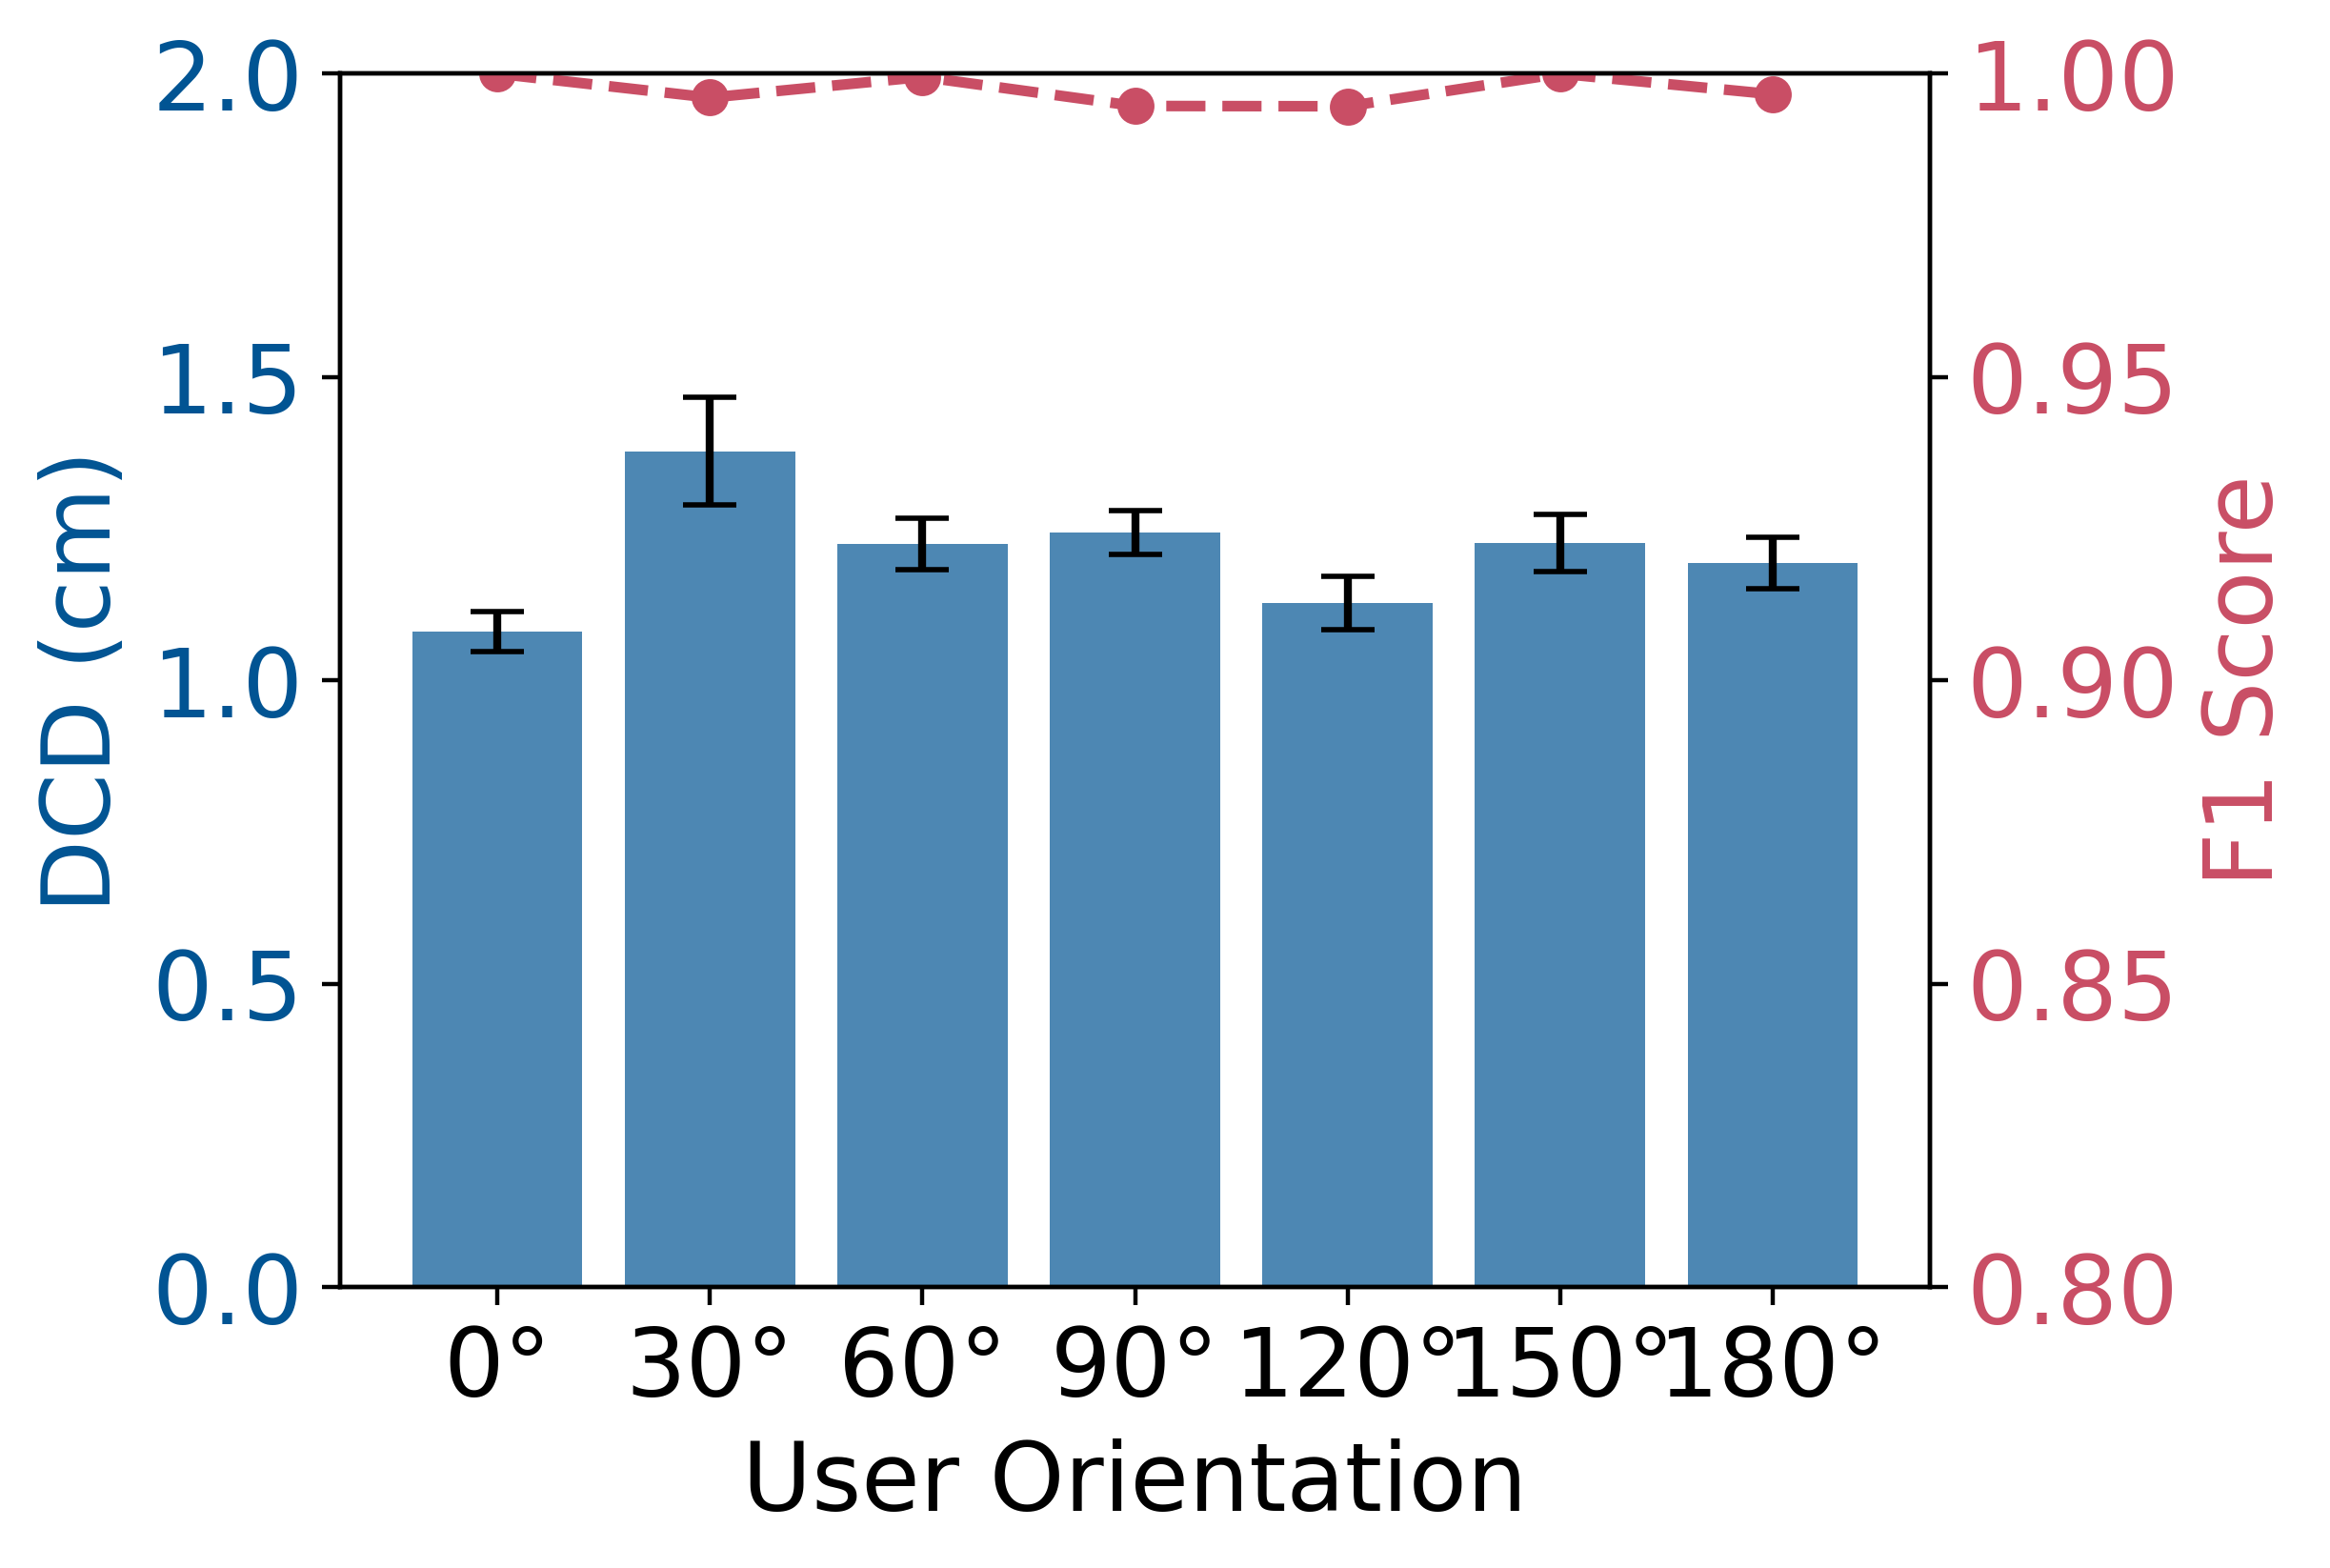

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


user_orientation_0_deg_file_list = [
  'U1_E11_1_standing_1o3_UO0_2.pkl',
 ]
user_orientation_30_deg_file_list = [
  'U0_E3_1_walking_1o0_UO30_2.pkl',
  'U1_E11_1_standing_1o3_UO30_2.pkl',
 ]
user_orientation_60_deg_file_list = [
  'U0_E3_1_walking_1o0_UO60_2.pkl',
  'U1_E11_1_standing_1o3_UO60_2.pkl',
 ]
user_orientation_90_deg_file_list = [
  'U0_E3_1_walking_1o0_UO90_2.pkl',
  'U1_E11_1_standing_1o3_UO90_2.pkl',
 ]
user_orientation_120_deg_file_list = [

  'U0_E3_1_walking_1o0_UO120_2.pkl',
  'U1_E11_1_standing_1o3_UO120_2.pkl',
 ]
user_orientation_150_deg_file_list = [
  'U0_E3_1_walking_1o0_UO150_2.pkl',
  'U1_E11_1_standing_1o3_UO150_2.pkl',
 ]
user_orientation_180_deg_file_list = [
  'U0_E3_1_walking_1o0_UO180_2.pkl',
  'U1_E11_1_standing_1o3_UO180_2.pkl',
 ]


# Select recordings from multiple users in similar environments (E0 and E1) for cross-user analysis.
selected_recordings = user_orientation_0_deg_file_list + user_orientation_30_deg_file_list + user_orientation_60_deg_file_list + user_orientation_90_deg_file_list + user_orientation_120_deg_file_list + user_orientation_150_deg_file_list + user_orientation_180_deg_file_list

    
for ele in selected_recordings:
    if ele not in file_names:
        print('not found', ele)
        

orientation_dict = {
    '0°': load_metrics_df_0(model3_Log_folder_path, user_orientation_0_deg_file_list),
    '30°': load_metrics_df_0(model3_Log_folder_path, user_orientation_30_deg_file_list),
    '60°': load_metrics_df_0(model3_Log_folder_path, user_orientation_60_deg_file_list),
    '90°': load_metrics_df_0(model3_Log_folder_path, user_orientation_90_deg_file_list),
    '120°': load_metrics_df_0(model3_Log_folder_path, user_orientation_120_deg_file_list),
    '150°': load_metrics_df_0(model3_Log_folder_path, user_orientation_150_deg_file_list),
    '180°': load_metrics_df_0(model3_Log_folder_path, user_orientation_180_deg_file_list)
}

direct_chamfer_distance_list = []
direct_chamfer_distance_sem_list = []
f1_score_list = []

for key, value in orientation_dict.items():
  metrics = value.groupby('file_name').apply(
      lambda x: pd.Series({
          'file_name': x['file_name'].iloc[0],
          'true_positives': x['true_positives'].sum(),
          'false_positives': x['false_positives'].sum(),
          'false_negatives': x['false_negatives'].sum(),
          'chamfer_distance': x['chamfer_distance'].mean(),
          'One_directional_Chamfer_Distance': (np.sqrt(x['chamfer_distance'] / 2) / 10).mean(),
          'One_directional_Chamfer_Distance_sem': (np.sqrt(x['chamfer_distance'] / 2) / 10).std() / np.sqrt(len(x)) if len(x) > 0 else 0,
      })
  ).reset_index(drop=True)
  metrics['f1_score'] = 2 * metrics['true_positives'] / (2 * metrics['true_positives'] + metrics['false_positives'] + metrics['false_negatives'])
  direct_chamfer_distance_list.append(metrics['One_directional_Chamfer_Distance'].mean())
  direct_chamfer_distance_sem_list.append(metrics['One_directional_Chamfer_Distance_sem'].mean())
  f1_score_list.append(metrics['f1_score'].mean())
  print(key)
  print('One_directional_Chamfer_Distance', metrics['One_directional_Chamfer_Distance'].mean())
  print('One_directional_Chamfer_Distance_sem', metrics['One_directional_Chamfer_Distance_sem'].mean())
  print('f1_score', metrics['f1_score'].mean())
  print('--------------------------------')


x_labels = [key for key in orientation_dict.keys()]
x = np.arange(len(x_labels))


from matplotlib.lines import Line2D


# Optional error bars if present
cd_err = direct_chamfer_distance_sem_list
f1_err = f1_score_list

plt.rcParams.update({'font.size': 18})
fig, ax1 = plt.subplots(figsize=(6, 4), dpi=400, layout='constrained')

# --- Bars: Directed Chamfer Distance (left y-axis) ---
bars = ax1.bar(
    x,
    direct_chamfer_distance_list,
    yerr=cd_err,
    capsize=5 if cd_err is not None else 0,
    color='#015493',
    alpha=0.7,
    label='DCD'
)
ax1.set_ylabel('DCD (cm)', color='#015493')
ax1.tick_params(axis='y', labelcolor='#015493')
ax1.set_ylim(0, 2)

# --- Line: F1 Score (right y-axis) ---
ax2 = ax1.twinx()
ax2.plot(
    x,
    f1_score_list,
    marker='o',
    linestyle='--',
    linewidth=2,
    color='#C94E65',
    label='F1 Score'
)

ax2.set_ylabel('F1 Score', color='#C94E65')
ax2.tick_params(axis='y', labelcolor='#C94E65')
ax2.set_ylim(0.8, 1.0)

# --- X ticks & label coloring ---
ax1.set_xlabel('User Orientation')
ax1.set_xticks(x)
ax1.set_xticklabels(x_labels, rotation=0, ha='center')


print('direct_chamfer_distance_list: ', direct_chamfer_distance_list)
print('f1_score_list: ', f1_score_list)
print('x_labels: ', x_labels)

fig_name = 'Figures/user_orientation_metrics'
plt.savefig(fig_name + ".png", dpi=200, bbox_inches='tight')
plt.savefig(fig_name + ".pdf", bbox_inches='tight')

plt.show()


### Walking Speed

/tmp/ipykernel_1352470/571704858.py:47: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  metrics = value.groupby('file_name').apply(
/tmp/ipykernel_1352470/571704858.py:47: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  metrics = value.groupby('file_name').apply(
/tmp/ipykernel_1352470/571704858.py:47: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future ver

0
One_directional_Chamfer_Distance 1.7797187664594107
One_directional_Chamfer_Distance_sem 0.07664455501447236
f1_score 0.9985163175687586
--------------------------------
1
One_directional_Chamfer_Distance 1.3949871498386923
One_directional_Chamfer_Distance_sem 0.06143870736216894
f1_score 1.0
--------------------------------
2
One_directional_Chamfer_Distance 1.4750145516032658
One_directional_Chamfer_Distance_sem 0.061273571518095565
f1_score 0.9995024875621891
--------------------------------
3
One_directional_Chamfer_Distance 1.7421393685171318
One_directional_Chamfer_Distance_sem 0.055840814079581996
f1_score 0.9995073891625617
--------------------------------
direct_chamfer_distance_list:  [np.float64(1.7797187664594107), np.float64(1.3949871498386923), np.float64(1.4750145516032658), np.float64(1.7421393685171318)]
f1_score_list:  [np.float64(0.9985163175687586), np.float64(1.0), np.float64(0.9995024875621891), np.float64(0.9995073891625617)]
x_labels:  ['0', '1', '2', '3']


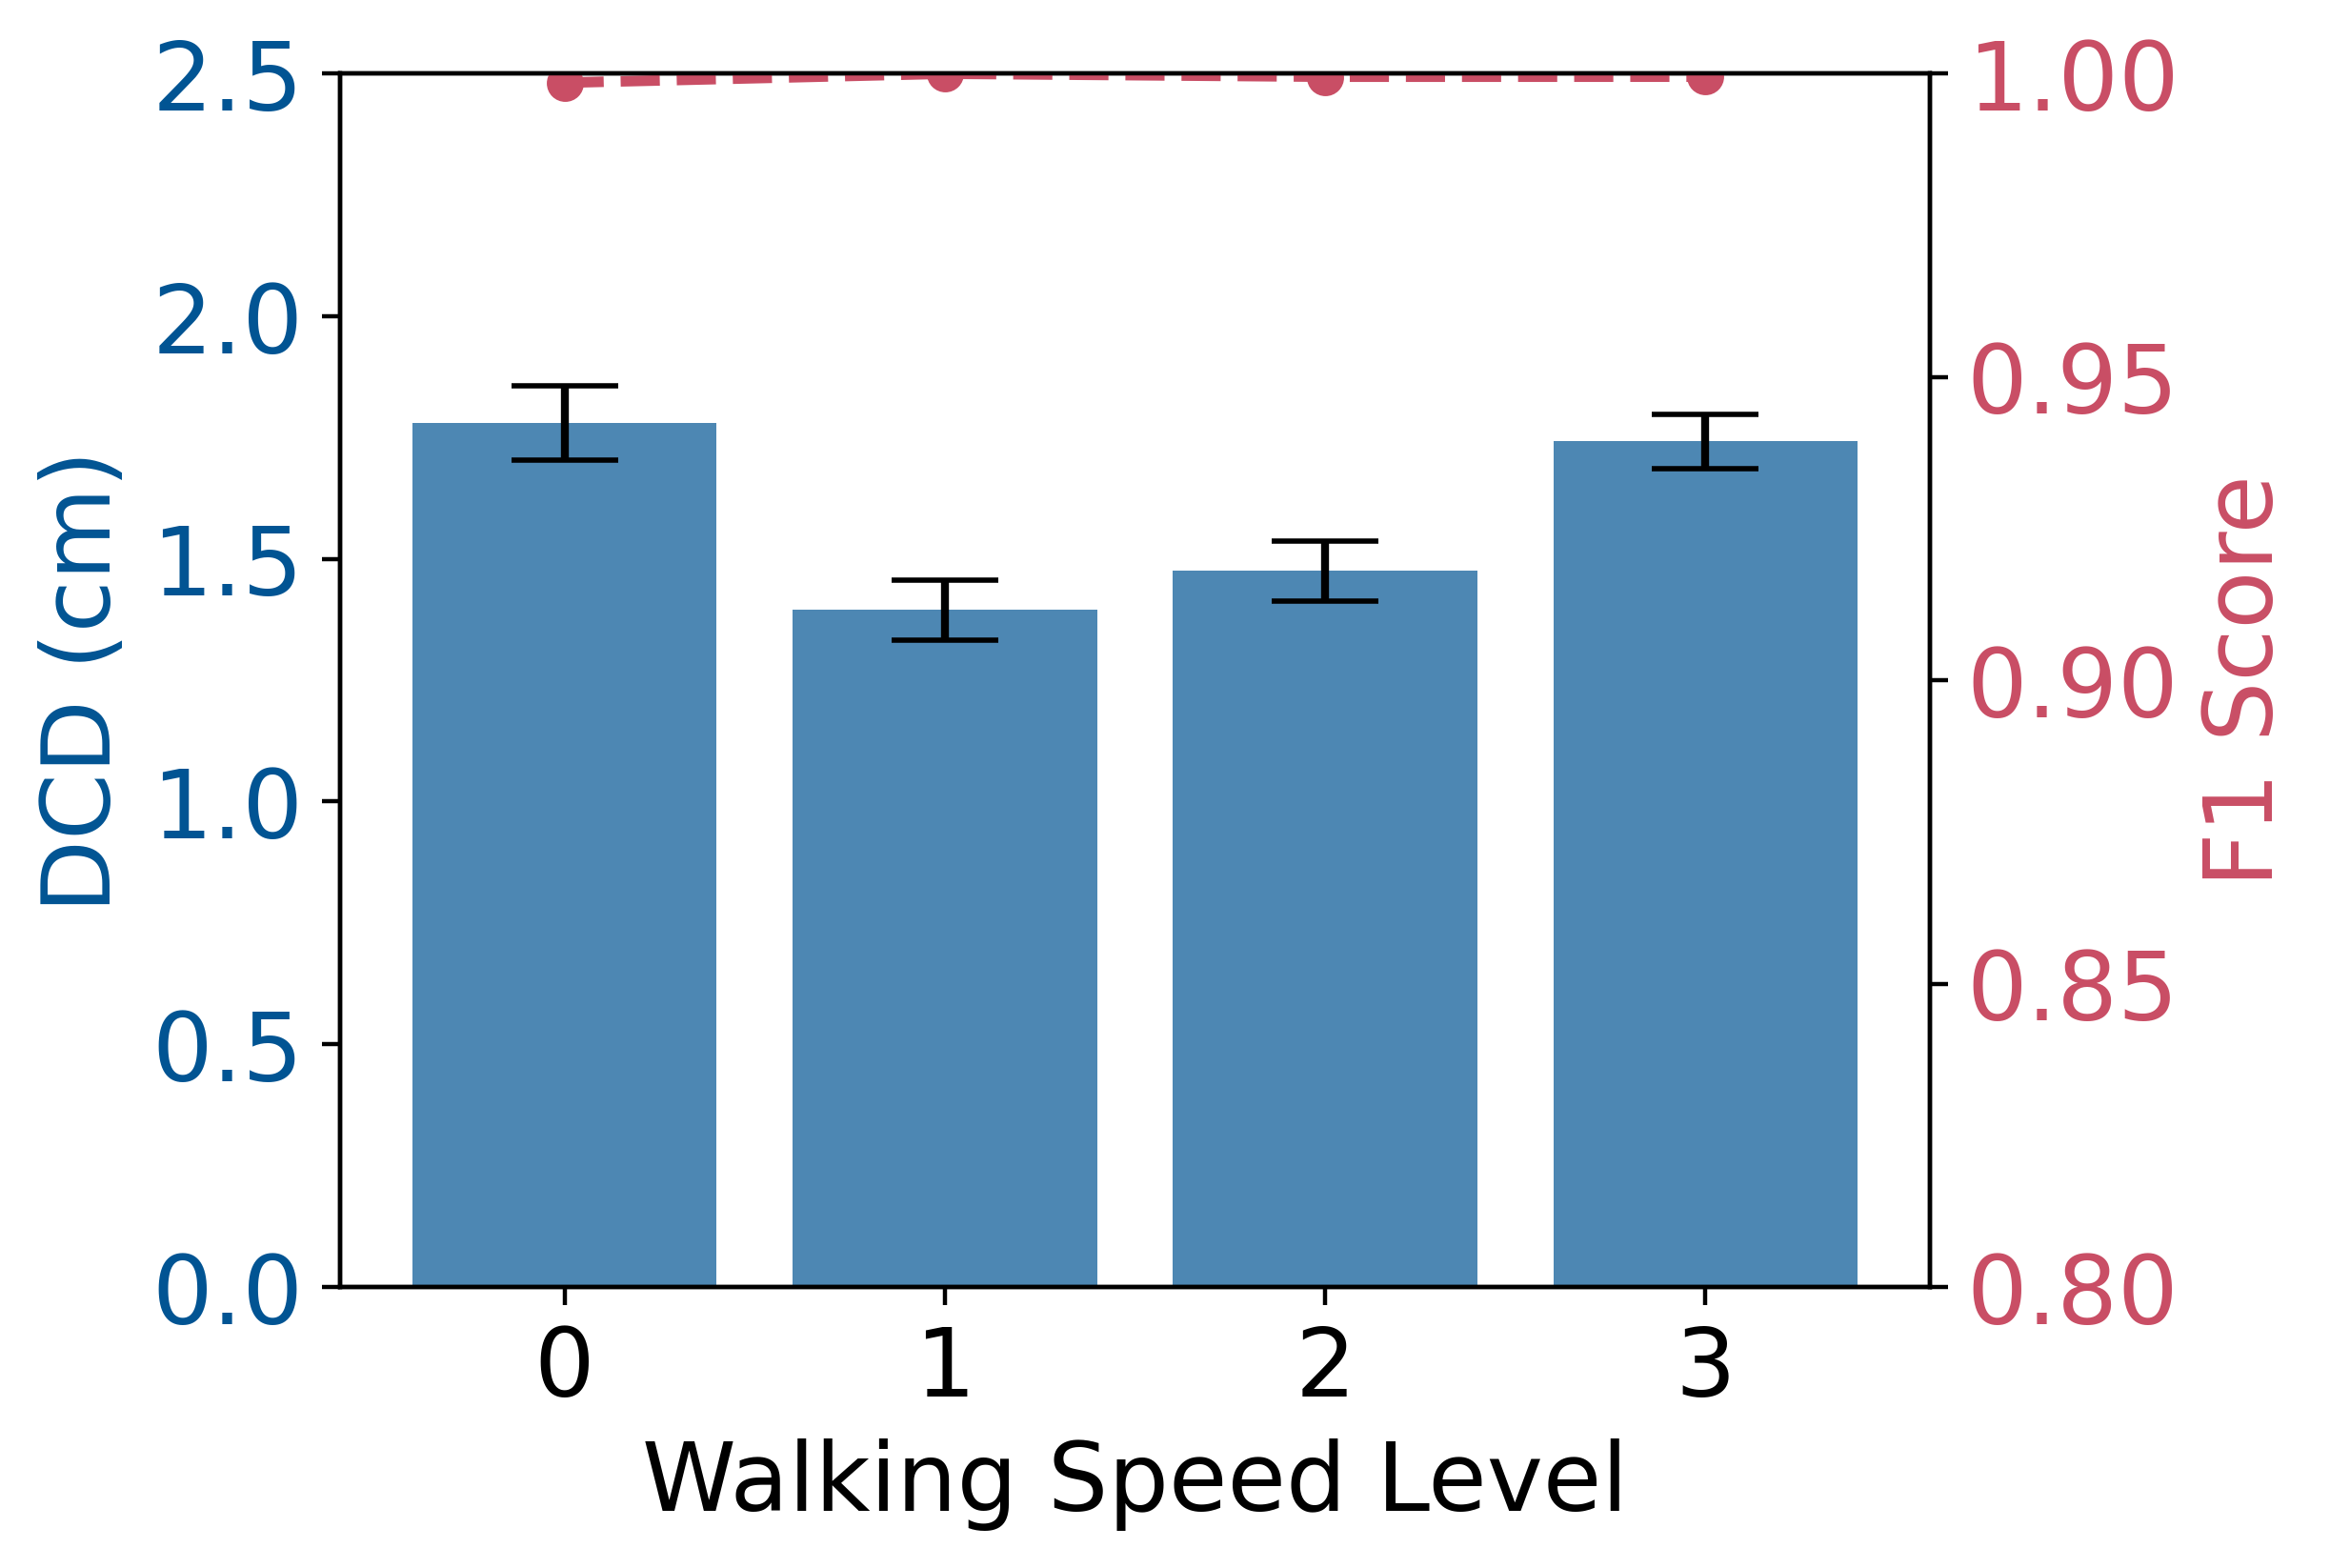

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


walking_speed_0_file_list = [
  'U0_E3_1_walking_1o0_WS-0_1.pkl',
  'U0_E3_1_walking_1o0_WS-0_2.pkl',
]

walking_speed_1_file_list = [
  'U0_E3_1_walking_1o0_WS-1_1.pkl',
  'U0_E3_1_walking_1o0_WS-1_2.pkl',
]

walking_speed_2_file_list = [
  'U0_E3_1_walking_1o0_WS-2_1.pkl',
  'U0_E3_1_walking_1o0_WS-2_2.pkl',
]

walking_speed_3_file_list = [
  'U0_E3_1_walking_1o0_WS-3_1.pkl',
  'U0_E3_1_walking_1o0_WS-3_2.pkl',
]

# Select recordings from multiple users in similar environments (E0 and E1) for cross-user analysis.
selected_recordings = walking_speed_0_file_list + walking_speed_1_file_list + walking_speed_2_file_list + walking_speed_3_file_list

    
for ele in selected_recordings:
    if ele not in file_names:
        print('not found', ele)
        

walking_speed_dict = {
    '0': load_metrics_df_0(model3_Log_folder_path, walking_speed_0_file_list),
    '1': load_metrics_df_0(model3_Log_folder_path, walking_speed_1_file_list),
    '2': load_metrics_df_0(model3_Log_folder_path, walking_speed_2_file_list),
    '3': load_metrics_df_0(model3_Log_folder_path, walking_speed_3_file_list)
}

direct_chamfer_distance_list = []
direct_chamfer_distance_sem_list = []
f1_score_list = []

for key, value in walking_speed_dict.items():
  metrics = value.groupby('file_name').apply(
      lambda x: pd.Series({
          'file_name': x['file_name'].iloc[0],
          'true_positives': x['true_positives'].sum(),
          'false_positives': x['false_positives'].sum(),
          'false_negatives': x['false_negatives'].sum(),
          'chamfer_distance': x['chamfer_distance'].mean(),
          'One_directional_Chamfer_Distance': (np.sqrt(x['chamfer_distance'] / 2) / 10).mean(),
          'One_directional_Chamfer_Distance_sem': (np.sqrt(x['chamfer_distance'] / 2) / 10).std() / np.sqrt(len(x)) if len(x) > 0 else 0,
      })
  ).reset_index(drop=True)
  metrics['f1_score'] = 2 * metrics['true_positives'] / (2 * metrics['true_positives'] + metrics['false_positives'] + metrics['false_negatives'])
  direct_chamfer_distance_list.append(metrics['One_directional_Chamfer_Distance'].mean())
  direct_chamfer_distance_sem_list.append(metrics['One_directional_Chamfer_Distance_sem'].mean())
  f1_score_list.append(metrics['f1_score'].mean())
  print(key)
  print('One_directional_Chamfer_Distance', metrics['One_directional_Chamfer_Distance'].mean())
  print('One_directional_Chamfer_Distance_sem', metrics['One_directional_Chamfer_Distance_sem'].mean())
  print('f1_score', metrics['f1_score'].mean())
  print('--------------------------------')


x_labels = [key for key in walking_speed_dict.keys()]
x = np.arange(len(x_labels))


from matplotlib.lines import Line2D


# Optional error bars if present
cd_err = direct_chamfer_distance_sem_list
f1_err = f1_score_list

plt.rcParams.update({'font.size': 18})
fig, ax1 = plt.subplots(figsize=(6, 4), dpi=400, layout='constrained')

# --- Bars: Directed Chamfer Distance (left y-axis) ---
bars = ax1.bar(
    x,
    direct_chamfer_distance_list,
    yerr=cd_err,
    capsize=10 if cd_err is not None else 0,
    color='#015493',
    alpha=0.7,
    label='DCD'
)
ax1.set_ylabel('DCD (cm)', color='#015493')
ax1.tick_params(axis='y', labelcolor='#015493')
ax1.set_ylim(0, 2.5)

# --- Line: F1 Score (right y-axis) ---
ax2 = ax1.twinx()
ax2.plot(
    x,
    f1_score_list,
    marker='o',
    linestyle='--',
    linewidth=2,
    color='#C94E65',
    label='F1 Score'
)

ax2.set_ylabel('F1 Score', color='#C94E65')
ax2.tick_params(axis='y', labelcolor='#C94E65')
ax2.set_ylim(0.8, 1.0)

# --- X ticks & label coloring ---
ax1.set_xlabel('Walking Speed Level')
ax1.set_xticks(x)
ax1.set_xticklabels(x_labels, rotation=0, ha='center')

print('direct_chamfer_distance_list: ', direct_chamfer_distance_list)
print('f1_score_list: ', f1_score_list)
print('x_labels: ', x_labels)

fig_name = 'Figures/walking_speed_metrics'
plt.savefig(fig_name + ".png", dpi=200, bbox_inches='tight')
plt.savefig(fig_name + ".pdf", bbox_inches='tight')

plt.show()
# plt.close()



### Occulusion

/tmp/ipykernel_1352470/1179148358.py:51: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  metrics = value.groupby('file_name').apply(
/tmp/ipykernel_1352470/1179148358.py:51: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  metrics = value.groupby('file_name').apply(
/tmp/ipykernel_1352470/1179148358.py:51: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future 

0
One_directional_Chamfer_Distance 1.407261748110299
One_directional_Chamfer_Distance_sem 0.044453218328304595
f1_score 1.0
--------------------------------
20
One_directional_Chamfer_Distance 1.1136553967690448
One_directional_Chamfer_Distance_sem 0.05222642785543369
f1_score 0.9995121951219512
--------------------------------
40
One_directional_Chamfer_Distance 1.540396158719445
One_directional_Chamfer_Distance_sem 0.14408705580851944
f1_score 0.9985308521057786
--------------------------------
60
One_directional_Chamfer_Distance 1.2927528908959798
One_directional_Chamfer_Distance_sem 0.07340107869841275
f1_score 1.0
--------------------------------
80
One_directional_Chamfer_Distance 2.232228311769957
One_directional_Chamfer_Distance_sem 0.12130093969902866
f1_score 0.9889678956306187
--------------------------------
direct_chamfer_distance_list:  [np.float64(1.407261748110299), np.float64(1.1136553967690448), np.float64(1.540396158719445), np.float64(1.2927528908959798), np.float64

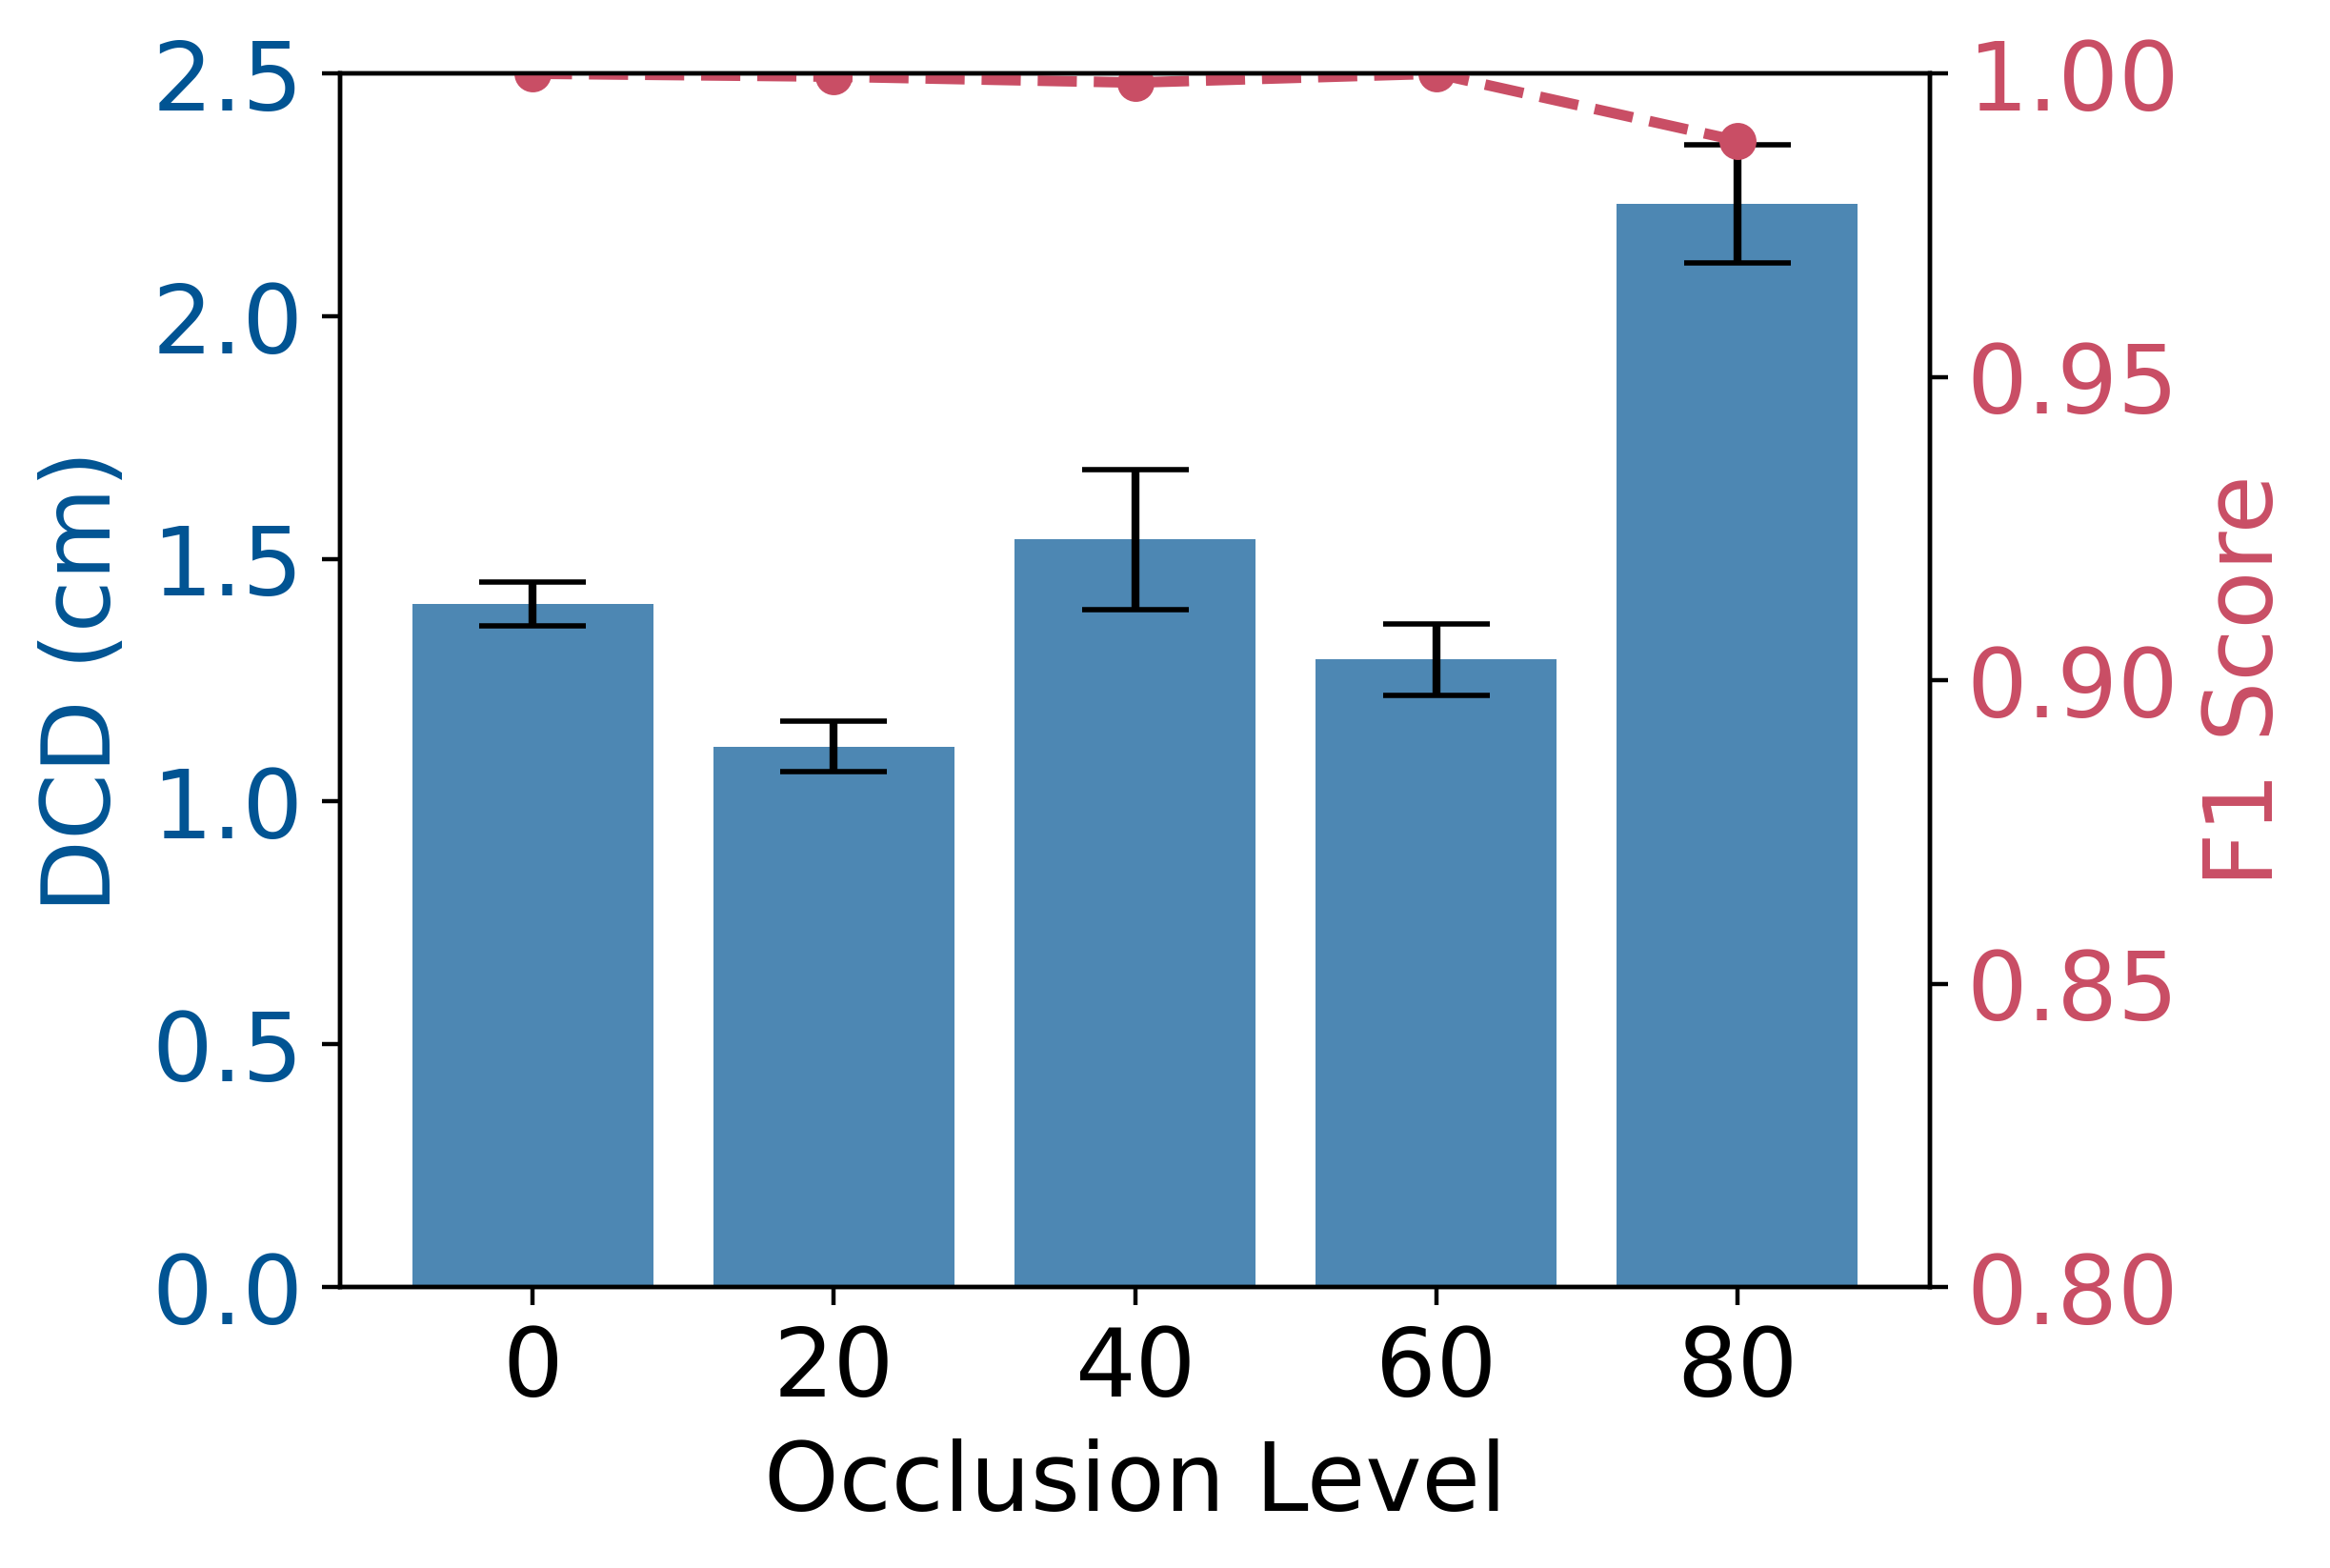

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


occlusion_0_file_list = [   
'U0_E11_1_walking_1o3_OLBP-0_2.pkl',
]
occlusion_20_file_list = [
'U0_E11_1_walking_1o3_OLBP-20_2.pkl',
'U0_E11_1_walking_1o3_OLBP-20_3.pkl',
]

occlusion_40_file_list = [
'U0_E11_1_walking_1o3_OLBP-40_2.pkl',
'U0_E11_1_walking_1o3_OLBP-40_3.pkl',
]

occlusion_60_file_list = [
'U0_E11_1_walking_1o3_OLBP-60_3.pkl',
'U0_E11_1_walking_1o3_OLBP-60_4.pkl',
]

occlusion_80_file_list = [
'U0_E11_1_walking_1o3_OLBP-80_3.pkl',
'U0_E11_1_walking_1o3_OLBP-80_4.pkl',
]

# Select recordings from multiple users in similar environments (E0 and E1) for cross-user analysis.
selected_recordings = occlusion_0_file_list + occlusion_20_file_list + occlusion_40_file_list + occlusion_60_file_list + occlusion_80_file_list

    
for ele in selected_recordings:
    if ele not in file_names:
        print('not found', ele)
        

occlusion_dict = {
    '0': load_metrics_df_0(model3_Log_folder_path, occlusion_0_file_list),
    '20': load_metrics_df_0(model3_Log_folder_path, occlusion_20_file_list),
    '40': load_metrics_df_0(model3_Log_folder_path, occlusion_40_file_list),
    '60': load_metrics_df_0(model3_Log_folder_path, occlusion_60_file_list),
    '80': load_metrics_df_0(model3_Log_folder_path, occlusion_80_file_list)
}

direct_chamfer_distance_list = []
direct_chamfer_distance_sem_list = []
f1_score_list = []

for key, value in occlusion_dict.items():
  metrics = value.groupby('file_name').apply(
      lambda x: pd.Series({
          'file_name': x['file_name'].iloc[0],
          'true_positives': x['true_positives'].sum(),
          'false_positives': x['false_positives'].sum(),
          'false_negatives': x['false_negatives'].sum(),
          'chamfer_distance': x['chamfer_distance'].mean(),
          'One_directional_Chamfer_Distance': (np.sqrt(x['chamfer_distance'] / 2) / 10).mean(),
          'One_directional_Chamfer_Distance_sem': (np.sqrt(x['chamfer_distance'] / 2) / 10).std() / np.sqrt(len(x)) if len(x) > 0 else 0,
      })
  ).reset_index(drop=True)
  metrics['f1_score'] = 2 * metrics['true_positives'] / (2 * metrics['true_positives'] + metrics['false_positives'] + metrics['false_negatives'])
  direct_chamfer_distance_list.append(metrics['One_directional_Chamfer_Distance'].mean())
  direct_chamfer_distance_sem_list.append(metrics['One_directional_Chamfer_Distance_sem'].mean())
  f1_score_list.append(metrics['f1_score'].mean())
  print(key)
  print('One_directional_Chamfer_Distance', metrics['One_directional_Chamfer_Distance'].mean())
  print('One_directional_Chamfer_Distance_sem', metrics['One_directional_Chamfer_Distance_sem'].mean())
  print('f1_score', metrics['f1_score'].mean())
  print('--------------------------------')


x_labels = [key for key in occlusion_dict.keys()]
x = np.arange(len(x_labels))


from matplotlib.lines import Line2D


# Optional error bars if present
cd_err = direct_chamfer_distance_sem_list
f1_err = f1_score_list

plt.rcParams.update({'font.size': 18})
fig, ax1 = plt.subplots(figsize=(6, 4), dpi=400, layout='constrained')

# --- Bars: Directed Chamfer Distance (left y-axis) ---
bars = ax1.bar(
    x,
    direct_chamfer_distance_list,
    yerr=cd_err,
    capsize=10 if cd_err is not None else 0,
    color='#015493',
    alpha=0.7,
    label='DCD'
)
ax1.set_ylabel('DCD (cm)', color='#015493')
ax1.tick_params(axis='y', labelcolor='#015493')
ax1.set_ylim(0, 2.5)

# --- Line: F1 Score (right y-axis) ---
ax2 = ax1.twinx()
ax2.plot(
    x,
    f1_score_list,
    marker='o',
    linestyle='--',
    linewidth=2,
    color='#C94E65',
    label='F1 Score'
)

ax2.set_ylabel('F1 Score', color='#C94E65')
ax2.tick_params(axis='y', labelcolor='#C94E65')
ax2.set_ylim(0.8, 1.0)

# --- X ticks & label coloring ---
ax1.set_xlabel('Occlusion Level')
ax1.set_xticks(x)
ax1.set_xticklabels(x_labels, rotation=0, ha='center')

print('direct_chamfer_distance_list: ', direct_chamfer_distance_list)
print('f1_score_list: ', f1_score_list)
print('x_labels: ', x_labels)

fig_name = 'Figures/occlusion_metrics'
plt.savefig(fig_name + ".png", dpi=200, bbox_inches='tight')
plt.savefig(fig_name + ".pdf", bbox_inches='tight')

plt.show()
# plt.close()

